In [1]:
import pandas as pd
import numpy as np

In [2]:
call = pd.read_csv('5.112신고.csv')

In [3]:
## NA 결측치는 모든 시에서 2% 미만이므로 삭제함
call = call.dropna()

In [4]:
## 결측치 처리에 참고가 될만한 변수는 성별밖에 없으므로, 내용확인불가 중 성별까지 불상인 데이터는 삭제한다.
miss = call[(call.report_sx == '불상') & (call.inc_info == '내용확인불가')].index
call = call.drop(miss)

In [5]:
## date 데이터 타입 변경
call['date'] = call['date'].astype(str)

In [6]:
## 연도 슬라이싱
for i in range(len(call['date'].values)):
    call['date'].values[i] = call['date'].values[i][0:4]

call['date'] = call['date'].astype(int)

In [7]:
## 서울
call_songpa = call[call['jur_stn'].str.contains('서울송파', na=False)]
call_gangseo = call[call['jur_stn'].str.contains('서울강서', na=False)]
call_yungdeongpo = call[call['jur_stn'].str.contains('서울영등포', na=False)]
call_gwanak = call[call['jur_stn'].str.contains('서울관악', na=False)]
call_mapo = call[call['jur_stn'].str.contains('서울마포', na=False)]
call_gangnam = call[call['jur_stn'].str.contains('서울강남', na=False)]
call_jungrang = call[call['jur_stn'].str.contains('서울중랑', na=False)]
call_nowon = call[call['jur_stn'].str.contains('서울노원', na=False)]
call_guro = call[call['jur_stn'].str.contains('서울구로', na=False)]
call_gangdong = call[call['jur_stn'].str.contains('서울강동', na=False)]
call_gwangjin = call[call['jur_stn'].str.contains('서울광진', na=False)]
call_dongdaemun = call[call['jur_stn'].str.contains('서울동대문', na=False)]
call_seocho = call[call['jur_stn'].str.contains('서울서초', na=False)]
call_gangbuk = call[call['jur_stn'].str.contains('서울강북', na=False)]
call_yangchun = call[call['jur_stn'].str.contains('서울양천', na=False)]
call_yongsan = call[call['jur_stn'].str.contains('서울용산', na=False)]
call_suseo = call[call['jur_stn'].str.contains('서울수서', na=False)]
call_dongjak = call[call['jur_stn'].str.contains('서울동작', na=False)]
call_seodaemun = call[call['jur_stn'].str.contains('서울서대문', na=False)]
call_geumchun = call[call['jur_stn'].str.contains('서울금천', na=False)]
call_sungdong = call[call['jur_stn'].str.contains('서울성동', na=False)]
call_eunpyeong = call[call['jur_stn'].str.contains('서울은평', na=False)]
call_dobong = call[call['jur_stn'].str.contains('서울도봉', na=False)]
call_jungbu = call[call['jur_stn'].str.contains('서울중부', na=False)]
call_sungbuk = call[call['jur_stn'].str.contains('서울성북', na=False)]
call_jongro = call[call['jur_stn'].str.contains('서울종로', na=False)]
call_seobu = call[call['jur_stn'].str.contains('서울서부', na=False)]
call_hyehwa = call[call['jur_stn'].str.contains('서울혜화', na=False)]
call_jongam = call[call['jur_stn'].str.contains('서울종암', na=False)]
call_namdaemun = call[call['jur_stn'].str.contains('서울남대문', na=False)]
call_bangbae = call[call['jur_stn'].str.contains('서울방배', na=False)]

## 수원
call_suwon_jungbu = call[call['jur_stn'].str.contains('수원중부', na=False)]
call_suwon_seobu = call[call['jur_stn'].str.contains('수원서부', na=False)]
call_suwon_nambu = call[call['jur_stn'].str.contains('수원남부', na=False)]

## 창원
call_changwon_jungbu = call[call['jur_stn'].str.contains('창원중부', na=False)]
call_changwon_seobu = call[call['jur_stn'].str.contains('창원서부', na=False)]

## 마산
call_masan_dongbu = call[call['jur_stn'].str.contains('마산동부', na=False)]
call_masan_jungbu = call[call['jur_stn'].str.contains('마산중부', na=False)]

## 진해
call_jinhae = call[call['jur_stn'].str.contains('진해', na=False)]

## 진주
call_jinju = call[call['jur_stn'].str.contains('진주', na=False)]

## 세종
call_sejong = call[call['jur_stn'].str.contains('세종', na=False)]

In [8]:
## 서울시 결측치 처리
songpa_18_na = call_songpa[(call_songpa.inc_info=='내용확인불가')&(call_songpa.date==2018)]
call_songpa_18 = call_songpa[call_songpa.date==2018].drop(songpa_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_songpa_18_prob = call_songpa_18.value_counts('inc_info') / sum(call_songpa_18.value_counts('inc_info').values)
multi_songpa_18 = np.random.multinomial(len(songpa_18_na), pvals=call_songpa_18_prob.values, size=30)
songpa_18_replace=[]
for i in range(len(call_songpa_18.value_counts('inc_info').index)):
    a = np.mean(multi_songpa_18[:,i])
    songpa_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
songpa_18_replace = pd.Series(songpa_18_replace, index=call_songpa_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_songpa_18_q1 = call_songpa_18[(call_songpa_18.inc_info=='폭력')|
                                   (call_songpa_18.inc_info=='절도')|
                                   (call_songpa_18.inc_info=='가정폭력')|
                                   (call_songpa_18.inc_info=='데이트폭력')|
                                   (call_songpa_18.inc_info=='성폭력')|
                                   (call_songpa_18.inc_info=='사기')|
                                   (call_songpa_18.inc_info=='학교폭력')]

songpa_18_replace_q1 = (songpa_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_songpa_18_q2 = call_songpa_18[(call_songpa_18.inc_info=='변사자')|
                                   (call_songpa_18.inc_info=='협박')|
                                   (call_songpa_18.inc_info=='강도')]

songpa_18_replace_q2 = (songpa_18_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_songpa_18_q3 = call_songpa_18[(call_songpa_18.inc_info=='교통사고')|
                                   (call_songpa_18.inc_info=='교통위반')|
                                   (call_songpa_18.inc_info=='인피도주')]

songpa_18_replace_q3 = (songpa_18_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_songpa_18_q4 = call_songpa_18[(call_songpa_18.inc_info=='시비')|
                                   (call_songpa_18.inc_info=='소음')|
                                   (call_songpa_18.inc_info=='교통불편')|
                                   (call_songpa_18.inc_info=='교통위반')|
                                   (call_songpa_18.inc_info=='행패소란')|
                                   (call_songpa_18.inc_info=='분실습득')]

songpa_18_replace_q4 = (songpa_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_songpa_18_q5 = pd.concat([call_songpa_18_q1,call_songpa_18_q2,call_songpa_18_q3,call_songpa_18_q4])
call_songpa_18_q5 = call_songpa_18.drop(call_songpa_18_q5.index)

songpa_18_replace_q5 = sum(songpa_18_replace) -\
sum(pd.concat([songpa_18_replace_q1,songpa_18_replace_q2,songpa_18_replace_q3,songpa_18_replace_q4]))

songpa_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울송파경찰서','q1 신고':(len(call_songpa_18_q1)+sum(songpa_18_replace_q1))},
                            index=[0])
songpa_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울송파경찰서','q2 신고':(len(call_songpa_18_q2)+sum(songpa_18_replace_q2))},
                            index=[0])
songpa_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울송파경찰서','q3 신고':(len(call_songpa_18_q3)+sum(songpa_18_replace_q3))},
                            index=[0])
songpa_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울송파경찰서','q4 신고':(len(call_songpa_18_q4)+sum(songpa_18_replace_q4))},
                            index=[0])
songpa_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울송파경찰서','q5 신고':(len(call_songpa_18_q5)+songpa_18_replace_q5)},
                            index=[0])

songpa_19_na = call_songpa[(call_songpa.inc_info=='내용확인불가')&(call_songpa.date==2019)]
call_songpa_19 = call_songpa[call_songpa.date==2019].drop(songpa_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_songpa_19_prob = call_songpa_19.value_counts('inc_info') / sum(call_songpa_19.value_counts('inc_info').values)
multi_songpa_19 = np.random.multinomial(len(songpa_19_na), pvals=call_songpa_19_prob.values, size=30)
songpa_19_replace=[]
for i in range(len(call_songpa_19.value_counts('inc_info').index)):
    a = np.mean(multi_songpa_19[:,i])
    songpa_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
songpa_19_replace = pd.Series(songpa_19_replace, index=call_songpa_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_songpa_19_q1 = call_songpa_19[(call_songpa_19.inc_info=='폭력')|
                                   (call_songpa_19.inc_info=='절도')|
                                   (call_songpa_19.inc_info=='가정폭력')|
                                   (call_songpa_19.inc_info=='데이트폭력')|
                                   (call_songpa_19.inc_info=='성폭력')|
                                   (call_songpa_19.inc_info=='사기')|
                                   (call_songpa_19.inc_info=='학교폭력')]

songpa_19_replace_q1 = (songpa_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_songpa_19_q2 = call_songpa_19[(call_songpa_19.inc_info=='변사자')|
                                   (call_songpa_19.inc_info=='협박')|
                                   (call_songpa_19.inc_info=='강도')]

songpa_19_replace_q2 = (songpa_19_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_songpa_19_q3 = call_songpa_19[(call_songpa_19.inc_info=='교통사고')|
                                   (call_songpa_19.inc_info=='교통위반')|
                                   (call_songpa_19.inc_info=='인피도주')]

songpa_19_replace_q3 = (songpa_19_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_songpa_19_q4 = call_songpa_19[(call_songpa_19.inc_info=='시비')|
                                   (call_songpa_19.inc_info=='소음')|
                                   (call_songpa_19.inc_info=='교통불편')|
                                   (call_songpa_19.inc_info=='교통위반')|
                                   (call_songpa_19.inc_info=='행패소란')|
                                   (call_songpa_19.inc_info=='분실습득')]

songpa_19_replace_q4 = (songpa_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_songpa_19_q5 = pd.concat([call_songpa_19_q1,call_songpa_19_q2,call_songpa_19_q3,call_songpa_19_q4])
call_songpa_19_q5 = call_songpa_19.drop(call_songpa_19_q5.index)

songpa_19_replace_q5 = sum(songpa_19_replace) -\
sum(pd.concat([songpa_19_replace_q1,songpa_19_replace_q2,songpa_19_replace_q3,songpa_19_replace_q4]))

songpa_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울송파경찰서','q1 신고':(len(call_songpa_19_q1)+sum(songpa_19_replace_q1))},
                            index=[0])
songpa_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울송파경찰서','q2 신고':(len(call_songpa_19_q2)+sum(songpa_19_replace_q2))},
                            index=[0])
songpa_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울송파경찰서','q3 신고':(len(call_songpa_19_q3)+sum(songpa_19_replace_q3))},
                            index=[0])
songpa_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울송파경찰서','q4 신고':(len(call_songpa_19_q4)+sum(songpa_19_replace_q4))},
                            index=[0])
songpa_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울송파경찰서','q5 신고':(len(call_songpa_19_q5)+songpa_19_replace_q5)},
                            index=[0])

songpa_q1 = pd.concat([songpa_18_q1, songpa_19_q1])
songpa_q2 = pd.concat([songpa_18_q2, songpa_19_q2])
songpa_q3 = pd.concat([songpa_18_q3, songpa_19_q3])
songpa_q4 = pd.concat([songpa_18_q4, songpa_19_q4])
songpa_q5 = pd.concat([songpa_18_q5, songpa_19_q5])

In [9]:
## 서울시 결측치 처리
gangseo_18_na = call_gangseo[(call_gangseo.inc_info=='내용확인불가')&(call_gangseo.date==2018)]
call_gangseo_18 = call_gangseo[call_gangseo.date==2018].drop(gangseo_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_gangseo_18_prob = call_gangseo_18.value_counts('inc_info') / sum(call_gangseo_18.value_counts('inc_info').values)
multi_gangseo_18 = np.random.multinomial(len(gangseo_18_na), pvals=call_gangseo_18_prob.values, size=30)
gangseo_18_replace=[]
for i in range(len(call_gangseo_18.value_counts('inc_info').index)):
    a = np.mean(multi_gangseo_18[:,i])
    gangseo_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
gangseo_18_replace = pd.Series(gangseo_18_replace, index=call_gangseo_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_gangseo_18_q1 = call_gangseo_18[(call_gangseo_18.inc_info=='폭력')|
                                   (call_gangseo_18.inc_info=='절도')|
                                   (call_gangseo_18.inc_info=='가정폭력')|
                                   (call_gangseo_18.inc_info=='데이트폭력')|
                                   (call_gangseo_18.inc_info=='성폭력')|
                                   (call_gangseo_18.inc_info=='사기')|
                                   (call_gangseo_18.inc_info=='학교폭력')]

gangseo_18_replace_q1 = (gangseo_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_gangseo_18_q2 = call_gangseo_18[(call_gangseo_18.inc_info=='변사자')|
                                   (call_gangseo_18.inc_info=='협박')|
                                   (call_gangseo_18.inc_info=='강도')]

gangseo_18_replace_q2 = (gangseo_18_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_gangseo_18_q3 = call_gangseo_18[(call_gangseo_18.inc_info=='교통사고')|
                                   (call_gangseo_18.inc_info=='교통위반')|
                                   (call_gangseo_18.inc_info=='인피도주')]

gangseo_18_replace_q3 = (gangseo_18_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_gangseo_18_q4 = call_gangseo_18[(call_gangseo_18.inc_info=='시비')|
                                   (call_gangseo_18.inc_info=='소음')|
                                   (call_gangseo_18.inc_info=='교통불편')|
                                   (call_gangseo_18.inc_info=='교통위반')|
                                   (call_gangseo_18.inc_info=='행패소란')|
                                   (call_gangseo_18.inc_info=='분실습득')]

gangseo_18_replace_q4 = (gangseo_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_gangseo_18_q5 = pd.concat([call_gangseo_18_q1,call_gangseo_18_q2,call_gangseo_18_q3,call_gangseo_18_q4])
call_gangseo_18_q5 = call_gangseo_18.drop(call_gangseo_18_q5.index)

gangseo_18_replace_q5 = sum(gangseo_18_replace) -\
sum(pd.concat([gangseo_18_replace_q1,gangseo_18_replace_q2,gangseo_18_replace_q3,gangseo_18_replace_q4]))

gangseo_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울강서경찰서','q1 신고':(len(call_gangseo_18_q1)+sum(gangseo_18_replace_q1))},
                            index=[0])
gangseo_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울강서경찰서','q2 신고':(len(call_gangseo_18_q2)+sum(gangseo_18_replace_q2))},
                            index=[0])
gangseo_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울강서경찰서','q3 신고':(len(call_gangseo_18_q3)+sum(gangseo_18_replace_q3))},
                            index=[0])
gangseo_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울강서경찰서','q4 신고':(len(call_gangseo_18_q4)+sum(gangseo_18_replace_q4))},
                            index=[0])
gangseo_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울강서경찰서','q5 신고':(len(call_gangseo_18_q5)+gangseo_18_replace_q5)},
                            index=[0])

gangseo_19_na = call_gangseo[(call_gangseo.inc_info=='내용확인불가')&(call_gangseo.date==2019)]
call_gangseo_19 = call_gangseo[call_gangseo.date==2019].drop(gangseo_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_gangseo_19_prob = call_gangseo_19.value_counts('inc_info') / sum(call_gangseo_19.value_counts('inc_info').values)
multi_gangseo_19 = np.random.multinomial(len(gangseo_19_na), pvals=call_gangseo_19_prob.values, size=30)
gangseo_19_replace=[]
for i in range(len(call_gangseo_19.value_counts('inc_info').index)):
    a = np.mean(multi_gangseo_19[:,i])
    gangseo_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
gangseo_19_replace = pd.Series(gangseo_19_replace, index=call_gangseo_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_gangseo_19_q1 = call_gangseo_19[(call_gangseo_19.inc_info=='폭력')|
                                   (call_gangseo_19.inc_info=='절도')|
                                   (call_gangseo_19.inc_info=='가정폭력')|
                                   (call_gangseo_19.inc_info=='데이트폭력')|
                                   (call_gangseo_19.inc_info=='성폭력')|
                                   (call_gangseo_19.inc_info=='사기')|
                                   (call_gangseo_19.inc_info=='학교폭력')]

gangseo_19_replace_q1 = (gangseo_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_gangseo_19_q2 = call_gangseo_19[(call_gangseo_19.inc_info=='변사자')|
                                   (call_gangseo_19.inc_info=='협박')|
                                   (call_gangseo_19.inc_info=='강도')]

gangseo_19_replace_q2 = (gangseo_19_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_gangseo_19_q3 = call_gangseo_19[(call_gangseo_19.inc_info=='교통사고')|
                                   (call_gangseo_19.inc_info=='교통위반')|
                                   (call_gangseo_19.inc_info=='인피도주')]

gangseo_19_replace_q3 = (gangseo_19_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_gangseo_19_q4 = call_gangseo_19[(call_gangseo_19.inc_info=='시비')|
                                   (call_gangseo_19.inc_info=='소음')|
                                   (call_gangseo_19.inc_info=='교통불편')|
                                   (call_gangseo_19.inc_info=='교통위반')|
                                   (call_gangseo_19.inc_info=='행패소란')|
                                   (call_gangseo_19.inc_info=='분실습득')]

gangseo_19_replace_q4 = (gangseo_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_gangseo_19_q5 = pd.concat([call_gangseo_19_q1,call_gangseo_19_q2,call_gangseo_19_q3,call_gangseo_19_q4])
call_gangseo_19_q5 = call_gangseo_19.drop(call_gangseo_19_q5.index)

gangseo_19_replace_q5 = sum(gangseo_19_replace) -\
sum(pd.concat([gangseo_19_replace_q1,gangseo_19_replace_q2,gangseo_19_replace_q3,gangseo_19_replace_q4]))

gangseo_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울강서경찰서','q1 신고':(len(call_gangseo_19_q1)+sum(gangseo_19_replace_q1))},
                            index=[0])
gangseo_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울강서경찰서','q2 신고':(len(call_gangseo_19_q2)+sum(gangseo_19_replace_q2))},
                            index=[0])
gangseo_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울강서경찰서','q3 신고':(len(call_gangseo_19_q3)+sum(gangseo_19_replace_q3))},
                            index=[0])
gangseo_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울강서경찰서','q4 신고':(len(call_gangseo_19_q4)+sum(gangseo_19_replace_q4))},
                            index=[0])
gangseo_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울강서경찰서','q5 신고':(len(call_gangseo_19_q5)+gangseo_19_replace_q5)},
                            index=[0])

gangseo_q1 = pd.concat([gangseo_18_q1, gangseo_19_q1])
gangseo_q2 = pd.concat([gangseo_18_q2, gangseo_19_q2])
gangseo_q3 = pd.concat([gangseo_18_q3, gangseo_19_q3])
gangseo_q4 = pd.concat([gangseo_18_q4, gangseo_19_q4])
gangseo_q5 = pd.concat([gangseo_18_q5, gangseo_19_q5])

In [10]:
## 서울시 결측치 처리
yungdeongpo_18_na = call_yungdeongpo[(call_yungdeongpo.inc_info=='내용확인불가')&(call_yungdeongpo.date==2018)]
call_yungdeongpo_18 = call_yungdeongpo[call_yungdeongpo.date==2018].drop(yungdeongpo_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_yungdeongpo_18_prob = call_yungdeongpo_18.value_counts('inc_info') / sum(call_yungdeongpo_18.value_counts('inc_info').values)
multi_yungdeongpo_18 = np.random.multinomial(len(yungdeongpo_18_na), pvals=call_yungdeongpo_18_prob.values, size=30)
yungdeongpo_18_replace=[]
for i in range(len(call_yungdeongpo_18.value_counts('inc_info').index)):
    a = np.mean(multi_yungdeongpo_18[:,i])
    yungdeongpo_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
yungdeongpo_18_replace = pd.Series(yungdeongpo_18_replace, index=call_yungdeongpo_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_yungdeongpo_18_q1 = call_yungdeongpo_18[(call_yungdeongpo_18.inc_info=='폭력')|
                                   (call_yungdeongpo_18.inc_info=='절도')|
                                   (call_yungdeongpo_18.inc_info=='가정폭력')|
                                   (call_yungdeongpo_18.inc_info=='데이트폭력')|
                                   (call_yungdeongpo_18.inc_info=='성폭력')|
                                   (call_yungdeongpo_18.inc_info=='사기')|
                                   (call_yungdeongpo_18.inc_info=='학교폭력')]

yungdeongpo_18_replace_q1 = (yungdeongpo_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_yungdeongpo_18_q2 = call_yungdeongpo_18[(call_yungdeongpo_18.inc_info=='변사자')|
                                   (call_yungdeongpo_18.inc_info=='협박')|
                                   (call_yungdeongpo_18.inc_info=='강도')]

yungdeongpo_18_replace_q2 = (yungdeongpo_18_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_yungdeongpo_18_q3 = call_yungdeongpo_18[(call_yungdeongpo_18.inc_info=='교통사고')|
                                   (call_yungdeongpo_18.inc_info=='교통위반')|
                                   (call_yungdeongpo_18.inc_info=='인피도주')]

yungdeongpo_18_replace_q3 = (yungdeongpo_18_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_yungdeongpo_18_q4 = call_yungdeongpo_18[(call_yungdeongpo_18.inc_info=='시비')|
                                   (call_yungdeongpo_18.inc_info=='소음')|
                                   (call_yungdeongpo_18.inc_info=='교통불편')|
                                   (call_yungdeongpo_18.inc_info=='교통위반')|
                                   (call_yungdeongpo_18.inc_info=='행패소란')|
                                   (call_yungdeongpo_18.inc_info=='분실습득')]

yungdeongpo_18_replace_q4 = (yungdeongpo_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_yungdeongpo_18_q5 = pd.concat([call_yungdeongpo_18_q1,call_yungdeongpo_18_q2,call_yungdeongpo_18_q3,call_yungdeongpo_18_q4])
call_yungdeongpo_18_q5 = call_yungdeongpo_18.drop(call_yungdeongpo_18_q5.index)

yungdeongpo_18_replace_q5 = sum(yungdeongpo_18_replace) -\
sum(pd.concat([yungdeongpo_18_replace_q1,yungdeongpo_18_replace_q2,yungdeongpo_18_replace_q3,yungdeongpo_18_replace_q4]))

yungdeongpo_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울영등포경찰서','q1 신고':(len(call_yungdeongpo_18_q1)+sum(yungdeongpo_18_replace_q1))},
                            index=[0])
yungdeongpo_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울영등포경찰서','q2 신고':(len(call_yungdeongpo_18_q2)+sum(yungdeongpo_18_replace_q2))},
                            index=[0])
yungdeongpo_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울영등포경찰서','q3 신고':(len(call_yungdeongpo_18_q3)+sum(yungdeongpo_18_replace_q3))},
                            index=[0])
yungdeongpo_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울영등포경찰서','q4 신고':(len(call_yungdeongpo_18_q4)+sum(yungdeongpo_18_replace_q4))},
                            index=[0])
yungdeongpo_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울영등포경찰서','q5 신고':(len(call_yungdeongpo_18_q5)+yungdeongpo_18_replace_q5)},
                            index=[0])

yungdeongpo_19_na = call_yungdeongpo[(call_yungdeongpo.inc_info=='내용확인불가')&(call_yungdeongpo.date==2019)]
call_yungdeongpo_19 = call_yungdeongpo[call_yungdeongpo.date==2019].drop(yungdeongpo_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_yungdeongpo_19_prob = call_yungdeongpo_19.value_counts('inc_info') / sum(call_yungdeongpo_19.value_counts('inc_info').values)
multi_yungdeongpo_19 = np.random.multinomial(len(yungdeongpo_19_na), pvals=call_yungdeongpo_19_prob.values, size=30)
yungdeongpo_19_replace=[]
for i in range(len(call_yungdeongpo_19.value_counts('inc_info').index)):
    a = np.mean(multi_yungdeongpo_19[:,i])
    yungdeongpo_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
yungdeongpo_19_replace = pd.Series(yungdeongpo_19_replace, index=call_yungdeongpo_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_yungdeongpo_19_q1 = call_yungdeongpo_19[(call_yungdeongpo_19.inc_info=='폭력')|
                                   (call_yungdeongpo_19.inc_info=='절도')|
                                   (call_yungdeongpo_19.inc_info=='가정폭력')|
                                   (call_yungdeongpo_19.inc_info=='데이트폭력')|
                                   (call_yungdeongpo_19.inc_info=='성폭력')|
                                   (call_yungdeongpo_19.inc_info=='사기')|
                                   (call_yungdeongpo_19.inc_info=='학교폭력')]

yungdeongpo_19_replace_q1 = (yungdeongpo_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_yungdeongpo_19_q2 = call_yungdeongpo_19[(call_yungdeongpo_19.inc_info=='변사자')|
                                   (call_yungdeongpo_19.inc_info=='협박')|
                                   (call_yungdeongpo_19.inc_info=='강도')]

yungdeongpo_19_replace_q2 = (yungdeongpo_19_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_yungdeongpo_19_q3 = call_yungdeongpo_19[(call_yungdeongpo_19.inc_info=='교통사고')|
                                   (call_yungdeongpo_19.inc_info=='교통위반')|
                                   (call_yungdeongpo_19.inc_info=='인피도주')]

yungdeongpo_19_replace_q3 = (yungdeongpo_19_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_yungdeongpo_19_q4 = call_yungdeongpo_19[(call_yungdeongpo_19.inc_info=='시비')|
                                   (call_yungdeongpo_19.inc_info=='소음')|
                                   (call_yungdeongpo_19.inc_info=='교통불편')|
                                   (call_yungdeongpo_19.inc_info=='교통위반')|
                                   (call_yungdeongpo_19.inc_info=='행패소란')|
                                   (call_yungdeongpo_19.inc_info=='분실습득')]

yungdeongpo_19_replace_q4 = (yungdeongpo_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_yungdeongpo_19_q5 = pd.concat([call_yungdeongpo_19_q1,call_yungdeongpo_19_q2,call_yungdeongpo_19_q3,call_yungdeongpo_19_q4])
call_yungdeongpo_19_q5 = call_yungdeongpo_19.drop(call_yungdeongpo_19_q5.index)

yungdeongpo_19_replace_q5 = sum(yungdeongpo_19_replace) -\
sum(pd.concat([yungdeongpo_19_replace_q1,yungdeongpo_19_replace_q2,yungdeongpo_19_replace_q3,yungdeongpo_19_replace_q4]))

yungdeongpo_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울영등포경찰서','q1 신고':(len(call_yungdeongpo_19_q1)+sum(yungdeongpo_19_replace_q1))},
                            index=[0])
yungdeongpo_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울영등포경찰서','q2 신고':(len(call_yungdeongpo_19_q2)+sum(yungdeongpo_19_replace_q2))},
                            index=[0])
yungdeongpo_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울영등포경찰서','q3 신고':(len(call_yungdeongpo_19_q3)+sum(yungdeongpo_19_replace_q3))},
                            index=[0])
yungdeongpo_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울영등포경찰서','q4 신고':(len(call_yungdeongpo_19_q4)+sum(yungdeongpo_19_replace_q4))},
                            index=[0])
yungdeongpo_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울영등포경찰서','q5 신고':(len(call_yungdeongpo_19_q5)+yungdeongpo_19_replace_q5)},
                            index=[0])

yungdeongpo_q1 = pd.concat([yungdeongpo_18_q1, yungdeongpo_19_q1])
yungdeongpo_q2 = pd.concat([yungdeongpo_18_q2, yungdeongpo_19_q2])
yungdeongpo_q3 = pd.concat([yungdeongpo_18_q3, yungdeongpo_19_q3])
yungdeongpo_q4 = pd.concat([yungdeongpo_18_q4, yungdeongpo_19_q4])
yungdeongpo_q5 = pd.concat([yungdeongpo_18_q5, yungdeongpo_19_q5])

In [11]:
## 서울시 결측치 처리
gwanak_18_na = call_gwanak[(call_gwanak.inc_info=='내용확인불가')&(call_gwanak.date==2018)]
call_gwanak_18 = call_gwanak[call_gwanak.date==2018].drop(gwanak_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_gwanak_18_prob = call_gwanak_18.value_counts('inc_info') / sum(call_gwanak_18.value_counts('inc_info').values)
multi_gwanak_18 = np.random.multinomial(len(gwanak_18_na), pvals=call_gwanak_18_prob.values, size=30)
gwanak_18_replace=[]
for i in range(len(call_gwanak_18.value_counts('inc_info').index)):
    a = np.mean(multi_gwanak_18[:,i])
    gwanak_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
gwanak_18_replace = pd.Series(gwanak_18_replace, index=call_gwanak_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_gwanak_18_q1 = call_gwanak_18[(call_gwanak_18.inc_info=='폭력')|
                                   (call_gwanak_18.inc_info=='절도')|
                                   (call_gwanak_18.inc_info=='가정폭력')|
                                   (call_gwanak_18.inc_info=='데이트폭력')|
                                   (call_gwanak_18.inc_info=='성폭력')|
                                   (call_gwanak_18.inc_info=='사기')|
                                   (call_gwanak_18.inc_info=='학교폭력')]

gwanak_18_replace_q1 = (gwanak_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_gwanak_18_q2 = call_gwanak_18[(call_gwanak_18.inc_info=='변사자')|
                                   (call_gwanak_18.inc_info=='협박')|
                                   (call_gwanak_18.inc_info=='강도')]

gwanak_18_replace_q2 = (gwanak_18_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_gwanak_18_q3 = call_gwanak_18[(call_gwanak_18.inc_info=='교통사고')|
                                   (call_gwanak_18.inc_info=='교통위반')|
                                   (call_gwanak_18.inc_info=='인피도주')]

gwanak_18_replace_q3 = (gwanak_18_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_gwanak_18_q4 = call_gwanak_18[(call_gwanak_18.inc_info=='시비')|
                                   (call_gwanak_18.inc_info=='소음')|
                                   (call_gwanak_18.inc_info=='교통불편')|
                                   (call_gwanak_18.inc_info=='교통위반')|
                                   (call_gwanak_18.inc_info=='행패소란')|
                                   (call_gwanak_18.inc_info=='분실습득')]

gwanak_18_replace_q4 = (gwanak_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_gwanak_18_q5 = pd.concat([call_gwanak_18_q1,call_gwanak_18_q2,call_gwanak_18_q3,call_gwanak_18_q4])
call_gwanak_18_q5 = call_gwanak_18.drop(call_gwanak_18_q5.index)

gwanak_18_replace_q5 = sum(gwanak_18_replace) -\
sum(pd.concat([gwanak_18_replace_q1,gwanak_18_replace_q2,gwanak_18_replace_q3,gwanak_18_replace_q4]))

gwanak_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울관악경찰서','q1 신고':(len(call_gwanak_18_q1)+sum(gwanak_18_replace_q1))},
                            index=[0])
gwanak_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울관악경찰서','q2 신고':(len(call_gwanak_18_q2)+sum(gwanak_18_replace_q2))},
                            index=[0])
gwanak_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울관악경찰서','q3 신고':(len(call_gwanak_18_q3)+sum(gwanak_18_replace_q3))},
                            index=[0])
gwanak_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울관악경찰서','q4 신고':(len(call_gwanak_18_q4)+sum(gwanak_18_replace_q4))},
                            index=[0])
gwanak_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울관악경찰서','q5 신고':(len(call_gwanak_18_q5)+gwanak_18_replace_q5)},
                            index=[0])

gwanak_19_na = call_gwanak[(call_gwanak.inc_info=='내용확인불가')&(call_gwanak.date==2019)]
call_gwanak_19 = call_gwanak[call_gwanak.date==2019].drop(gwanak_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_gwanak_19_prob = call_gwanak_19.value_counts('inc_info') / sum(call_gwanak_19.value_counts('inc_info').values)
multi_gwanak_19 = np.random.multinomial(len(gwanak_19_na), pvals=call_gwanak_19_prob.values, size=30)
gwanak_19_replace=[]
for i in range(len(call_gwanak_19.value_counts('inc_info').index)):
    a = np.mean(multi_gwanak_19[:,i])
    gwanak_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
gwanak_19_replace = pd.Series(gwanak_19_replace, index=call_gwanak_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_gwanak_19_q1 = call_gwanak_19[(call_gwanak_19.inc_info=='폭력')|
                                   (call_gwanak_19.inc_info=='절도')|
                                   (call_gwanak_19.inc_info=='가정폭력')|
                                   (call_gwanak_19.inc_info=='데이트폭력')|
                                   (call_gwanak_19.inc_info=='성폭력')|
                                   (call_gwanak_19.inc_info=='사기')|
                                   (call_gwanak_19.inc_info=='학교폭력')]

gwanak_19_replace_q1 = (gwanak_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_gwanak_19_q2 = call_gwanak_19[(call_gwanak_19.inc_info=='변사자')|
                                   (call_gwanak_19.inc_info=='협박')|
                                   (call_gwanak_19.inc_info=='강도')]

gwanak_19_replace_q2 = (gwanak_19_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_gwanak_19_q3 = call_gwanak_19[(call_gwanak_19.inc_info=='교통사고')|
                                   (call_gwanak_19.inc_info=='교통위반')|
                                   (call_gwanak_19.inc_info=='인피도주')]

gwanak_19_replace_q3 = (gwanak_19_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_gwanak_19_q4 = call_gwanak_19[(call_gwanak_19.inc_info=='시비')|
                                   (call_gwanak_19.inc_info=='소음')|
                                   (call_gwanak_19.inc_info=='교통불편')|
                                   (call_gwanak_19.inc_info=='교통위반')|
                                   (call_gwanak_19.inc_info=='행패소란')|
                                   (call_gwanak_19.inc_info=='분실습득')]

gwanak_19_replace_q4 = (gwanak_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_gwanak_19_q5 = pd.concat([call_gwanak_19_q1,call_gwanak_19_q2,call_gwanak_19_q3,call_gwanak_19_q4])
call_gwanak_19_q5 = call_gwanak_19.drop(call_gwanak_19_q5.index)

gwanak_19_replace_q5 = sum(gwanak_19_replace) -\
sum(pd.concat([gwanak_19_replace_q1,gwanak_19_replace_q2,gwanak_19_replace_q3,gwanak_19_replace_q4]))

gwanak_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울관악경찰서','q1 신고':(len(call_gwanak_19_q1)+sum(gwanak_19_replace_q1))},
                            index=[0])
gwanak_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울관악경찰서','q2 신고':(len(call_gwanak_19_q2)+sum(gwanak_19_replace_q2))},
                            index=[0])
gwanak_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울관악경찰서','q3 신고':(len(call_gwanak_19_q3)+sum(gwanak_19_replace_q3))},
                            index=[0])
gwanak_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울관악경찰서','q4 신고':(len(call_gwanak_19_q4)+sum(gwanak_19_replace_q4))},
                            index=[0])
gwanak_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울관악경찰서','q5 신고':(len(call_gwanak_19_q5)+gwanak_19_replace_q5)},
                            index=[0])

gwanak_q1 = pd.concat([gwanak_18_q1, gwanak_19_q1])
gwanak_q2 = pd.concat([gwanak_18_q2, gwanak_19_q2])
gwanak_q3 = pd.concat([gwanak_18_q3, gwanak_19_q3])
gwanak_q4 = pd.concat([gwanak_18_q4, gwanak_19_q4])
gwanak_q5 = pd.concat([gwanak_18_q5, gwanak_19_q5])

In [12]:
## 서울시 결측치 처리
mapo_18_na = call_mapo[(call_mapo.inc_info=='내용확인불가')&(call_mapo.date==2018)]
call_mapo_18 = call_mapo[call_mapo.date==2018].drop(mapo_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_mapo_18_prob = call_mapo_18.value_counts('inc_info') / sum(call_mapo_18.value_counts('inc_info').values)
multi_mapo_18 = np.random.multinomial(len(mapo_18_na), pvals=call_mapo_18_prob.values, size=30)
mapo_18_replace=[]
for i in range(len(call_mapo_18.value_counts('inc_info').index)):
    a = np.mean(multi_mapo_18[:,i])
    mapo_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
mapo_18_replace = pd.Series(mapo_18_replace, index=call_mapo_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_mapo_18_q1 = call_mapo_18[(call_mapo_18.inc_info=='폭력')|
                                   (call_mapo_18.inc_info=='절도')|
                                   (call_mapo_18.inc_info=='가정폭력')|
                                   (call_mapo_18.inc_info=='데이트폭력')|
                                   (call_mapo_18.inc_info=='성폭력')|
                                   (call_mapo_18.inc_info=='사기')|
                                   (call_mapo_18.inc_info=='학교폭력')]

mapo_18_replace_q1 = (mapo_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_mapo_18_q2 = call_mapo_18[(call_mapo_18.inc_info=='변사자')|
                                   (call_mapo_18.inc_info=='협박')|
                                   (call_mapo_18.inc_info=='강도')]

mapo_18_replace_q2 = (mapo_18_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_mapo_18_q3 = call_mapo_18[(call_mapo_18.inc_info=='교통사고')|
                                   (call_mapo_18.inc_info=='교통위반')|
                                   (call_mapo_18.inc_info=='인피도주')]

mapo_18_replace_q3 = (mapo_18_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_mapo_18_q4 = call_mapo_18[(call_mapo_18.inc_info=='시비')|
                                   (call_mapo_18.inc_info=='소음')|
                                   (call_mapo_18.inc_info=='교통불편')|
                                   (call_mapo_18.inc_info=='교통위반')|
                                   (call_mapo_18.inc_info=='행패소란')|
                                   (call_mapo_18.inc_info=='분실습득')]

mapo_18_replace_q4 = (mapo_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_mapo_18_q5 = pd.concat([call_mapo_18_q1,call_mapo_18_q2,call_mapo_18_q3,call_mapo_18_q4])
call_mapo_18_q5 = call_mapo_18.drop(call_mapo_18_q5.index)

mapo_18_replace_q5 = sum(mapo_18_replace) -\
sum(pd.concat([mapo_18_replace_q1,mapo_18_replace_q2,mapo_18_replace_q3,mapo_18_replace_q4]))

mapo_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울마포경찰서','q1 신고':(len(call_mapo_18_q1)+sum(mapo_18_replace_q1))},
                            index=[0])
mapo_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울마포경찰서','q2 신고':(len(call_mapo_18_q2)+sum(mapo_18_replace_q2))},
                            index=[0])
mapo_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울마포경찰서','q3 신고':(len(call_mapo_18_q3)+sum(mapo_18_replace_q3))},
                            index=[0])
mapo_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울마포경찰서','q4 신고':(len(call_mapo_18_q4)+sum(mapo_18_replace_q4))},
                            index=[0])
mapo_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울마포경찰서','q5 신고':(len(call_mapo_18_q5)+mapo_18_replace_q5)},
                            index=[0])

mapo_19_na = call_mapo[(call_mapo.inc_info=='내용확인불가')&(call_mapo.date==2019)]
call_mapo_19 = call_mapo[call_mapo.date==2019].drop(mapo_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_mapo_19_prob = call_mapo_19.value_counts('inc_info') / sum(call_mapo_19.value_counts('inc_info').values)
multi_mapo_19 = np.random.multinomial(len(mapo_19_na), pvals=call_mapo_19_prob.values, size=30)
mapo_19_replace=[]
for i in range(len(call_mapo_19.value_counts('inc_info').index)):
    a = np.mean(multi_mapo_19[:,i])
    mapo_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
mapo_19_replace = pd.Series(mapo_19_replace, index=call_mapo_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_mapo_19_q1 = call_mapo_19[(call_mapo_19.inc_info=='폭력')|
                                   (call_mapo_19.inc_info=='절도')|
                                   (call_mapo_19.inc_info=='가정폭력')|
                                   (call_mapo_19.inc_info=='데이트폭력')|
                                   (call_mapo_19.inc_info=='성폭력')|
                                   (call_mapo_19.inc_info=='사기')|
                                   (call_mapo_19.inc_info=='학교폭력')]

mapo_19_replace_q1 = (mapo_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_mapo_19_q2 = call_mapo_19[(call_mapo_19.inc_info=='변사자')|
                                   (call_mapo_19.inc_info=='협박')|
                                   (call_mapo_19.inc_info=='강도')]

mapo_19_replace_q2 = (mapo_19_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_mapo_19_q3 = call_mapo_19[(call_mapo_19.inc_info=='교통사고')|
                                   (call_mapo_19.inc_info=='교통위반')|
                                   (call_mapo_19.inc_info=='인피도주')]

mapo_19_replace_q3 = (mapo_19_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_mapo_19_q4 = call_mapo_19[(call_mapo_19.inc_info=='시비')|
                                   (call_mapo_19.inc_info=='소음')|
                                   (call_mapo_19.inc_info=='교통불편')|
                                   (call_mapo_19.inc_info=='교통위반')|
                                   (call_mapo_19.inc_info=='행패소란')|
                                   (call_mapo_19.inc_info=='분실습득')]

mapo_19_replace_q4 = (mapo_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_mapo_19_q5 = pd.concat([call_mapo_19_q1,call_mapo_19_q2,call_mapo_19_q3,call_mapo_19_q4])
call_mapo_19_q5 = call_mapo_19.drop(call_mapo_19_q5.index)

mapo_19_replace_q5 = sum(mapo_19_replace) -\
sum(pd.concat([mapo_19_replace_q1,mapo_19_replace_q2,mapo_19_replace_q3,mapo_19_replace_q4]))

mapo_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울마포경찰서','q1 신고':(len(call_mapo_19_q1)+sum(mapo_19_replace_q1))},
                            index=[0])
mapo_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울마포경찰서','q2 신고':(len(call_mapo_19_q2)+sum(mapo_19_replace_q2))},
                            index=[0])
mapo_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울마포경찰서','q3 신고':(len(call_mapo_19_q3)+sum(mapo_19_replace_q3))},
                            index=[0])
mapo_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울마포경찰서','q4 신고':(len(call_mapo_19_q4)+sum(mapo_19_replace_q4))},
                            index=[0])
mapo_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울마포경찰서','q5 신고':(len(call_mapo_19_q5)+mapo_19_replace_q5)},
                            index=[0])

mapo_q1 = pd.concat([mapo_18_q1, mapo_19_q1])
mapo_q2 = pd.concat([mapo_18_q2, mapo_19_q2])
mapo_q3 = pd.concat([mapo_18_q3, mapo_19_q3])
mapo_q4 = pd.concat([mapo_18_q4, mapo_19_q4])
mapo_q5 = pd.concat([mapo_18_q5, mapo_19_q5])

In [13]:
## 서울시 결측치 처리
gangnam_18_na = call_gangnam[(call_gangnam.inc_info=='내용확인불가')&(call_gangnam.date==2018)]
call_gangnam_18 = call_gangnam[call_gangnam.date==2018].drop(gangnam_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_gangnam_18_prob = call_gangnam_18.value_counts('inc_info') / sum(call_gangnam_18.value_counts('inc_info').values)
multi_gangnam_18 = np.random.multinomial(len(gangnam_18_na), pvals=call_gangnam_18_prob.values, size=30)
gangnam_18_replace=[]
for i in range(len(call_gangnam_18.value_counts('inc_info').index)):
    a = np.mean(multi_gangnam_18[:,i])
    gangnam_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
gangnam_18_replace = pd.Series(gangnam_18_replace, index=call_gangnam_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_gangnam_18_q1 = call_gangnam_18[(call_gangnam_18.inc_info=='폭력')|
                                   (call_gangnam_18.inc_info=='절도')|
                                   (call_gangnam_18.inc_info=='가정폭력')|
                                   (call_gangnam_18.inc_info=='데이트폭력')|
                                   (call_gangnam_18.inc_info=='성폭력')|
                                   (call_gangnam_18.inc_info=='사기')|
                                   (call_gangnam_18.inc_info=='학교폭력')]

gangnam_18_replace_q1 = (gangnam_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_gangnam_18_q2 = call_gangnam_18[(call_gangnam_18.inc_info=='변사자')|
                                   (call_gangnam_18.inc_info=='협박')|
                                   (call_gangnam_18.inc_info=='강도')]

gangnam_18_replace_q2 = (gangnam_18_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_gangnam_18_q3 = call_gangnam_18[(call_gangnam_18.inc_info=='교통사고')|
                                   (call_gangnam_18.inc_info=='교통위반')|
                                   (call_gangnam_18.inc_info=='인피도주')]

gangnam_18_replace_q3 = (gangnam_18_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_gangnam_18_q4 = call_gangnam_18[(call_gangnam_18.inc_info=='시비')|
                                   (call_gangnam_18.inc_info=='소음')|
                                   (call_gangnam_18.inc_info=='교통불편')|
                                   (call_gangnam_18.inc_info=='교통위반')|
                                   (call_gangnam_18.inc_info=='행패소란')|
                                   (call_gangnam_18.inc_info=='분실습득')]

gangnam_18_replace_q4 = (gangnam_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_gangnam_18_q5 = pd.concat([call_gangnam_18_q1,call_gangnam_18_q2,call_gangnam_18_q3,call_gangnam_18_q4])
call_gangnam_18_q5 = call_gangnam_18.drop(call_gangnam_18_q5.index)

gangnam_18_replace_q5 = sum(gangnam_18_replace) -\
sum(pd.concat([gangnam_18_replace_q1,gangnam_18_replace_q2,gangnam_18_replace_q3,gangnam_18_replace_q4]))

gangnam_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울강남경찰서','q1 신고':(len(call_gangnam_18_q1)+sum(gangnam_18_replace_q1))},
                            index=[0])
gangnam_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울강남경찰서','q2 신고':(len(call_gangnam_18_q2)+sum(gangnam_18_replace_q2))},
                            index=[0])
gangnam_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울강남경찰서','q3 신고':(len(call_gangnam_18_q3)+sum(gangnam_18_replace_q3))},
                            index=[0])
gangnam_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울강남경찰서','q4 신고':(len(call_gangnam_18_q4)+sum(gangnam_18_replace_q4))},
                            index=[0])
gangnam_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울강남경찰서','q5 신고':(len(call_gangnam_18_q5)+gangnam_18_replace_q5)},
                            index=[0])

gangnam_19_na = call_gangnam[(call_gangnam.inc_info=='내용확인불가')&(call_gangnam.date==2019)]
call_gangnam_19 = call_gangnam[call_gangnam.date==2019].drop(gangnam_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_gangnam_19_prob = call_gangnam_19.value_counts('inc_info') / sum(call_gangnam_19.value_counts('inc_info').values)
multi_gangnam_19 = np.random.multinomial(len(gangnam_19_na), pvals=call_gangnam_19_prob.values, size=30)
gangnam_19_replace=[]
for i in range(len(call_gangnam_19.value_counts('inc_info').index)):
    a = np.mean(multi_gangnam_19[:,i])
    gangnam_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
gangnam_19_replace = pd.Series(gangnam_19_replace, index=call_gangnam_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_gangnam_19_q1 = call_gangnam_19[(call_gangnam_19.inc_info=='폭력')|
                                   (call_gangnam_19.inc_info=='절도')|
                                   (call_gangnam_19.inc_info=='가정폭력')|
                                   (call_gangnam_19.inc_info=='데이트폭력')|
                                   (call_gangnam_19.inc_info=='성폭력')|
                                   (call_gangnam_19.inc_info=='사기')|
                                   (call_gangnam_19.inc_info=='학교폭력')]

gangnam_19_replace_q1 = (gangnam_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_gangnam_19_q2 = call_gangnam_19[(call_gangnam_19.inc_info=='변사자')|
                                   (call_gangnam_19.inc_info=='협박')|
                                   (call_gangnam_19.inc_info=='강도')]

gangnam_19_replace_q2 = (gangnam_19_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_gangnam_19_q3 = call_gangnam_19[(call_gangnam_19.inc_info=='교통사고')|
                                   (call_gangnam_19.inc_info=='교통위반')|
                                   (call_gangnam_19.inc_info=='인피도주')]

gangnam_19_replace_q3 = (gangnam_19_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_gangnam_19_q4 = call_gangnam_19[(call_gangnam_19.inc_info=='시비')|
                                   (call_gangnam_19.inc_info=='소음')|
                                   (call_gangnam_19.inc_info=='교통불편')|
                                   (call_gangnam_19.inc_info=='교통위반')|
                                   (call_gangnam_19.inc_info=='행패소란')|
                                   (call_gangnam_19.inc_info=='분실습득')]

gangnam_19_replace_q4 = (gangnam_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_gangnam_19_q5 = pd.concat([call_gangnam_19_q1,call_gangnam_19_q2,call_gangnam_19_q3,call_gangnam_19_q4])
call_gangnam_19_q5 = call_gangnam_19.drop(call_gangnam_19_q5.index)

gangnam_19_replace_q5 = sum(gangnam_19_replace) -\
sum(pd.concat([gangnam_19_replace_q1,gangnam_19_replace_q2,gangnam_19_replace_q3,gangnam_19_replace_q4]))

gangnam_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울강남경찰서','q1 신고':(len(call_gangnam_19_q1)+sum(gangnam_19_replace_q1))},
                            index=[0])
gangnam_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울강남경찰서','q2 신고':(len(call_gangnam_19_q2)+sum(gangnam_19_replace_q2))},
                            index=[0])
gangnam_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울강남경찰서','q3 신고':(len(call_gangnam_19_q3)+sum(gangnam_19_replace_q3))},
                            index=[0])
gangnam_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울강남경찰서','q4 신고':(len(call_gangnam_19_q4)+sum(gangnam_19_replace_q4))},
                            index=[0])
gangnam_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울강남경찰서','q5 신고':(len(call_gangnam_19_q5)+gangnam_19_replace_q5)},
                            index=[0])

gangnam_q1 = pd.concat([gangnam_18_q1, gangnam_19_q1])
gangnam_q2 = pd.concat([gangnam_18_q2, gangnam_19_q2])
gangnam_q3 = pd.concat([gangnam_18_q3, gangnam_19_q3])
gangnam_q4 = pd.concat([gangnam_18_q4, gangnam_19_q4])
gangnam_q5 = pd.concat([gangnam_18_q5, gangnam_19_q5])

In [14]:
## 서울시 결측치 처리
jungrang_18_na = call_jungrang[(call_jungrang.inc_info=='내용확인불가')&(call_jungrang.date==2018)]
call_jungrang_18 = call_jungrang[call_jungrang.date==2018].drop(jungrang_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_jungrang_18_prob = call_jungrang_18.value_counts('inc_info') / sum(call_jungrang_18.value_counts('inc_info').values)
multi_jungrang_18 = np.random.multinomial(len(jungrang_18_na), pvals=call_jungrang_18_prob.values, size=30)
jungrang_18_replace=[]
for i in range(len(call_jungrang_18.value_counts('inc_info').index)):
    a = np.mean(multi_jungrang_18[:,i])
    jungrang_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
jungrang_18_replace = pd.Series(jungrang_18_replace, index=call_jungrang_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_jungrang_18_q1 = call_jungrang_18[(call_jungrang_18.inc_info=='폭력')|
                                   (call_jungrang_18.inc_info=='절도')|
                                   (call_jungrang_18.inc_info=='가정폭력')|
                                   (call_jungrang_18.inc_info=='데이트폭력')|
                                   (call_jungrang_18.inc_info=='성폭력')|
                                   (call_jungrang_18.inc_info=='사기')|
                                   (call_jungrang_18.inc_info=='학교폭력')]

jungrang_18_replace_q1 = (jungrang_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_jungrang_18_q2 = call_jungrang_18[(call_jungrang_18.inc_info=='변사자')|
                                   (call_jungrang_18.inc_info=='협박')|
                                   (call_jungrang_18.inc_info=='강도')]

jungrang_18_replace_q2 = (jungrang_18_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_jungrang_18_q3 = call_jungrang_18[(call_jungrang_18.inc_info=='교통사고')|
                                   (call_jungrang_18.inc_info=='교통위반')|
                                   (call_jungrang_18.inc_info=='인피도주')]

jungrang_18_replace_q3 = (jungrang_18_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_jungrang_18_q4 = call_jungrang_18[(call_jungrang_18.inc_info=='시비')|
                                   (call_jungrang_18.inc_info=='소음')|
                                   (call_jungrang_18.inc_info=='교통불편')|
                                   (call_jungrang_18.inc_info=='교통위반')|
                                   (call_jungrang_18.inc_info=='행패소란')|
                                   (call_jungrang_18.inc_info=='분실습득')]

jungrang_18_replace_q4 = (jungrang_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_jungrang_18_q5 = pd.concat([call_jungrang_18_q1,call_jungrang_18_q2,call_jungrang_18_q3,call_jungrang_18_q4])
call_jungrang_18_q5 = call_jungrang_18.drop(call_jungrang_18_q5.index)

jungrang_18_replace_q5 = sum(jungrang_18_replace) -\
sum(pd.concat([jungrang_18_replace_q1,jungrang_18_replace_q2,jungrang_18_replace_q3,jungrang_18_replace_q4]))

jungrang_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울중랑경찰서','q1 신고':(len(call_jungrang_18_q1)+sum(jungrang_18_replace_q1))},
                            index=[0])
jungrang_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울중랑경찰서','q2 신고':(len(call_jungrang_18_q2)+sum(jungrang_18_replace_q2))},
                            index=[0])
jungrang_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울중랑경찰서','q3 신고':(len(call_jungrang_18_q3)+sum(jungrang_18_replace_q3))},
                            index=[0])
jungrang_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울중랑경찰서','q4 신고':(len(call_jungrang_18_q4)+sum(jungrang_18_replace_q4))},
                            index=[0])
jungrang_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울중랑경찰서','q5 신고':(len(call_jungrang_18_q5)+jungrang_18_replace_q5)},
                            index=[0])

jungrang_19_na = call_jungrang[(call_jungrang.inc_info=='내용확인불가')&(call_jungrang.date==2019)]
call_jungrang_19 = call_jungrang[call_jungrang.date==2019].drop(jungrang_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_jungrang_19_prob = call_jungrang_19.value_counts('inc_info') / sum(call_jungrang_19.value_counts('inc_info').values)
multi_jungrang_19 = np.random.multinomial(len(jungrang_19_na), pvals=call_jungrang_19_prob.values, size=30)
jungrang_19_replace=[]
for i in range(len(call_jungrang_19.value_counts('inc_info').index)):
    a = np.mean(multi_jungrang_19[:,i])
    jungrang_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
jungrang_19_replace = pd.Series(jungrang_19_replace, index=call_jungrang_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_jungrang_19_q1 = call_jungrang_19[(call_jungrang_19.inc_info=='폭력')|
                                   (call_jungrang_19.inc_info=='절도')|
                                   (call_jungrang_19.inc_info=='가정폭력')|
                                   (call_jungrang_19.inc_info=='데이트폭력')|
                                   (call_jungrang_19.inc_info=='성폭력')|
                                   (call_jungrang_19.inc_info=='사기')|
                                   (call_jungrang_19.inc_info=='학교폭력')]

jungrang_19_replace_q1 = (jungrang_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_jungrang_19_q2 = call_jungrang_19[(call_jungrang_19.inc_info=='변사자')|
                                   (call_jungrang_19.inc_info=='협박')|
                                   (call_jungrang_19.inc_info=='강도')]

jungrang_19_replace_q2 = (jungrang_19_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_jungrang_19_q3 = call_jungrang_19[(call_jungrang_19.inc_info=='교통사고')|
                                   (call_jungrang_19.inc_info=='교통위반')|
                                   (call_jungrang_19.inc_info=='인피도주')]

jungrang_19_replace_q3 = (jungrang_19_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_jungrang_19_q4 = call_jungrang_19[(call_jungrang_19.inc_info=='시비')|
                                   (call_jungrang_19.inc_info=='소음')|
                                   (call_jungrang_19.inc_info=='교통불편')|
                                   (call_jungrang_19.inc_info=='교통위반')|
                                   (call_jungrang_19.inc_info=='행패소란')|
                                   (call_jungrang_19.inc_info=='분실습득')]

jungrang_19_replace_q4 = (jungrang_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_jungrang_19_q5 = pd.concat([call_jungrang_19_q1,call_jungrang_19_q2,call_jungrang_19_q3,call_jungrang_19_q4])
call_jungrang_19_q5 = call_jungrang_19.drop(call_jungrang_19_q5.index)

jungrang_19_replace_q5 = sum(jungrang_19_replace) -\
sum(pd.concat([jungrang_19_replace_q1,jungrang_19_replace_q2,jungrang_19_replace_q3,jungrang_19_replace_q4]))

jungrang_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울중랑경찰서','q1 신고':(len(call_jungrang_19_q1)+sum(jungrang_19_replace_q1))},
                            index=[0])
jungrang_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울중랑경찰서','q2 신고':(len(call_jungrang_19_q2)+sum(jungrang_19_replace_q2))},
                            index=[0])
jungrang_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울중랑경찰서','q3 신고':(len(call_jungrang_19_q3)+sum(jungrang_19_replace_q3))},
                            index=[0])
jungrang_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울중랑경찰서','q4 신고':(len(call_jungrang_19_q4)+sum(jungrang_19_replace_q4))},
                            index=[0])
jungrang_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울중랑경찰서','q5 신고':(len(call_jungrang_19_q5)+jungrang_19_replace_q5)},
                            index=[0])

jungrang_q1 = pd.concat([jungrang_18_q1, jungrang_19_q1])
jungrang_q2 = pd.concat([jungrang_18_q2, jungrang_19_q2])
jungrang_q3 = pd.concat([jungrang_18_q3, jungrang_19_q3])
jungrang_q4 = pd.concat([jungrang_18_q4, jungrang_19_q4])
jungrang_q5 = pd.concat([jungrang_18_q5, jungrang_19_q5])

In [15]:
## 서울시 결측치 처리
nowon_18_na = call_nowon[(call_nowon.inc_info=='내용확인불가')&(call_nowon.date==2018)]
call_nowon_18 = call_nowon[call_nowon.date==2018].drop(nowon_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_nowon_18_prob = call_nowon_18.value_counts('inc_info') / sum(call_nowon_18.value_counts('inc_info').values)
multi_nowon_18 = np.random.multinomial(len(nowon_18_na), pvals=call_nowon_18_prob.values, size=30)
nowon_18_replace=[]
for i in range(len(call_nowon_18.value_counts('inc_info').index)):
    a = np.mean(multi_nowon_18[:,i])
    nowon_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
nowon_18_replace = pd.Series(nowon_18_replace, index=call_nowon_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_nowon_18_q1 = call_nowon_18[(call_nowon_18.inc_info=='폭력')|
                                   (call_nowon_18.inc_info=='절도')|
                                   (call_nowon_18.inc_info=='가정폭력')|
                                   (call_nowon_18.inc_info=='데이트폭력')|
                                   (call_nowon_18.inc_info=='성폭력')|
                                   (call_nowon_18.inc_info=='사기')|
                                   (call_nowon_18.inc_info=='학교폭력')]

nowon_18_replace_q1 = (nowon_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_nowon_18_q2 = call_nowon_18[(call_nowon_18.inc_info=='변사자')|
                                   (call_nowon_18.inc_info=='협박')|
                                   (call_nowon_18.inc_info=='강도')]

nowon_18_replace_q2 = (nowon_18_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_nowon_18_q3 = call_nowon_18[(call_nowon_18.inc_info=='교통사고')|
                                   (call_nowon_18.inc_info=='교통위반')|
                                   (call_nowon_18.inc_info=='인피도주')]

nowon_18_replace_q3 = (nowon_18_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_nowon_18_q4 = call_nowon_18[(call_nowon_18.inc_info=='시비')|
                                   (call_nowon_18.inc_info=='소음')|
                                   (call_nowon_18.inc_info=='교통불편')|
                                   (call_nowon_18.inc_info=='교통위반')|
                                   (call_nowon_18.inc_info=='행패소란')|
                                   (call_nowon_18.inc_info=='분실습득')]

nowon_18_replace_q4 = (nowon_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_nowon_18_q5 = pd.concat([call_nowon_18_q1,call_nowon_18_q2,call_nowon_18_q3,call_nowon_18_q4])
call_nowon_18_q5 = call_nowon_18.drop(call_nowon_18_q5.index)

nowon_18_replace_q5 = sum(nowon_18_replace) -\
sum(pd.concat([nowon_18_replace_q1,nowon_18_replace_q2,nowon_18_replace_q3,nowon_18_replace_q4]))

nowon_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울노원경찰서','q1 신고':(len(call_nowon_18_q1)+sum(nowon_18_replace_q1))},
                            index=[0])
nowon_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울노원경찰서','q2 신고':(len(call_nowon_18_q2)+sum(nowon_18_replace_q2))},
                            index=[0])
nowon_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울노원경찰서','q3 신고':(len(call_nowon_18_q3)+sum(nowon_18_replace_q3))},
                            index=[0])
nowon_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울노원경찰서','q4 신고':(len(call_nowon_18_q4)+sum(nowon_18_replace_q4))},
                            index=[0])
nowon_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울노원경찰서','q5 신고':(len(call_nowon_18_q5)+nowon_18_replace_q5)},
                            index=[0])

nowon_19_na = call_nowon[(call_nowon.inc_info=='내용확인불가')&(call_nowon.date==2019)]
call_nowon_19 = call_nowon[call_nowon.date==2019].drop(nowon_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_nowon_19_prob = call_nowon_19.value_counts('inc_info') / sum(call_nowon_19.value_counts('inc_info').values)
multi_nowon_19 = np.random.multinomial(len(nowon_19_na), pvals=call_nowon_19_prob.values, size=30)
nowon_19_replace=[]
for i in range(len(call_nowon_19.value_counts('inc_info').index)):
    a = np.mean(multi_nowon_19[:,i])
    nowon_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
nowon_19_replace = pd.Series(nowon_19_replace, index=call_nowon_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_nowon_19_q1 = call_nowon_19[(call_nowon_19.inc_info=='폭력')|
                                   (call_nowon_19.inc_info=='절도')|
                                   (call_nowon_19.inc_info=='가정폭력')|
                                   (call_nowon_19.inc_info=='데이트폭력')|
                                   (call_nowon_19.inc_info=='성폭력')|
                                   (call_nowon_19.inc_info=='사기')|
                                   (call_nowon_19.inc_info=='학교폭력')]

nowon_19_replace_q1 = (nowon_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_nowon_19_q2 = call_nowon_19[(call_nowon_19.inc_info=='변사자')|
                                   (call_nowon_19.inc_info=='협박')|
                                   (call_nowon_19.inc_info=='강도')]

nowon_19_replace_q2 = (nowon_19_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_nowon_19_q3 = call_nowon_19[(call_nowon_19.inc_info=='교통사고')|
                                   (call_nowon_19.inc_info=='교통위반')|
                                   (call_nowon_19.inc_info=='인피도주')]

nowon_19_replace_q3 = (nowon_19_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_nowon_19_q4 = call_nowon_19[(call_nowon_19.inc_info=='시비')|
                                   (call_nowon_19.inc_info=='소음')|
                                   (call_nowon_19.inc_info=='교통불편')|
                                   (call_nowon_19.inc_info=='교통위반')|
                                   (call_nowon_19.inc_info=='행패소란')|
                                   (call_nowon_19.inc_info=='분실습득')]

nowon_19_replace_q4 = (nowon_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_nowon_19_q5 = pd.concat([call_nowon_19_q1,call_nowon_19_q2,call_nowon_19_q3,call_nowon_19_q4])
call_nowon_19_q5 = call_nowon_19.drop(call_nowon_19_q5.index)

nowon_19_replace_q5 = sum(nowon_19_replace) -\
sum(pd.concat([nowon_19_replace_q1,nowon_19_replace_q2,nowon_19_replace_q3,nowon_19_replace_q4]))

nowon_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울노원경찰서','q1 신고':(len(call_nowon_19_q1)+sum(nowon_19_replace_q1))},
                            index=[0])
nowon_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울노원경찰서','q2 신고':(len(call_nowon_19_q2)+sum(nowon_19_replace_q2))},
                            index=[0])
nowon_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울노원경찰서','q3 신고':(len(call_nowon_19_q3)+sum(nowon_19_replace_q3))},
                            index=[0])
nowon_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울노원경찰서','q4 신고':(len(call_nowon_19_q4)+sum(nowon_19_replace_q4))},
                            index=[0])
nowon_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울노원경찰서','q5 신고':(len(call_nowon_19_q5)+nowon_19_replace_q5)},
                            index=[0])

nowon_q1 = pd.concat([nowon_18_q1, nowon_19_q1])
nowon_q2 = pd.concat([nowon_18_q2, nowon_19_q2])
nowon_q3 = pd.concat([nowon_18_q3, nowon_19_q3])
nowon_q4 = pd.concat([nowon_18_q4, nowon_19_q4])
nowon_q5 = pd.concat([nowon_18_q5, nowon_19_q5])

In [16]:
## 서울시 결측치 처리
guro_18_na = call_guro[(call_guro.inc_info=='내용확인불가')&(call_guro.date==2018)]
call_guro_18 = call_guro[call_guro.date==2018].drop(guro_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_guro_18_prob = call_guro_18.value_counts('inc_info') / sum(call_guro_18.value_counts('inc_info').values)
multi_guro_18 = np.random.multinomial(len(guro_18_na), pvals=call_guro_18_prob.values, size=30)
guro_18_replace=[]
for i in range(len(call_guro_18.value_counts('inc_info').index)):
    a = np.mean(multi_guro_18[:,i])
    guro_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
guro_18_replace = pd.Series(guro_18_replace, index=call_guro_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_guro_18_q1 = call_guro_18[(call_guro_18.inc_info=='폭력')|
                                   (call_guro_18.inc_info=='절도')|
                                   (call_guro_18.inc_info=='가정폭력')|
                                   (call_guro_18.inc_info=='데이트폭력')|
                                   (call_guro_18.inc_info=='성폭력')|
                                   (call_guro_18.inc_info=='사기')|
                                   (call_guro_18.inc_info=='학교폭력')]

guro_18_replace_q1 = (guro_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_guro_18_q2 = call_guro_18[(call_guro_18.inc_info=='변사자')|
                                   (call_guro_18.inc_info=='협박')|
                                   (call_guro_18.inc_info=='강도')]

guro_18_replace_q2 = (guro_18_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_guro_18_q3 = call_guro_18[(call_guro_18.inc_info=='교통사고')|
                                   (call_guro_18.inc_info=='교통위반')|
                                   (call_guro_18.inc_info=='인피도주')]

guro_18_replace_q3 = (guro_18_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_guro_18_q4 = call_guro_18[(call_guro_18.inc_info=='시비')|
                                   (call_guro_18.inc_info=='소음')|
                                   (call_guro_18.inc_info=='교통불편')|
                                   (call_guro_18.inc_info=='교통위반')|
                                   (call_guro_18.inc_info=='행패소란')|
                                   (call_guro_18.inc_info=='분실습득')]

guro_18_replace_q4 = (guro_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_guro_18_q5 = pd.concat([call_guro_18_q1,call_guro_18_q2,call_guro_18_q3,call_guro_18_q4])
call_guro_18_q5 = call_guro_18.drop(call_guro_18_q5.index)

guro_18_replace_q5 = sum(guro_18_replace) -\
sum(pd.concat([guro_18_replace_q1,guro_18_replace_q2,guro_18_replace_q3,guro_18_replace_q4]))

guro_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울구로경찰서','q1 신고':(len(call_guro_18_q1)+sum(guro_18_replace_q1))},
                            index=[0])
guro_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울구로경찰서','q2 신고':(len(call_guro_18_q2)+sum(guro_18_replace_q2))},
                            index=[0])
guro_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울구로경찰서','q3 신고':(len(call_guro_18_q3)+sum(guro_18_replace_q3))},
                            index=[0])
guro_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울구로경찰서','q4 신고':(len(call_guro_18_q4)+sum(guro_18_replace_q4))},
                            index=[0])
guro_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울구로경찰서','q5 신고':(len(call_guro_18_q5)+guro_18_replace_q5)},
                            index=[0])

guro_19_na = call_guro[(call_guro.inc_info=='내용확인불가')&(call_guro.date==2019)]
call_guro_19 = call_guro[call_guro.date==2019].drop(guro_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_guro_19_prob = call_guro_19.value_counts('inc_info') / sum(call_guro_19.value_counts('inc_info').values)
multi_guro_19 = np.random.multinomial(len(guro_19_na), pvals=call_guro_19_prob.values, size=30)
guro_19_replace=[]
for i in range(len(call_guro_19.value_counts('inc_info').index)):
    a = np.mean(multi_guro_19[:,i])
    guro_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
guro_19_replace = pd.Series(guro_19_replace, index=call_guro_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_guro_19_q1 = call_guro_19[(call_guro_19.inc_info=='폭력')|
                                   (call_guro_19.inc_info=='절도')|
                                   (call_guro_19.inc_info=='가정폭력')|
                                   (call_guro_19.inc_info=='데이트폭력')|
                                   (call_guro_19.inc_info=='성폭력')|
                                   (call_guro_19.inc_info=='사기')|
                                   (call_guro_19.inc_info=='학교폭력')]

guro_19_replace_q1 = (guro_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_guro_19_q2 = call_guro_19[(call_guro_19.inc_info=='변사자')|
                                   (call_guro_19.inc_info=='협박')|
                                   (call_guro_19.inc_info=='강도')]

guro_19_replace_q2 = (guro_19_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_guro_19_q3 = call_guro_19[(call_guro_19.inc_info=='교통사고')|
                                   (call_guro_19.inc_info=='교통위반')|
                                   (call_guro_19.inc_info=='인피도주')]

guro_19_replace_q3 = (guro_19_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_guro_19_q4 = call_guro_19[(call_guro_19.inc_info=='시비')|
                                   (call_guro_19.inc_info=='소음')|
                                   (call_guro_19.inc_info=='교통불편')|
                                   (call_guro_19.inc_info=='교통위반')|
                                   (call_guro_19.inc_info=='행패소란')|
                                   (call_guro_19.inc_info=='분실습득')]

guro_19_replace_q4 = (guro_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_guro_19_q5 = pd.concat([call_guro_19_q1,call_guro_19_q2,call_guro_19_q3,call_guro_19_q4])
call_guro_19_q5 = call_guro_19.drop(call_guro_19_q5.index)

guro_19_replace_q5 = sum(guro_19_replace) -\
sum(pd.concat([guro_19_replace_q1,guro_19_replace_q2,guro_19_replace_q3,guro_19_replace_q4]))

guro_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울구로경찰서','q1 신고':(len(call_guro_19_q1)+sum(guro_19_replace_q1))},
                            index=[0])
guro_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울구로경찰서','q2 신고':(len(call_guro_19_q2)+sum(guro_19_replace_q2))},
                            index=[0])
guro_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울구로경찰서','q3 신고':(len(call_guro_19_q3)+sum(guro_19_replace_q3))},
                            index=[0])
guro_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울구로경찰서','q4 신고':(len(call_guro_19_q4)+sum(guro_19_replace_q4))},
                            index=[0])
guro_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울구로경찰서','q5 신고':(len(call_guro_19_q5)+guro_19_replace_q5)},
                            index=[0])

guro_q1 = pd.concat([guro_18_q1, guro_19_q1])
guro_q2 = pd.concat([guro_18_q2, guro_19_q2])
guro_q3 = pd.concat([guro_18_q3, guro_19_q3])
guro_q4 = pd.concat([guro_18_q4, guro_19_q4])
guro_q5 = pd.concat([guro_18_q5, guro_19_q5])

In [17]:
## 서울시 결측치 처리
gangdong_18_na = call_gangdong[(call_gangdong.inc_info=='내용확인불가')&(call_gangdong.date==2018)]
call_gangdong_18 = call_gangdong[call_gangdong.date==2018].drop(gangdong_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_gangdong_18_prob = call_gangdong_18.value_counts('inc_info') / sum(call_gangdong_18.value_counts('inc_info').values)
multi_gangdong_18 = np.random.multinomial(len(gangdong_18_na), pvals=call_gangdong_18_prob.values, size=30)
gangdong_18_replace=[]
for i in range(len(call_gangdong_18.value_counts('inc_info').index)):
    a = np.mean(multi_gangdong_18[:,i])
    gangdong_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
gangdong_18_replace = pd.Series(gangdong_18_replace, index=call_gangdong_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_gangdong_18_q1 = call_gangdong_18[(call_gangdong_18.inc_info=='폭력')|
                                   (call_gangdong_18.inc_info=='절도')|
                                   (call_gangdong_18.inc_info=='가정폭력')|
                                   (call_gangdong_18.inc_info=='데이트폭력')|
                                   (call_gangdong_18.inc_info=='성폭력')|
                                   (call_gangdong_18.inc_info=='사기')|
                                   (call_gangdong_18.inc_info=='학교폭력')]

gangdong_18_replace_q1 = (gangdong_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_gangdong_18_q2 = call_gangdong_18[(call_gangdong_18.inc_info=='변사자')|
                                   (call_gangdong_18.inc_info=='협박')|
                                   (call_gangdong_18.inc_info=='강도')]

gangdong_18_replace_q2 = (gangdong_18_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_gangdong_18_q3 = call_gangdong_18[(call_gangdong_18.inc_info=='교통사고')|
                                   (call_gangdong_18.inc_info=='교통위반')|
                                   (call_gangdong_18.inc_info=='인피도주')]

gangdong_18_replace_q3 = (gangdong_18_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_gangdong_18_q4 = call_gangdong_18[(call_gangdong_18.inc_info=='시비')|
                                   (call_gangdong_18.inc_info=='소음')|
                                   (call_gangdong_18.inc_info=='교통불편')|
                                   (call_gangdong_18.inc_info=='교통위반')|
                                   (call_gangdong_18.inc_info=='행패소란')|
                                   (call_gangdong_18.inc_info=='분실습득')]

gangdong_18_replace_q4 = (gangdong_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_gangdong_18_q5 = pd.concat([call_gangdong_18_q1,call_gangdong_18_q2,call_gangdong_18_q3,call_gangdong_18_q4])
call_gangdong_18_q5 = call_gangdong_18.drop(call_gangdong_18_q5.index)

gangdong_18_replace_q5 = sum(gangdong_18_replace) -\
sum(pd.concat([gangdong_18_replace_q1,gangdong_18_replace_q2,gangdong_18_replace_q3,gangdong_18_replace_q4]))

gangdong_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울강동경찰서','q1 신고':(len(call_gangdong_18_q1)+sum(gangdong_18_replace_q1))},
                            index=[0])
gangdong_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울강동경찰서','q2 신고':(len(call_gangdong_18_q2)+sum(gangdong_18_replace_q2))},
                            index=[0])
gangdong_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울강동경찰서','q3 신고':(len(call_gangdong_18_q3)+sum(gangdong_18_replace_q3))},
                            index=[0])
gangdong_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울강동경찰서','q4 신고':(len(call_gangdong_18_q4)+sum(gangdong_18_replace_q4))},
                            index=[0])
gangdong_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울강동경찰서','q5 신고':(len(call_gangdong_18_q5)+gangdong_18_replace_q5)},
                            index=[0])

gangdong_19_na = call_gangdong[(call_gangdong.inc_info=='내용확인불가')&(call_gangdong.date==2019)]
call_gangdong_19 = call_gangdong[call_gangdong.date==2019].drop(gangdong_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_gangdong_19_prob = call_gangdong_19.value_counts('inc_info') / sum(call_gangdong_19.value_counts('inc_info').values)
multi_gangdong_19 = np.random.multinomial(len(gangdong_19_na), pvals=call_gangdong_19_prob.values, size=30)
gangdong_19_replace=[]
for i in range(len(call_gangdong_19.value_counts('inc_info').index)):
    a = np.mean(multi_gangdong_19[:,i])
    gangdong_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
gangdong_19_replace = pd.Series(gangdong_19_replace, index=call_gangdong_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_gangdong_19_q1 = call_gangdong_19[(call_gangdong_19.inc_info=='폭력')|
                                   (call_gangdong_19.inc_info=='절도')|
                                   (call_gangdong_19.inc_info=='가정폭력')|
                                   (call_gangdong_19.inc_info=='데이트폭력')|
                                   (call_gangdong_19.inc_info=='성폭력')|
                                   (call_gangdong_19.inc_info=='사기')|
                                   (call_gangdong_19.inc_info=='학교폭력')]

gangdong_19_replace_q1 = (gangdong_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_gangdong_19_q2 = call_gangdong_19[(call_gangdong_19.inc_info=='변사자')|
                                   (call_gangdong_19.inc_info=='협박')|
                                   (call_gangdong_19.inc_info=='강도')]

gangdong_19_replace_q2 = (gangdong_19_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_gangdong_19_q3 = call_gangdong_19[(call_gangdong_19.inc_info=='교통사고')|
                                   (call_gangdong_19.inc_info=='교통위반')|
                                   (call_gangdong_19.inc_info=='인피도주')]

gangdong_19_replace_q3 = (gangdong_19_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_gangdong_19_q4 = call_gangdong_19[(call_gangdong_19.inc_info=='시비')|
                                   (call_gangdong_19.inc_info=='소음')|
                                   (call_gangdong_19.inc_info=='교통불편')|
                                   (call_gangdong_19.inc_info=='교통위반')|
                                   (call_gangdong_19.inc_info=='행패소란')|
                                   (call_gangdong_19.inc_info=='분실습득')]

gangdong_19_replace_q4 = (gangdong_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_gangdong_19_q5 = pd.concat([call_gangdong_19_q1,call_gangdong_19_q2,call_gangdong_19_q3,call_gangdong_19_q4])
call_gangdong_19_q5 = call_gangdong_19.drop(call_gangdong_19_q5.index)

gangdong_19_replace_q5 = sum(gangdong_19_replace) -\
sum(pd.concat([gangdong_19_replace_q1,gangdong_19_replace_q2,gangdong_19_replace_q3,gangdong_19_replace_q4]))

gangdong_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울강동경찰서','q1 신고':(len(call_gangdong_19_q1)+sum(gangdong_19_replace_q1))},
                            index=[0])
gangdong_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울강동경찰서','q2 신고':(len(call_gangdong_19_q2)+sum(gangdong_19_replace_q2))},
                            index=[0])
gangdong_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울강동경찰서','q3 신고':(len(call_gangdong_19_q3)+sum(gangdong_19_replace_q3))},
                            index=[0])
gangdong_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울강동경찰서','q4 신고':(len(call_gangdong_19_q4)+sum(gangdong_19_replace_q4))},
                            index=[0])
gangdong_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울강동경찰서','q5 신고':(len(call_gangdong_19_q5)+gangdong_19_replace_q5)},
                            index=[0])

gangdong_q1 = pd.concat([gangdong_18_q1, gangdong_19_q1])
gangdong_q2 = pd.concat([gangdong_18_q2, gangdong_19_q2])
gangdong_q3 = pd.concat([gangdong_18_q3, gangdong_19_q3])
gangdong_q4 = pd.concat([gangdong_18_q4, gangdong_19_q4])
gangdong_q5 = pd.concat([gangdong_18_q5, gangdong_19_q5])

In [18]:
## 서울시 결측치 처리
gwangjin_18_na = call_gwangjin[(call_gwangjin.inc_info=='내용확인불가')&(call_gwangjin.date==2018)]
call_gwangjin_18 = call_gwangjin[call_gwangjin.date==2018].drop(gwangjin_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_gwangjin_18_prob = call_gwangjin_18.value_counts('inc_info') / sum(call_gwangjin_18.value_counts('inc_info').values)
multi_gwangjin_18 = np.random.multinomial(len(gwangjin_18_na), pvals=call_gwangjin_18_prob.values, size=30)
gwangjin_18_replace=[]
for i in range(len(call_gwangjin_18.value_counts('inc_info').index)):
    a = np.mean(multi_gwangjin_18[:,i])
    gwangjin_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
gwangjin_18_replace = pd.Series(gwangjin_18_replace, index=call_gwangjin_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_gwangjin_18_q1 = call_gwangjin_18[(call_gwangjin_18.inc_info=='폭력')|
                                   (call_gwangjin_18.inc_info=='절도')|
                                   (call_gwangjin_18.inc_info=='가정폭력')|
                                   (call_gwangjin_18.inc_info=='데이트폭력')|
                                   (call_gwangjin_18.inc_info=='성폭력')|
                                   (call_gwangjin_18.inc_info=='사기')|
                                   (call_gwangjin_18.inc_info=='학교폭력')]

gwangjin_18_replace_q1 = (gwangjin_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_gwangjin_18_q2 = call_gwangjin_18[(call_gwangjin_18.inc_info=='변사자')|
                                   (call_gwangjin_18.inc_info=='협박')|
                                   (call_gwangjin_18.inc_info=='강도')]

gwangjin_18_replace_q2 = (gwangjin_18_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_gwangjin_18_q3 = call_gwangjin_18[(call_gwangjin_18.inc_info=='교통사고')|
                                   (call_gwangjin_18.inc_info=='교통위반')|
                                   (call_gwangjin_18.inc_info=='인피도주')]

gwangjin_18_replace_q3 = (gwangjin_18_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_gwangjin_18_q4 = call_gwangjin_18[(call_gwangjin_18.inc_info=='시비')|
                                   (call_gwangjin_18.inc_info=='소음')|
                                   (call_gwangjin_18.inc_info=='교통불편')|
                                   (call_gwangjin_18.inc_info=='교통위반')|
                                   (call_gwangjin_18.inc_info=='행패소란')|
                                   (call_gwangjin_18.inc_info=='분실습득')]

gwangjin_18_replace_q4 = (gwangjin_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_gwangjin_18_q5 = pd.concat([call_gwangjin_18_q1,call_gwangjin_18_q2,call_gwangjin_18_q3,call_gwangjin_18_q4])
call_gwangjin_18_q5 = call_gwangjin_18.drop(call_gwangjin_18_q5.index)

gwangjin_18_replace_q5 = sum(gwangjin_18_replace) -\
sum(pd.concat([gwangjin_18_replace_q1,gwangjin_18_replace_q2,gwangjin_18_replace_q3,gwangjin_18_replace_q4]))

gwangjin_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울광진경찰서','q1 신고':(len(call_gwangjin_18_q1)+sum(gwangjin_18_replace_q1))},
                            index=[0])
gwangjin_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울광진경찰서','q2 신고':(len(call_gwangjin_18_q2)+sum(gwangjin_18_replace_q2))},
                            index=[0])
gwangjin_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울광진경찰서','q3 신고':(len(call_gwangjin_18_q3)+sum(gwangjin_18_replace_q3))},
                            index=[0])
gwangjin_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울광진경찰서','q4 신고':(len(call_gwangjin_18_q4)+sum(gwangjin_18_replace_q4))},
                            index=[0])
gwangjin_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울광진경찰서','q5 신고':(len(call_gwangjin_18_q5)+gwangjin_18_replace_q5)},
                            index=[0])

gwangjin_19_na = call_gwangjin[(call_gwangjin.inc_info=='내용확인불가')&(call_gwangjin.date==2019)]
call_gwangjin_19 = call_gwangjin[call_gwangjin.date==2019].drop(gwangjin_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_gwangjin_19_prob = call_gwangjin_19.value_counts('inc_info') / sum(call_gwangjin_19.value_counts('inc_info').values)
multi_gwangjin_19 = np.random.multinomial(len(gwangjin_19_na), pvals=call_gwangjin_19_prob.values, size=30)
gwangjin_19_replace=[]
for i in range(len(call_gwangjin_19.value_counts('inc_info').index)):
    a = np.mean(multi_gwangjin_19[:,i])
    gwangjin_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
gwangjin_19_replace = pd.Series(gwangjin_19_replace, index=call_gwangjin_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_gwangjin_19_q1 = call_gwangjin_19[(call_gwangjin_19.inc_info=='폭력')|
                                   (call_gwangjin_19.inc_info=='절도')|
                                   (call_gwangjin_19.inc_info=='가정폭력')|
                                   (call_gwangjin_19.inc_info=='데이트폭력')|
                                   (call_gwangjin_19.inc_info=='성폭력')|
                                   (call_gwangjin_19.inc_info=='사기')|
                                   (call_gwangjin_19.inc_info=='학교폭력')]

gwangjin_19_replace_q1 = (gwangjin_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_gwangjin_19_q2 = call_gwangjin_19[(call_gwangjin_19.inc_info=='변사자')|
                                   (call_gwangjin_19.inc_info=='협박')|
                                   (call_gwangjin_19.inc_info=='강도')]

gwangjin_19_replace_q2 = (gwangjin_19_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_gwangjin_19_q3 = call_gwangjin_19[(call_gwangjin_19.inc_info=='교통사고')|
                                   (call_gwangjin_19.inc_info=='교통위반')|
                                   (call_gwangjin_19.inc_info=='인피도주')]

gwangjin_19_replace_q3 = (gwangjin_19_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_gwangjin_19_q4 = call_gwangjin_19[(call_gwangjin_19.inc_info=='시비')|
                                   (call_gwangjin_19.inc_info=='소음')|
                                   (call_gwangjin_19.inc_info=='교통불편')|
                                   (call_gwangjin_19.inc_info=='교통위반')|
                                   (call_gwangjin_19.inc_info=='행패소란')|
                                   (call_gwangjin_19.inc_info=='분실습득')]

gwangjin_19_replace_q4 = (gwangjin_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_gwangjin_19_q5 = pd.concat([call_gwangjin_19_q1,call_gwangjin_19_q2,call_gwangjin_19_q3,call_gwangjin_19_q4])
call_gwangjin_19_q5 = call_gwangjin_19.drop(call_gwangjin_19_q5.index)

gwangjin_19_replace_q5 = sum(gwangjin_19_replace) -\
sum(pd.concat([gwangjin_19_replace_q1,gwangjin_19_replace_q2,gwangjin_19_replace_q3,gwangjin_19_replace_q4]))

gwangjin_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울광진경찰서','q1 신고':(len(call_gwangjin_19_q1)+sum(gwangjin_19_replace_q1))},
                            index=[0])
gwangjin_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울광진경찰서','q2 신고':(len(call_gwangjin_19_q2)+sum(gwangjin_19_replace_q2))},
                            index=[0])
gwangjin_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울광진경찰서','q3 신고':(len(call_gwangjin_19_q3)+sum(gwangjin_19_replace_q3))},
                            index=[0])
gwangjin_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울광진경찰서','q4 신고':(len(call_gwangjin_19_q4)+sum(gwangjin_19_replace_q4))},
                            index=[0])
gwangjin_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울광진경찰서','q5 신고':(len(call_gwangjin_19_q5)+gwangjin_19_replace_q5)},
                            index=[0])

gwangjin_q1 = pd.concat([gwangjin_18_q1, gwangjin_19_q1])
gwangjin_q2 = pd.concat([gwangjin_18_q2, gwangjin_19_q2])
gwangjin_q3 = pd.concat([gwangjin_18_q3, gwangjin_19_q3])
gwangjin_q4 = pd.concat([gwangjin_18_q4, gwangjin_19_q4])
gwangjin_q5 = pd.concat([gwangjin_18_q5, gwangjin_19_q5])

In [19]:
## 서울시 결측치 처리
dongdaemun_18_na = call_dongdaemun[(call_dongdaemun.inc_info=='내용확인불가')&(call_dongdaemun.date==2018)]
call_dongdaemun_18 = call_dongdaemun[call_dongdaemun.date==2018].drop(dongdaemun_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_dongdaemun_18_prob = call_dongdaemun_18.value_counts('inc_info') / sum(call_dongdaemun_18.value_counts('inc_info').values)
multi_dongdaemun_18 = np.random.multinomial(len(dongdaemun_18_na), pvals=call_dongdaemun_18_prob.values, size=30)
dongdaemun_18_replace=[]
for i in range(len(call_dongdaemun_18.value_counts('inc_info').index)):
    a = np.mean(multi_dongdaemun_18[:,i])
    dongdaemun_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
dongdaemun_18_replace = pd.Series(dongdaemun_18_replace, index=call_dongdaemun_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_dongdaemun_18_q1 = call_dongdaemun_18[(call_dongdaemun_18.inc_info=='폭력')|
                                   (call_dongdaemun_18.inc_info=='절도')|
                                   (call_dongdaemun_18.inc_info=='가정폭력')|
                                   (call_dongdaemun_18.inc_info=='데이트폭력')|
                                   (call_dongdaemun_18.inc_info=='성폭력')|
                                   (call_dongdaemun_18.inc_info=='사기')|
                                   (call_dongdaemun_18.inc_info=='학교폭력')]

dongdaemun_18_replace_q1 = (dongdaemun_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_dongdaemun_18_q2 = call_dongdaemun_18[(call_dongdaemun_18.inc_info=='변사자')|
                                   (call_dongdaemun_18.inc_info=='협박')]

dongdaemun_18_replace_q2 = (dongdaemun_18_replace[['변사자','협박']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_dongdaemun_18_q3 = call_dongdaemun_18[(call_dongdaemun_18.inc_info=='교통사고')|
                                   (call_dongdaemun_18.inc_info=='교통위반')|
                                   (call_dongdaemun_18.inc_info=='인피도주')]

dongdaemun_18_replace_q3 = (dongdaemun_18_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_dongdaemun_18_q4 = call_dongdaemun_18[(call_dongdaemun_18.inc_info=='시비')|
                                   (call_dongdaemun_18.inc_info=='소음')|
                                   (call_dongdaemun_18.inc_info=='교통불편')|
                                   (call_dongdaemun_18.inc_info=='교통위반')|
                                   (call_dongdaemun_18.inc_info=='행패소란')|
                                   (call_dongdaemun_18.inc_info=='분실습득')]

dongdaemun_18_replace_q4 = (dongdaemun_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_dongdaemun_18_q5 = pd.concat([call_dongdaemun_18_q1,call_dongdaemun_18_q2,call_dongdaemun_18_q3,call_dongdaemun_18_q4])
call_dongdaemun_18_q5 = call_dongdaemun_18.drop(call_dongdaemun_18_q5.index)

dongdaemun_18_replace_q5 = sum(dongdaemun_18_replace) -\
sum(pd.concat([dongdaemun_18_replace_q1,dongdaemun_18_replace_q2,dongdaemun_18_replace_q3,dongdaemun_18_replace_q4]))

dongdaemun_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울동대문경찰서','q1 신고':(len(call_dongdaemun_18_q1)+sum(dongdaemun_18_replace_q1))},
                            index=[0])
dongdaemun_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울동대문경찰서','q2 신고':(len(call_dongdaemun_18_q2)+sum(dongdaemun_18_replace_q2))},
                            index=[0])
dongdaemun_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울동대문경찰서','q3 신고':(len(call_dongdaemun_18_q3)+sum(dongdaemun_18_replace_q3))},
                            index=[0])
dongdaemun_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울동대문경찰서','q4 신고':(len(call_dongdaemun_18_q4)+sum(dongdaemun_18_replace_q4))},
                            index=[0])
dongdaemun_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울동대문경찰서','q5 신고':(len(call_dongdaemun_18_q5)+dongdaemun_18_replace_q5)},
                            index=[0])

dongdaemun_19_na = call_dongdaemun[(call_dongdaemun.inc_info=='내용확인불가')&(call_dongdaemun.date==2019)]
call_dongdaemun_19 = call_dongdaemun[call_dongdaemun.date==2019].drop(dongdaemun_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_dongdaemun_19_prob = call_dongdaemun_19.value_counts('inc_info') / sum(call_dongdaemun_19.value_counts('inc_info').values)
multi_dongdaemun_19 = np.random.multinomial(len(dongdaemun_19_na), pvals=call_dongdaemun_19_prob.values, size=30)
dongdaemun_19_replace=[]
for i in range(len(call_dongdaemun_19.value_counts('inc_info').index)):
    a = np.mean(multi_dongdaemun_19[:,i])
    dongdaemun_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
dongdaemun_19_replace = pd.Series(dongdaemun_19_replace, index=call_dongdaemun_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_dongdaemun_19_q1 = call_dongdaemun_19[(call_dongdaemun_19.inc_info=='폭력')|
                                   (call_dongdaemun_19.inc_info=='절도')|
                                   (call_dongdaemun_19.inc_info=='가정폭력')|
                                   (call_dongdaemun_19.inc_info=='데이트폭력')|
                                   (call_dongdaemun_19.inc_info=='성폭력')|
                                   (call_dongdaemun_19.inc_info=='사기')|
                                   (call_dongdaemun_19.inc_info=='학교폭력')]

dongdaemun_19_replace_q1 = (dongdaemun_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_dongdaemun_19_q2 = call_dongdaemun_19[(call_dongdaemun_19.inc_info=='변사자')|
                                   (call_dongdaemun_19.inc_info=='협박')]

dongdaemun_19_replace_q2 = (dongdaemun_19_replace[['변사자','협박']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_dongdaemun_19_q3 = call_dongdaemun_19[(call_dongdaemun_19.inc_info=='교통사고')|
                                   (call_dongdaemun_19.inc_info=='교통위반')|
                                   (call_dongdaemun_19.inc_info=='인피도주')]

dongdaemun_19_replace_q3 = (dongdaemun_19_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_dongdaemun_19_q4 = call_dongdaemun_19[(call_dongdaemun_19.inc_info=='시비')|
                                   (call_dongdaemun_19.inc_info=='소음')|
                                   (call_dongdaemun_19.inc_info=='교통불편')|
                                   (call_dongdaemun_19.inc_info=='교통위반')|
                                   (call_dongdaemun_19.inc_info=='행패소란')|
                                   (call_dongdaemun_19.inc_info=='분실습득')]

dongdaemun_19_replace_q4 = (dongdaemun_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_dongdaemun_19_q5 = pd.concat([call_dongdaemun_19_q1,call_dongdaemun_19_q2,call_dongdaemun_19_q3,call_dongdaemun_19_q4])
call_dongdaemun_19_q5 = call_dongdaemun_19.drop(call_dongdaemun_19_q5.index)

dongdaemun_19_replace_q5 = sum(dongdaemun_19_replace) -\
sum(pd.concat([dongdaemun_19_replace_q1,dongdaemun_19_replace_q2,dongdaemun_19_replace_q3,dongdaemun_19_replace_q4]))

dongdaemun_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울동대문경찰서','q1 신고':(len(call_dongdaemun_19_q1)+sum(dongdaemun_19_replace_q1))},
                            index=[0])
dongdaemun_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울동대문경찰서','q2 신고':(len(call_dongdaemun_19_q2)+sum(dongdaemun_19_replace_q2))},
                            index=[0])
dongdaemun_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울동대문경찰서','q3 신고':(len(call_dongdaemun_19_q3)+sum(dongdaemun_19_replace_q3))},
                            index=[0])
dongdaemun_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울동대문경찰서','q4 신고':(len(call_dongdaemun_19_q4)+sum(dongdaemun_19_replace_q4))},
                            index=[0])
dongdaemun_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울동대문경찰서','q5 신고':(len(call_dongdaemun_19_q5)+dongdaemun_19_replace_q5)},
                            index=[0])

dongdaemun_q1 = pd.concat([dongdaemun_18_q1, dongdaemun_19_q1])
dongdaemun_q2 = pd.concat([dongdaemun_18_q2, dongdaemun_19_q2])
dongdaemun_q3 = pd.concat([dongdaemun_18_q3, dongdaemun_19_q3])
dongdaemun_q4 = pd.concat([dongdaemun_18_q4, dongdaemun_19_q4])
dongdaemun_q5 = pd.concat([dongdaemun_18_q5, dongdaemun_19_q5])

In [20]:
## 서울시 결측치 처리
seocho_18_na = call_seocho[(call_seocho.inc_info=='내용확인불가')&(call_seocho.date==2018)]
call_seocho_18 = call_seocho[call_seocho.date==2018].drop(seocho_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_seocho_18_prob = call_seocho_18.value_counts('inc_info') / sum(call_seocho_18.value_counts('inc_info').values)
multi_seocho_18 = np.random.multinomial(len(seocho_18_na), pvals=call_seocho_18_prob.values, size=30)
seocho_18_replace=[]
for i in range(len(call_seocho_18.value_counts('inc_info').index)):
    a = np.mean(multi_seocho_18[:,i])
    seocho_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
seocho_18_replace = pd.Series(seocho_18_replace, index=call_seocho_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_seocho_18_q1 = call_seocho_18[(call_seocho_18.inc_info=='폭력')|
                                   (call_seocho_18.inc_info=='절도')|
                                   (call_seocho_18.inc_info=='가정폭력')|
                                   (call_seocho_18.inc_info=='데이트폭력')|
                                   (call_seocho_18.inc_info=='성폭력')|
                                   (call_seocho_18.inc_info=='사기')|
                                   (call_seocho_18.inc_info=='학교폭력')]

seocho_18_replace_q1 = (seocho_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_seocho_18_q2 = call_seocho_18[(call_seocho_18.inc_info=='변사자')|
                                   (call_seocho_18.inc_info=='협박')|
                                   (call_seocho_18.inc_info=='강도')]

seocho_18_replace_q2 = (seocho_18_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_seocho_18_q3 = call_seocho_18[(call_seocho_18.inc_info=='교통사고')|
                                   (call_seocho_18.inc_info=='교통위반')|
                                   (call_seocho_18.inc_info=='인피도주')]

seocho_18_replace_q3 = (seocho_18_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_seocho_18_q4 = call_seocho_18[(call_seocho_18.inc_info=='시비')|
                                   (call_seocho_18.inc_info=='소음')|
                                   (call_seocho_18.inc_info=='교통불편')|
                                   (call_seocho_18.inc_info=='교통위반')|
                                   (call_seocho_18.inc_info=='행패소란')|
                                   (call_seocho_18.inc_info=='분실습득')]

seocho_18_replace_q4 = (seocho_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_seocho_18_q5 = pd.concat([call_seocho_18_q1,call_seocho_18_q2,call_seocho_18_q3,call_seocho_18_q4])
call_seocho_18_q5 = call_seocho_18.drop(call_seocho_18_q5.index)

seocho_18_replace_q5 = sum(seocho_18_replace) -\
sum(pd.concat([seocho_18_replace_q1,seocho_18_replace_q2,seocho_18_replace_q3,seocho_18_replace_q4]))

seocho_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울서초경찰서','q1 신고':(len(call_seocho_18_q1)+sum(seocho_18_replace_q1))},
                            index=[0])
seocho_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울서초경찰서','q2 신고':(len(call_seocho_18_q2)+sum(seocho_18_replace_q2))},
                            index=[0])
seocho_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울서초경찰서','q3 신고':(len(call_seocho_18_q3)+sum(seocho_18_replace_q3))},
                            index=[0])
seocho_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울서초경찰서','q4 신고':(len(call_seocho_18_q4)+sum(seocho_18_replace_q4))},
                            index=[0])
seocho_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울서초경찰서','q5 신고':(len(call_seocho_18_q5)+seocho_18_replace_q5)},
                            index=[0])

seocho_19_na = call_seocho[(call_seocho.inc_info=='내용확인불가')&(call_seocho.date==2019)]
call_seocho_19 = call_seocho[call_seocho.date==2019].drop(seocho_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_seocho_19_prob = call_seocho_19.value_counts('inc_info') / sum(call_seocho_19.value_counts('inc_info').values)
multi_seocho_19 = np.random.multinomial(len(seocho_19_na), pvals=call_seocho_19_prob.values, size=30)
seocho_19_replace=[]
for i in range(len(call_seocho_19.value_counts('inc_info').index)):
    a = np.mean(multi_seocho_19[:,i])
    seocho_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
seocho_19_replace = pd.Series(seocho_19_replace, index=call_seocho_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_seocho_19_q1 = call_seocho_19[(call_seocho_19.inc_info=='폭력')|
                                   (call_seocho_19.inc_info=='절도')|
                                   (call_seocho_19.inc_info=='가정폭력')|
                                   (call_seocho_19.inc_info=='데이트폭력')|
                                   (call_seocho_19.inc_info=='성폭력')|
                                   (call_seocho_19.inc_info=='사기')|
                                   (call_seocho_19.inc_info=='학교폭력')]

seocho_19_replace_q1 = (seocho_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_seocho_19_q2 = call_seocho_19[(call_seocho_19.inc_info=='변사자')|
                                   (call_seocho_19.inc_info=='협박')|
                                   (call_seocho_19.inc_info=='강도')]

seocho_19_replace_q2 = (seocho_19_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_seocho_19_q3 = call_seocho_19[(call_seocho_19.inc_info=='교통사고')|
                                   (call_seocho_19.inc_info=='교통위반')|
                                   (call_seocho_19.inc_info=='인피도주')]

seocho_19_replace_q3 = (seocho_19_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_seocho_19_q4 = call_seocho_19[(call_seocho_19.inc_info=='시비')|
                                   (call_seocho_19.inc_info=='소음')|
                                   (call_seocho_19.inc_info=='교통불편')|
                                   (call_seocho_19.inc_info=='교통위반')|
                                   (call_seocho_19.inc_info=='행패소란')|
                                   (call_seocho_19.inc_info=='분실습득')]

seocho_19_replace_q4 = (seocho_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_seocho_19_q5 = pd.concat([call_seocho_19_q1,call_seocho_19_q2,call_seocho_19_q3,call_seocho_19_q4])
call_seocho_19_q5 = call_seocho_19.drop(call_seocho_19_q5.index)

seocho_19_replace_q5 = sum(seocho_19_replace) -\
sum(pd.concat([seocho_19_replace_q1,seocho_19_replace_q2,seocho_19_replace_q3,seocho_19_replace_q4]))

seocho_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울서초경찰서','q1 신고':(len(call_seocho_19_q1)+sum(seocho_19_replace_q1))},
                            index=[0])
seocho_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울서초경찰서','q2 신고':(len(call_seocho_19_q2)+sum(seocho_19_replace_q2))},
                            index=[0])
seocho_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울서초경찰서','q3 신고':(len(call_seocho_19_q3)+sum(seocho_19_replace_q3))},
                            index=[0])
seocho_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울서초경찰서','q4 신고':(len(call_seocho_19_q4)+sum(seocho_19_replace_q4))},
                            index=[0])
seocho_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울서초경찰서','q5 신고':(len(call_seocho_19_q5)+seocho_19_replace_q5)},
                            index=[0])

seocho_q1 = pd.concat([seocho_18_q1, seocho_19_q1])
seocho_q2 = pd.concat([seocho_18_q2, seocho_19_q2])
seocho_q3 = pd.concat([seocho_18_q3, seocho_19_q3])
seocho_q4 = pd.concat([seocho_18_q4, seocho_19_q4])
seocho_q5 = pd.concat([seocho_18_q5, seocho_19_q5])

In [21]:
## 서울시 결측치 처리
gangbuk_18_na = call_gangbuk[(call_gangbuk.inc_info=='내용확인불가')&(call_gangbuk.date==2018)]
call_gangbuk_18 = call_gangbuk[call_gangbuk.date==2018].drop(gangbuk_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_gangbuk_18_prob = call_gangbuk_18.value_counts('inc_info') / sum(call_gangbuk_18.value_counts('inc_info').values)
multi_gangbuk_18 = np.random.multinomial(len(gangbuk_18_na), pvals=call_gangbuk_18_prob.values, size=30)
gangbuk_18_replace=[]
for i in range(len(call_gangbuk_18.value_counts('inc_info').index)):
    a = np.mean(multi_gangbuk_18[:,i])
    gangbuk_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
gangbuk_18_replace = pd.Series(gangbuk_18_replace, index=call_gangbuk_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_gangbuk_18_q1 = call_gangbuk_18[(call_gangbuk_18.inc_info=='폭력')|
                                   (call_gangbuk_18.inc_info=='절도')|
                                   (call_gangbuk_18.inc_info=='가정폭력')|
                                   (call_gangbuk_18.inc_info=='데이트폭력')|
                                   (call_gangbuk_18.inc_info=='성폭력')|
                                   (call_gangbuk_18.inc_info=='사기')|
                                   (call_gangbuk_18.inc_info=='학교폭력')]

gangbuk_18_replace_q1 = (gangbuk_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_gangbuk_18_q2 = call_gangbuk_18[(call_gangbuk_18.inc_info=='변사자')|
                                   (call_gangbuk_18.inc_info=='협박')|
                                   (call_gangbuk_18.inc_info=='강도')]

gangbuk_18_replace_q2 = (gangbuk_18_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_gangbuk_18_q3 = call_gangbuk_18[(call_gangbuk_18.inc_info=='교통사고')|
                                   (call_gangbuk_18.inc_info=='교통위반')|
                                   (call_gangbuk_18.inc_info=='인피도주')]

gangbuk_18_replace_q3 = (gangbuk_18_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_gangbuk_18_q4 = call_gangbuk_18[(call_gangbuk_18.inc_info=='시비')|
                                   (call_gangbuk_18.inc_info=='소음')|
                                   (call_gangbuk_18.inc_info=='교통불편')|
                                   (call_gangbuk_18.inc_info=='교통위반')|
                                   (call_gangbuk_18.inc_info=='행패소란')|
                                   (call_gangbuk_18.inc_info=='분실습득')]

gangbuk_18_replace_q4 = (gangbuk_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_gangbuk_18_q5 = pd.concat([call_gangbuk_18_q1,call_gangbuk_18_q2,call_gangbuk_18_q3,call_gangbuk_18_q4])
call_gangbuk_18_q5 = call_gangbuk_18.drop(call_gangbuk_18_q5.index)

gangbuk_18_replace_q5 = sum(gangbuk_18_replace) -\
sum(pd.concat([gangbuk_18_replace_q1,gangbuk_18_replace_q2,gangbuk_18_replace_q3,gangbuk_18_replace_q4]))

gangbuk_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울강북경찰서','q1 신고':(len(call_gangbuk_18_q1)+sum(gangbuk_18_replace_q1))},
                            index=[0])
gangbuk_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울강북경찰서','q2 신고':(len(call_gangbuk_18_q2)+sum(gangbuk_18_replace_q2))},
                            index=[0])
gangbuk_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울강북경찰서','q3 신고':(len(call_gangbuk_18_q3)+sum(gangbuk_18_replace_q3))},
                            index=[0])
gangbuk_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울강북경찰서','q4 신고':(len(call_gangbuk_18_q4)+sum(gangbuk_18_replace_q4))},
                            index=[0])
gangbuk_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울강북경찰서','q5 신고':(len(call_gangbuk_18_q5)+gangbuk_18_replace_q5)},
                            index=[0])

gangbuk_19_na = call_gangbuk[(call_gangbuk.inc_info=='내용확인불가')&(call_gangbuk.date==2019)]
call_gangbuk_19 = call_gangbuk[call_gangbuk.date==2019].drop(gangbuk_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_gangbuk_19_prob = call_gangbuk_19.value_counts('inc_info') / sum(call_gangbuk_19.value_counts('inc_info').values)
multi_gangbuk_19 = np.random.multinomial(len(gangbuk_19_na), pvals=call_gangbuk_19_prob.values, size=30)
gangbuk_19_replace=[]
for i in range(len(call_gangbuk_19.value_counts('inc_info').index)):
    a = np.mean(multi_gangbuk_19[:,i])
    gangbuk_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
gangbuk_19_replace = pd.Series(gangbuk_19_replace, index=call_gangbuk_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_gangbuk_19_q1 = call_gangbuk_19[(call_gangbuk_19.inc_info=='폭력')|
                                   (call_gangbuk_19.inc_info=='절도')|
                                   (call_gangbuk_19.inc_info=='가정폭력')|
                                   (call_gangbuk_19.inc_info=='데이트폭력')|
                                   (call_gangbuk_19.inc_info=='성폭력')|
                                   (call_gangbuk_19.inc_info=='사기')|
                                   (call_gangbuk_19.inc_info=='학교폭력')]

gangbuk_19_replace_q1 = (gangbuk_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_gangbuk_19_q2 = call_gangbuk_19[(call_gangbuk_19.inc_info=='변사자')|
                                   (call_gangbuk_19.inc_info=='협박')|
                                   (call_gangbuk_19.inc_info=='강도')]

gangbuk_19_replace_q2 = (gangbuk_19_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_gangbuk_19_q3 = call_gangbuk_19[(call_gangbuk_19.inc_info=='교통사고')|
                                   (call_gangbuk_19.inc_info=='교통위반')|
                                   (call_gangbuk_19.inc_info=='인피도주')]

gangbuk_19_replace_q3 = (gangbuk_19_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_gangbuk_19_q4 = call_gangbuk_19[(call_gangbuk_19.inc_info=='시비')|
                                   (call_gangbuk_19.inc_info=='소음')|
                                   (call_gangbuk_19.inc_info=='교통불편')|
                                   (call_gangbuk_19.inc_info=='교통위반')|
                                   (call_gangbuk_19.inc_info=='행패소란')|
                                   (call_gangbuk_19.inc_info=='분실습득')]

gangbuk_19_replace_q4 = (gangbuk_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_gangbuk_19_q5 = pd.concat([call_gangbuk_19_q1,call_gangbuk_19_q2,call_gangbuk_19_q3,call_gangbuk_19_q4])
call_gangbuk_19_q5 = call_gangbuk_19.drop(call_gangbuk_19_q5.index)

gangbuk_19_replace_q5 = sum(gangbuk_19_replace) -\
sum(pd.concat([gangbuk_19_replace_q1,gangbuk_19_replace_q2,gangbuk_19_replace_q3,gangbuk_19_replace_q4]))

gangbuk_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울강북경찰서','q1 신고':(len(call_gangbuk_19_q1)+sum(gangbuk_19_replace_q1))},
                            index=[0])
gangbuk_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울강북경찰서','q2 신고':(len(call_gangbuk_19_q2)+sum(gangbuk_19_replace_q2))},
                            index=[0])
gangbuk_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울강북경찰서','q3 신고':(len(call_gangbuk_19_q3)+sum(gangbuk_19_replace_q3))},
                            index=[0])
gangbuk_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울강북경찰서','q4 신고':(len(call_gangbuk_19_q4)+sum(gangbuk_19_replace_q4))},
                            index=[0])
gangbuk_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울강북경찰서','q5 신고':(len(call_gangbuk_19_q5)+gangbuk_19_replace_q5)},
                            index=[0])

gangbuk_q1 = pd.concat([gangbuk_18_q1, gangbuk_19_q1])
gangbuk_q2 = pd.concat([gangbuk_18_q2, gangbuk_19_q2])
gangbuk_q3 = pd.concat([gangbuk_18_q3, gangbuk_19_q3])
gangbuk_q4 = pd.concat([gangbuk_18_q4, gangbuk_19_q4])
gangbuk_q5 = pd.concat([gangbuk_18_q5, gangbuk_19_q5])

In [22]:
## 서울시 결측치 처리
yangchun_18_na = call_yangchun[(call_yangchun.inc_info=='내용확인불가')&(call_yangchun.date==2018)]
call_yangchun_18 = call_yangchun[call_yangchun.date==2018].drop(yangchun_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_yangchun_18_prob = call_yangchun_18.value_counts('inc_info') / sum(call_yangchun_18.value_counts('inc_info').values)
multi_yangchun_18 = np.random.multinomial(len(yangchun_18_na), pvals=call_yangchun_18_prob.values, size=30)
yangchun_18_replace=[]
for i in range(len(call_yangchun_18.value_counts('inc_info').index)):
    a = np.mean(multi_yangchun_18[:,i])
    yangchun_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
yangchun_18_replace = pd.Series(yangchun_18_replace, index=call_yangchun_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_yangchun_18_q1 = call_yangchun_18[(call_yangchun_18.inc_info=='폭력')|
                                   (call_yangchun_18.inc_info=='절도')|
                                   (call_yangchun_18.inc_info=='가정폭력')|
                                   (call_yangchun_18.inc_info=='데이트폭력')|
                                   (call_yangchun_18.inc_info=='성폭력')|
                                   (call_yangchun_18.inc_info=='사기')|
                                   (call_yangchun_18.inc_info=='학교폭력')]

yangchun_18_replace_q1 = (yangchun_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_yangchun_18_q2 = call_yangchun_18[(call_yangchun_18.inc_info=='변사자')|
                                   (call_yangchun_18.inc_info=='협박')|
                                   (call_yangchun_18.inc_info=='강도')]

yangchun_18_replace_q2 = (yangchun_18_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_yangchun_18_q3 = call_yangchun_18[(call_yangchun_18.inc_info=='교통사고')|
                                   (call_yangchun_18.inc_info=='교통위반')|
                                   (call_yangchun_18.inc_info=='인피도주')]

yangchun_18_replace_q3 = (yangchun_18_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_yangchun_18_q4 = call_yangchun_18[(call_yangchun_18.inc_info=='시비')|
                                   (call_yangchun_18.inc_info=='소음')|
                                   (call_yangchun_18.inc_info=='교통불편')|
                                   (call_yangchun_18.inc_info=='교통위반')|
                                   (call_yangchun_18.inc_info=='행패소란')|
                                   (call_yangchun_18.inc_info=='분실습득')]

yangchun_18_replace_q4 = (yangchun_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_yangchun_18_q5 = pd.concat([call_yangchun_18_q1,call_yangchun_18_q2,call_yangchun_18_q3,call_yangchun_18_q4])
call_yangchun_18_q5 = call_yangchun_18.drop(call_yangchun_18_q5.index)

yangchun_18_replace_q5 = sum(yangchun_18_replace) -\
sum(pd.concat([yangchun_18_replace_q1,yangchun_18_replace_q2,yangchun_18_replace_q3,yangchun_18_replace_q4]))

yangchun_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울양천경찰서','q1 신고':(len(call_yangchun_18_q1)+sum(yangchun_18_replace_q1))},
                            index=[0])
yangchun_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울양천경찰서','q2 신고':(len(call_yangchun_18_q2)+sum(yangchun_18_replace_q2))},
                            index=[0])
yangchun_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울양천경찰서','q3 신고':(len(call_yangchun_18_q3)+sum(yangchun_18_replace_q3))},
                            index=[0])
yangchun_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울양천경찰서','q4 신고':(len(call_yangchun_18_q4)+sum(yangchun_18_replace_q4))},
                            index=[0])
yangchun_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울양천경찰서','q5 신고':(len(call_yangchun_18_q5)+yangchun_18_replace_q5)},
                            index=[0])

yangchun_19_na = call_yangchun[(call_yangchun.inc_info=='내용확인불가')&(call_yangchun.date==2019)]
call_yangchun_19 = call_yangchun[call_yangchun.date==2019].drop(yangchun_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_yangchun_19_prob = call_yangchun_19.value_counts('inc_info') / sum(call_yangchun_19.value_counts('inc_info').values)
multi_yangchun_19 = np.random.multinomial(len(yangchun_19_na), pvals=call_yangchun_19_prob.values, size=30)
yangchun_19_replace=[]
for i in range(len(call_yangchun_19.value_counts('inc_info').index)):
    a = np.mean(multi_yangchun_19[:,i])
    yangchun_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
yangchun_19_replace = pd.Series(yangchun_19_replace, index=call_yangchun_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_yangchun_19_q1 = call_yangchun_19[(call_yangchun_19.inc_info=='폭력')|
                                   (call_yangchun_19.inc_info=='절도')|
                                   (call_yangchun_19.inc_info=='가정폭력')|
                                   (call_yangchun_19.inc_info=='데이트폭력')|
                                   (call_yangchun_19.inc_info=='성폭력')|
                                   (call_yangchun_19.inc_info=='사기')|
                                   (call_yangchun_19.inc_info=='학교폭력')]

yangchun_19_replace_q1 = (yangchun_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_yangchun_19_q2 = call_yangchun_19[(call_yangchun_19.inc_info=='변사자')|
                                   (call_yangchun_19.inc_info=='협박')|
                                   (call_yangchun_19.inc_info=='강도')]

yangchun_19_replace_q2 = (yangchun_19_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_yangchun_19_q3 = call_yangchun_19[(call_yangchun_19.inc_info=='교통사고')|
                                   (call_yangchun_19.inc_info=='교통위반')|
                                   (call_yangchun_19.inc_info=='인피도주')]

yangchun_19_replace_q3 = (yangchun_19_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_yangchun_19_q4 = call_yangchun_19[(call_yangchun_19.inc_info=='시비')|
                                   (call_yangchun_19.inc_info=='소음')|
                                   (call_yangchun_19.inc_info=='교통불편')|
                                   (call_yangchun_19.inc_info=='교통위반')|
                                   (call_yangchun_19.inc_info=='행패소란')|
                                   (call_yangchun_19.inc_info=='분실습득')]

yangchun_19_replace_q4 = (yangchun_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_yangchun_19_q5 = pd.concat([call_yangchun_19_q1,call_yangchun_19_q2,call_yangchun_19_q3,call_yangchun_19_q4])
call_yangchun_19_q5 = call_yangchun_19.drop(call_yangchun_19_q5.index)

yangchun_19_replace_q5 = sum(yangchun_19_replace) -\
sum(pd.concat([yangchun_19_replace_q1,yangchun_19_replace_q2,yangchun_19_replace_q3,yangchun_19_replace_q4]))

yangchun_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울양천경찰서','q1 신고':(len(call_yangchun_19_q1)+sum(yangchun_19_replace_q1))},
                            index=[0])
yangchun_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울양천경찰서','q2 신고':(len(call_yangchun_19_q2)+sum(yangchun_19_replace_q2))},
                            index=[0])
yangchun_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울양천경찰서','q3 신고':(len(call_yangchun_19_q3)+sum(yangchun_19_replace_q3))},
                            index=[0])
yangchun_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울양천경찰서','q4 신고':(len(call_yangchun_19_q4)+sum(yangchun_19_replace_q4))},
                            index=[0])
yangchun_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울양천경찰서','q5 신고':(len(call_yangchun_19_q5)+yangchun_19_replace_q5)},
                            index=[0])

yangchun_q1 = pd.concat([yangchun_18_q1, yangchun_19_q1])
yangchun_q2 = pd.concat([yangchun_18_q2, yangchun_19_q2])
yangchun_q3 = pd.concat([yangchun_18_q3, yangchun_19_q3])
yangchun_q4 = pd.concat([yangchun_18_q4, yangchun_19_q4])
yangchun_q5 = pd.concat([yangchun_18_q5, yangchun_19_q5])

In [23]:
## 서울시 결측치 처리
yongsan_18_na = call_yongsan[(call_yongsan.inc_info=='내용확인불가')&(call_yongsan.date==2018)]
call_yongsan_18 = call_yongsan[call_yongsan.date==2018].drop(yongsan_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_yongsan_18_prob = call_yongsan_18.value_counts('inc_info') / sum(call_yongsan_18.value_counts('inc_info').values)
multi_yongsan_18 = np.random.multinomial(len(yongsan_18_na), pvals=call_yongsan_18_prob.values, size=30)
yongsan_18_replace=[]
for i in range(len(call_yongsan_18.value_counts('inc_info').index)):
    a = np.mean(multi_yongsan_18[:,i])
    yongsan_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
yongsan_18_replace = pd.Series(yongsan_18_replace, index=call_yongsan_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_yongsan_18_q1 = call_yongsan_18[(call_yongsan_18.inc_info=='폭력')|
                                   (call_yongsan_18.inc_info=='절도')|
                                   (call_yongsan_18.inc_info=='가정폭력')|
                                   (call_yongsan_18.inc_info=='데이트폭력')|
                                   (call_yongsan_18.inc_info=='성폭력')|
                                   (call_yongsan_18.inc_info=='사기')|
                                   (call_yongsan_18.inc_info=='학교폭력')]

yongsan_18_replace_q1 = (yongsan_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_yongsan_18_q2 = call_yongsan_18[(call_yongsan_18.inc_info=='변사자')|
                                   (call_yongsan_18.inc_info=='협박')|
                                   (call_yongsan_18.inc_info=='강도')]

yongsan_18_replace_q2 = (yongsan_18_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_yongsan_18_q3 = call_yongsan_18[(call_yongsan_18.inc_info=='교통사고')|
                                   (call_yongsan_18.inc_info=='교통위반')|
                                   (call_yongsan_18.inc_info=='인피도주')]

yongsan_18_replace_q3 = (yongsan_18_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_yongsan_18_q4 = call_yongsan_18[(call_yongsan_18.inc_info=='시비')|
                                   (call_yongsan_18.inc_info=='소음')|
                                   (call_yongsan_18.inc_info=='교통불편')|
                                   (call_yongsan_18.inc_info=='교통위반')|
                                   (call_yongsan_18.inc_info=='행패소란')|
                                   (call_yongsan_18.inc_info=='분실습득')]

yongsan_18_replace_q4 = (yongsan_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_yongsan_18_q5 = pd.concat([call_yongsan_18_q1,call_yongsan_18_q2,call_yongsan_18_q3,call_yongsan_18_q4])
call_yongsan_18_q5 = call_yongsan_18.drop(call_yongsan_18_q5.index)

yongsan_18_replace_q5 = sum(yongsan_18_replace) -\
sum(pd.concat([yongsan_18_replace_q1,yongsan_18_replace_q2,yongsan_18_replace_q3,yongsan_18_replace_q4]))

yongsan_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울용산경찰서','q1 신고':(len(call_yongsan_18_q1)+sum(yongsan_18_replace_q1))},
                            index=[0])
yongsan_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울용산경찰서','q2 신고':(len(call_yongsan_18_q2)+sum(yongsan_18_replace_q2))},
                            index=[0])
yongsan_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울용산경찰서','q3 신고':(len(call_yongsan_18_q3)+sum(yongsan_18_replace_q3))},
                            index=[0])
yongsan_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울용산경찰서','q4 신고':(len(call_yongsan_18_q4)+sum(yongsan_18_replace_q4))},
                            index=[0])
yongsan_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울용산경찰서','q5 신고':(len(call_yongsan_18_q5)+yongsan_18_replace_q5)},
                            index=[0])

yongsan_19_na = call_yongsan[(call_yongsan.inc_info=='내용확인불가')&(call_yongsan.date==2019)]
call_yongsan_19 = call_yongsan[call_yongsan.date==2019].drop(yongsan_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_yongsan_19_prob = call_yongsan_19.value_counts('inc_info') / sum(call_yongsan_19.value_counts('inc_info').values)
multi_yongsan_19 = np.random.multinomial(len(yongsan_19_na), pvals=call_yongsan_19_prob.values, size=30)
yongsan_19_replace=[]
for i in range(len(call_yongsan_19.value_counts('inc_info').index)):
    a = np.mean(multi_yongsan_19[:,i])
    yongsan_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
yongsan_19_replace = pd.Series(yongsan_19_replace, index=call_yongsan_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_yongsan_19_q1 = call_yongsan_19[(call_yongsan_19.inc_info=='폭력')|
                                   (call_yongsan_19.inc_info=='절도')|
                                   (call_yongsan_19.inc_info=='가정폭력')|
                                   (call_yongsan_19.inc_info=='데이트폭력')|
                                   (call_yongsan_19.inc_info=='성폭력')|
                                   (call_yongsan_19.inc_info=='사기')|
                                   (call_yongsan_19.inc_info=='학교폭력')]

yongsan_19_replace_q1 = (yongsan_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_yongsan_19_q2 = call_yongsan_19[(call_yongsan_19.inc_info=='변사자')|
                                   (call_yongsan_19.inc_info=='협박')|
                                   (call_yongsan_19.inc_info=='강도')]

yongsan_19_replace_q2 = (yongsan_19_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_yongsan_19_q3 = call_yongsan_19[(call_yongsan_19.inc_info=='교통사고')|
                                   (call_yongsan_19.inc_info=='교통위반')|
                                   (call_yongsan_19.inc_info=='인피도주')]

yongsan_19_replace_q3 = (yongsan_19_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_yongsan_19_q4 = call_yongsan_19[(call_yongsan_19.inc_info=='시비')|
                                   (call_yongsan_19.inc_info=='소음')|
                                   (call_yongsan_19.inc_info=='교통불편')|
                                   (call_yongsan_19.inc_info=='교통위반')|
                                   (call_yongsan_19.inc_info=='행패소란')|
                                   (call_yongsan_19.inc_info=='분실습득')]

yongsan_19_replace_q4 = (yongsan_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_yongsan_19_q5 = pd.concat([call_yongsan_19_q1,call_yongsan_19_q2,call_yongsan_19_q3,call_yongsan_19_q4])
call_yongsan_19_q5 = call_yongsan_19.drop(call_yongsan_19_q5.index)

yongsan_19_replace_q5 = sum(yongsan_19_replace) -\
sum(pd.concat([yongsan_19_replace_q1,yongsan_19_replace_q2,yongsan_19_replace_q3,yongsan_19_replace_q4]))

yongsan_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울용산경찰서','q1 신고':(len(call_yongsan_19_q1)+sum(yongsan_19_replace_q1))},
                            index=[0])
yongsan_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울용산경찰서','q2 신고':(len(call_yongsan_19_q2)+sum(yongsan_19_replace_q2))},
                            index=[0])
yongsan_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울용산경찰서','q3 신고':(len(call_yongsan_19_q3)+sum(yongsan_19_replace_q3))},
                            index=[0])
yongsan_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울용산경찰서','q4 신고':(len(call_yongsan_19_q4)+sum(yongsan_19_replace_q4))},
                            index=[0])
yongsan_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울용산경찰서','q5 신고':(len(call_yongsan_19_q5)+yongsan_19_replace_q5)},
                            index=[0])

yongsan_q1 = pd.concat([yongsan_18_q1, yongsan_19_q1])
yongsan_q2 = pd.concat([yongsan_18_q2, yongsan_19_q2])
yongsan_q3 = pd.concat([yongsan_18_q3, yongsan_19_q3])
yongsan_q4 = pd.concat([yongsan_18_q4, yongsan_19_q4])
yongsan_q5 = pd.concat([yongsan_18_q5, yongsan_19_q5])

In [24]:
## 서울시 결측치 처리
suseo_18_na = call_suseo[(call_suseo.inc_info=='내용확인불가')&(call_suseo.date==2018)]
call_suseo_18 = call_suseo[call_suseo.date==2018].drop(suseo_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_suseo_18_prob = call_suseo_18.value_counts('inc_info') / sum(call_suseo_18.value_counts('inc_info').values)
multi_suseo_18 = np.random.multinomial(len(suseo_18_na), pvals=call_suseo_18_prob.values, size=30)
suseo_18_replace=[]
for i in range(len(call_suseo_18.value_counts('inc_info').index)):
    a = np.mean(multi_suseo_18[:,i])
    suseo_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
suseo_18_replace = pd.Series(suseo_18_replace, index=call_suseo_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_suseo_18_q1 = call_suseo_18[(call_suseo_18.inc_info=='폭력')|
                                   (call_suseo_18.inc_info=='절도')|
                                   (call_suseo_18.inc_info=='가정폭력')|
                                   (call_suseo_18.inc_info=='데이트폭력')|
                                   (call_suseo_18.inc_info=='성폭력')|
                                   (call_suseo_18.inc_info=='사기')|
                                   (call_suseo_18.inc_info=='학교폭력')]

suseo_18_replace_q1 = (suseo_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_suseo_18_q2 = call_suseo_18[(call_suseo_18.inc_info=='변사자')|
                                   (call_suseo_18.inc_info=='협박')|
                                   (call_suseo_18.inc_info=='강도')]

suseo_18_replace_q2 = (suseo_18_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_suseo_18_q3 = call_suseo_18[(call_suseo_18.inc_info=='교통사고')|
                                   (call_suseo_18.inc_info=='교통위반')|
                                   (call_suseo_18.inc_info=='인피도주')]

suseo_18_replace_q3 = (suseo_18_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_suseo_18_q4 = call_suseo_18[(call_suseo_18.inc_info=='시비')|
                                   (call_suseo_18.inc_info=='소음')|
                                   (call_suseo_18.inc_info=='교통불편')|
                                   (call_suseo_18.inc_info=='교통위반')|
                                   (call_suseo_18.inc_info=='행패소란')|
                                   (call_suseo_18.inc_info=='분실습득')]

suseo_18_replace_q4 = (suseo_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_suseo_18_q5 = pd.concat([call_suseo_18_q1,call_suseo_18_q2,call_suseo_18_q3,call_suseo_18_q4])
call_suseo_18_q5 = call_suseo_18.drop(call_suseo_18_q5.index)

suseo_18_replace_q5 = sum(suseo_18_replace) -\
sum(pd.concat([suseo_18_replace_q1,suseo_18_replace_q2,suseo_18_replace_q3,suseo_18_replace_q4]))

suseo_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울수서경찰서','q1 신고':(len(call_suseo_18_q1)+sum(suseo_18_replace_q1))},
                            index=[0])
suseo_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울수서경찰서','q2 신고':(len(call_suseo_18_q2)+sum(suseo_18_replace_q2))},
                            index=[0])
suseo_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울수서경찰서','q3 신고':(len(call_suseo_18_q3)+sum(suseo_18_replace_q3))},
                            index=[0])
suseo_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울수서경찰서','q4 신고':(len(call_suseo_18_q4)+sum(suseo_18_replace_q4))},
                            index=[0])
suseo_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울수서경찰서','q5 신고':(len(call_suseo_18_q5)+suseo_18_replace_q5)},
                            index=[0])

suseo_19_na = call_suseo[(call_suseo.inc_info=='내용확인불가')&(call_suseo.date==2019)]
call_suseo_19 = call_suseo[call_suseo.date==2019].drop(suseo_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_suseo_19_prob = call_suseo_19.value_counts('inc_info') / sum(call_suseo_19.value_counts('inc_info').values)
multi_suseo_19 = np.random.multinomial(len(suseo_19_na), pvals=call_suseo_19_prob.values, size=30)
suseo_19_replace=[]
for i in range(len(call_suseo_19.value_counts('inc_info').index)):
    a = np.mean(multi_suseo_19[:,i])
    suseo_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
suseo_19_replace = pd.Series(suseo_19_replace, index=call_suseo_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_suseo_19_q1 = call_suseo_19[(call_suseo_19.inc_info=='폭력')|
                                   (call_suseo_19.inc_info=='절도')|
                                   (call_suseo_19.inc_info=='가정폭력')|
                                   (call_suseo_19.inc_info=='데이트폭력')|
                                   (call_suseo_19.inc_info=='성폭력')|
                                   (call_suseo_19.inc_info=='사기')|
                                   (call_suseo_19.inc_info=='학교폭력')]

suseo_19_replace_q1 = (suseo_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_suseo_19_q2 = call_suseo_19[(call_suseo_19.inc_info=='변사자')|
                                   (call_suseo_19.inc_info=='협박')|
                                   (call_suseo_19.inc_info=='강도')]

suseo_19_replace_q2 = (suseo_19_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_suseo_19_q3 = call_suseo_19[(call_suseo_19.inc_info=='교통사고')|
                                   (call_suseo_19.inc_info=='교통위반')|
                                   (call_suseo_19.inc_info=='인피도주')]

suseo_19_replace_q3 = (suseo_19_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_suseo_19_q4 = call_suseo_19[(call_suseo_19.inc_info=='시비')|
                                   (call_suseo_19.inc_info=='소음')|
                                   (call_suseo_19.inc_info=='교통불편')|
                                   (call_suseo_19.inc_info=='교통위반')|
                                   (call_suseo_19.inc_info=='행패소란')|
                                   (call_suseo_19.inc_info=='분실습득')]

suseo_19_replace_q4 = (suseo_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_suseo_19_q5 = pd.concat([call_suseo_19_q1,call_suseo_19_q2,call_suseo_19_q3,call_suseo_19_q4])
call_suseo_19_q5 = call_suseo_19.drop(call_suseo_19_q5.index)

suseo_19_replace_q5 = sum(suseo_19_replace) -\
sum(pd.concat([suseo_19_replace_q1,suseo_19_replace_q2,suseo_19_replace_q3,suseo_19_replace_q4]))

suseo_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울수서경찰서','q1 신고':(len(call_suseo_19_q1)+sum(suseo_19_replace_q1))},
                            index=[0])
suseo_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울수서경찰서','q2 신고':(len(call_suseo_19_q2)+sum(suseo_19_replace_q2))},
                            index=[0])
suseo_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울수서경찰서','q3 신고':(len(call_suseo_19_q3)+sum(suseo_19_replace_q3))},
                            index=[0])
suseo_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울수서경찰서','q4 신고':(len(call_suseo_19_q4)+sum(suseo_19_replace_q4))},
                            index=[0])
suseo_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울수서경찰서','q5 신고':(len(call_suseo_19_q5)+suseo_19_replace_q5)},
                            index=[0])

suseo_q1 = pd.concat([suseo_18_q1, suseo_19_q1])
suseo_q2 = pd.concat([suseo_18_q2, suseo_19_q2])
suseo_q3 = pd.concat([suseo_18_q3, suseo_19_q3])
suseo_q4 = pd.concat([suseo_18_q4, suseo_19_q4])
suseo_q5 = pd.concat([suseo_18_q5, suseo_19_q5])

In [25]:
## 서울시 결측치 처리
dongjak_18_na = call_dongjak[(call_dongjak.inc_info=='내용확인불가')&(call_dongjak.date==2018)]
call_dongjak_18 = call_dongjak[call_dongjak.date==2018].drop(dongjak_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_dongjak_18_prob = call_dongjak_18.value_counts('inc_info') / sum(call_dongjak_18.value_counts('inc_info').values)
multi_dongjak_18 = np.random.multinomial(len(dongjak_18_na), pvals=call_dongjak_18_prob.values, size=30)
dongjak_18_replace=[]
for i in range(len(call_dongjak_18.value_counts('inc_info').index)):
    a = np.mean(multi_dongjak_18[:,i])
    dongjak_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
dongjak_18_replace = pd.Series(dongjak_18_replace, index=call_dongjak_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_dongjak_18_q1 = call_dongjak_18[(call_dongjak_18.inc_info=='폭력')|
                                   (call_dongjak_18.inc_info=='절도')|
                                   (call_dongjak_18.inc_info=='가정폭력')|
                                   (call_dongjak_18.inc_info=='데이트폭력')|
                                   (call_dongjak_18.inc_info=='성폭력')|
                                   (call_dongjak_18.inc_info=='사기')|
                                   (call_dongjak_18.inc_info=='학교폭력')]

dongjak_18_replace_q1 = (dongjak_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_dongjak_18_q2 = call_dongjak_18[(call_dongjak_18.inc_info=='변사자')|
                                   (call_dongjak_18.inc_info=='협박')|
                                   (call_dongjak_18.inc_info=='강도')]

dongjak_18_replace_q2 = (dongjak_18_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_dongjak_18_q3 = call_dongjak_18[(call_dongjak_18.inc_info=='교통사고')|
                                   (call_dongjak_18.inc_info=='교통위반')]

dongjak_18_replace_q3 = (dongjak_18_replace[['교통사고','교통위반']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_dongjak_18_q4 = call_dongjak_18[(call_dongjak_18.inc_info=='시비')|
                                   (call_dongjak_18.inc_info=='소음')|
                                   (call_dongjak_18.inc_info=='교통불편')|
                                   (call_dongjak_18.inc_info=='교통위반')|
                                   (call_dongjak_18.inc_info=='행패소란')|
                                   (call_dongjak_18.inc_info=='분실습득')]

dongjak_18_replace_q4 = (dongjak_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_dongjak_18_q5 = pd.concat([call_dongjak_18_q1,call_dongjak_18_q2,call_dongjak_18_q3,call_dongjak_18_q4])
call_dongjak_18_q5 = call_dongjak_18.drop(call_dongjak_18_q5.index)

dongjak_18_replace_q5 = sum(dongjak_18_replace) -\
sum(pd.concat([dongjak_18_replace_q1,dongjak_18_replace_q2,dongjak_18_replace_q3,dongjak_18_replace_q4]))

dongjak_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울동작경찰서','q1 신고':(len(call_dongjak_18_q1)+sum(dongjak_18_replace_q1))},
                            index=[0])
dongjak_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울동작경찰서','q2 신고':(len(call_dongjak_18_q2)+sum(dongjak_18_replace_q2))},
                            index=[0])
dongjak_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울동작경찰서','q3 신고':(len(call_dongjak_18_q3)+sum(dongjak_18_replace_q3))},
                            index=[0])
dongjak_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울동작경찰서','q4 신고':(len(call_dongjak_18_q4)+sum(dongjak_18_replace_q4))},
                            index=[0])
dongjak_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울동작경찰서','q5 신고':(len(call_dongjak_18_q5)+dongjak_18_replace_q5)},
                            index=[0])

dongjak_19_na = call_dongjak[(call_dongjak.inc_info=='내용확인불가')&(call_dongjak.date==2019)]
call_dongjak_19 = call_dongjak[call_dongjak.date==2019].drop(dongjak_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_dongjak_19_prob = call_dongjak_19.value_counts('inc_info') / sum(call_dongjak_19.value_counts('inc_info').values)
multi_dongjak_19 = np.random.multinomial(len(dongjak_19_na), pvals=call_dongjak_19_prob.values, size=30)
dongjak_19_replace=[]
for i in range(len(call_dongjak_19.value_counts('inc_info').index)):
    a = np.mean(multi_dongjak_19[:,i])
    dongjak_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
dongjak_19_replace = pd.Series(dongjak_19_replace, index=call_dongjak_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_dongjak_19_q1 = call_dongjak_19[(call_dongjak_19.inc_info=='폭력')|
                                   (call_dongjak_19.inc_info=='절도')|
                                   (call_dongjak_19.inc_info=='가정폭력')|
                                   (call_dongjak_19.inc_info=='데이트폭력')|
                                   (call_dongjak_19.inc_info=='성폭력')|
                                   (call_dongjak_19.inc_info=='사기')|
                                   (call_dongjak_19.inc_info=='학교폭력')]

dongjak_19_replace_q1 = (dongjak_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_dongjak_19_q2 = call_dongjak_19[(call_dongjak_19.inc_info=='변사자')|
                                   (call_dongjak_19.inc_info=='협박')|
                                   (call_dongjak_19.inc_info=='강도')]

dongjak_19_replace_q2 = (dongjak_19_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_dongjak_19_q3 = call_dongjak_19[(call_dongjak_19.inc_info=='교통사고')|
                                   (call_dongjak_19.inc_info=='교통위반')]

dongjak_19_replace_q3 = (dongjak_19_replace[['교통사고','교통위반']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_dongjak_19_q4 = call_dongjak_19[(call_dongjak_19.inc_info=='시비')|
                                   (call_dongjak_19.inc_info=='소음')|
                                   (call_dongjak_19.inc_info=='교통불편')|
                                   (call_dongjak_19.inc_info=='교통위반')|
                                   (call_dongjak_19.inc_info=='행패소란')|
                                   (call_dongjak_19.inc_info=='분실습득')]

dongjak_19_replace_q4 = (dongjak_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_dongjak_19_q5 = pd.concat([call_dongjak_19_q1,call_dongjak_19_q2,call_dongjak_19_q3,call_dongjak_19_q4])
call_dongjak_19_q5 = call_dongjak_19.drop(call_dongjak_19_q5.index)

dongjak_19_replace_q5 = sum(dongjak_19_replace) -\
sum(pd.concat([dongjak_19_replace_q1,dongjak_19_replace_q2,dongjak_19_replace_q3,dongjak_19_replace_q4]))

dongjak_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울동작경찰서','q1 신고':(len(call_dongjak_19_q1)+sum(dongjak_19_replace_q1))},
                            index=[0])
dongjak_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울동작경찰서','q2 신고':(len(call_dongjak_19_q2)+sum(dongjak_19_replace_q2))},
                            index=[0])
dongjak_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울동작경찰서','q3 신고':(len(call_dongjak_19_q3)+sum(dongjak_19_replace_q3))},
                            index=[0])
dongjak_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울동작경찰서','q4 신고':(len(call_dongjak_19_q4)+sum(dongjak_19_replace_q4))},
                            index=[0])
dongjak_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울동작경찰서','q5 신고':(len(call_dongjak_19_q5)+dongjak_19_replace_q5)},
                            index=[0])

dongjak_q1 = pd.concat([dongjak_18_q1, dongjak_19_q1])
dongjak_q2 = pd.concat([dongjak_18_q2, dongjak_19_q2])
dongjak_q3 = pd.concat([dongjak_18_q3, dongjak_19_q3])
dongjak_q4 = pd.concat([dongjak_18_q4, dongjak_19_q4])
dongjak_q5 = pd.concat([dongjak_18_q5, dongjak_19_q5])

In [26]:
## 서울시 결측치 처리
seodaemun_18_na = call_seodaemun[(call_seodaemun.inc_info=='내용확인불가')&(call_seodaemun.date==2018)]
call_seodaemun_18 = call_seodaemun[call_seodaemun.date==2018].drop(seodaemun_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_seodaemun_18_prob = call_seodaemun_18.value_counts('inc_info') / sum(call_seodaemun_18.value_counts('inc_info').values)
multi_seodaemun_18 = np.random.multinomial(len(seodaemun_18_na), pvals=call_seodaemun_18_prob.values, size=30)
seodaemun_18_replace=[]
for i in range(len(call_seodaemun_18.value_counts('inc_info').index)):
    a = np.mean(multi_seodaemun_18[:,i])
    seodaemun_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
seodaemun_18_replace = pd.Series(seodaemun_18_replace, index=call_seodaemun_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_seodaemun_18_q1 = call_seodaemun_18[(call_seodaemun_18.inc_info=='폭력')|
                                   (call_seodaemun_18.inc_info=='절도')|
                                   (call_seodaemun_18.inc_info=='가정폭력')|
                                   (call_seodaemun_18.inc_info=='데이트폭력')|
                                   (call_seodaemun_18.inc_info=='성폭력')|
                                   (call_seodaemun_18.inc_info=='사기')|
                                   (call_seodaemun_18.inc_info=='학교폭력')]

seodaemun_18_replace_q1 = (seodaemun_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_seodaemun_18_q2 = call_seodaemun_18[(call_seodaemun_18.inc_info=='변사자')|
                                   (call_seodaemun_18.inc_info=='협박')|
                                   (call_seodaemun_18.inc_info=='강도')]

seodaemun_18_replace_q2 = (seodaemun_18_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_seodaemun_18_q3 = call_seodaemun_18[(call_seodaemun_18.inc_info=='교통사고')|
                                   (call_seodaemun_18.inc_info=='교통위반')|
                                   (call_seodaemun_18.inc_info=='인피도주')]

seodaemun_18_replace_q3 = (seodaemun_18_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_seodaemun_18_q4 = call_seodaemun_18[(call_seodaemun_18.inc_info=='시비')|
                                   (call_seodaemun_18.inc_info=='소음')|
                                   (call_seodaemun_18.inc_info=='교통불편')|
                                   (call_seodaemun_18.inc_info=='교통위반')|
                                   (call_seodaemun_18.inc_info=='행패소란')|
                                   (call_seodaemun_18.inc_info=='분실습득')]

seodaemun_18_replace_q4 = (seodaemun_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_seodaemun_18_q5 = pd.concat([call_seodaemun_18_q1,call_seodaemun_18_q2,call_seodaemun_18_q3,call_seodaemun_18_q4])
call_seodaemun_18_q5 = call_seodaemun_18.drop(call_seodaemun_18_q5.index)

seodaemun_18_replace_q5 = sum(seodaemun_18_replace) -\
sum(pd.concat([seodaemun_18_replace_q1,seodaemun_18_replace_q2,seodaemun_18_replace_q3,seodaemun_18_replace_q4]))

seodaemun_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울서대문경찰서','q1 신고':(len(call_seodaemun_18_q1)+sum(seodaemun_18_replace_q1))},
                            index=[0])
seodaemun_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울서대문경찰서','q2 신고':(len(call_seodaemun_18_q2)+sum(seodaemun_18_replace_q2))},
                            index=[0])
seodaemun_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울서대문경찰서','q3 신고':(len(call_seodaemun_18_q3)+sum(seodaemun_18_replace_q3))},
                            index=[0])
seodaemun_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울서대문경찰서','q4 신고':(len(call_seodaemun_18_q4)+sum(seodaemun_18_replace_q4))},
                            index=[0])
seodaemun_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울서대문경찰서','q5 신고':(len(call_seodaemun_18_q5)+seodaemun_18_replace_q5)},
                            index=[0])

seodaemun_19_na = call_seodaemun[(call_seodaemun.inc_info=='내용확인불가')&(call_seodaemun.date==2019)]
call_seodaemun_19 = call_seodaemun[call_seodaemun.date==2019].drop(seodaemun_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_seodaemun_19_prob = call_seodaemun_19.value_counts('inc_info') / sum(call_seodaemun_19.value_counts('inc_info').values)
multi_seodaemun_19 = np.random.multinomial(len(seodaemun_19_na), pvals=call_seodaemun_19_prob.values, size=30)
seodaemun_19_replace=[]
for i in range(len(call_seodaemun_19.value_counts('inc_info').index)):
    a = np.mean(multi_seodaemun_19[:,i])
    seodaemun_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
seodaemun_19_replace = pd.Series(seodaemun_19_replace, index=call_seodaemun_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_seodaemun_19_q1 = call_seodaemun_19[(call_seodaemun_19.inc_info=='폭력')|
                                   (call_seodaemun_19.inc_info=='절도')|
                                   (call_seodaemun_19.inc_info=='가정폭력')|
                                   (call_seodaemun_19.inc_info=='데이트폭력')|
                                   (call_seodaemun_19.inc_info=='성폭력')|
                                   (call_seodaemun_19.inc_info=='사기')|
                                   (call_seodaemun_19.inc_info=='학교폭력')]

seodaemun_19_replace_q1 = (seodaemun_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_seodaemun_19_q2 = call_seodaemun_19[(call_seodaemun_19.inc_info=='변사자')|
                                   (call_seodaemun_19.inc_info=='협박')|
                                   (call_seodaemun_19.inc_info=='강도')]

seodaemun_19_replace_q2 = (seodaemun_19_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_seodaemun_19_q3 = call_seodaemun_19[(call_seodaemun_19.inc_info=='교통사고')|
                                   (call_seodaemun_19.inc_info=='교통위반')|
                                   (call_seodaemun_19.inc_info=='인피도주')]

seodaemun_19_replace_q3 = (seodaemun_19_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_seodaemun_19_q4 = call_seodaemun_19[(call_seodaemun_19.inc_info=='시비')|
                                   (call_seodaemun_19.inc_info=='소음')|
                                   (call_seodaemun_19.inc_info=='교통불편')|
                                   (call_seodaemun_19.inc_info=='교통위반')|
                                   (call_seodaemun_19.inc_info=='행패소란')|
                                   (call_seodaemun_19.inc_info=='분실습득')]

seodaemun_19_replace_q4 = (seodaemun_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_seodaemun_19_q5 = pd.concat([call_seodaemun_19_q1,call_seodaemun_19_q2,call_seodaemun_19_q3,call_seodaemun_19_q4])
call_seodaemun_19_q5 = call_seodaemun_19.drop(call_seodaemun_19_q5.index)

seodaemun_19_replace_q5 = sum(seodaemun_19_replace) -\
sum(pd.concat([seodaemun_19_replace_q1,seodaemun_19_replace_q2,seodaemun_19_replace_q3,seodaemun_19_replace_q4]))

seodaemun_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울서대문경찰서','q1 신고':(len(call_seodaemun_19_q1)+sum(seodaemun_19_replace_q1))},
                            index=[0])
seodaemun_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울서대문경찰서','q2 신고':(len(call_seodaemun_19_q2)+sum(seodaemun_19_replace_q2))},
                            index=[0])
seodaemun_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울서대문경찰서','q3 신고':(len(call_seodaemun_19_q3)+sum(seodaemun_19_replace_q3))},
                            index=[0])
seodaemun_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울서대문경찰서','q4 신고':(len(call_seodaemun_19_q4)+sum(seodaemun_19_replace_q4))},
                            index=[0])
seodaemun_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울서대문경찰서','q5 신고':(len(call_seodaemun_19_q5)+seodaemun_19_replace_q5)},
                            index=[0])

seodaemun_q1 = pd.concat([seodaemun_18_q1, seodaemun_19_q1])
seodaemun_q2 = pd.concat([seodaemun_18_q2, seodaemun_19_q2])
seodaemun_q3 = pd.concat([seodaemun_18_q3, seodaemun_19_q3])
seodaemun_q4 = pd.concat([seodaemun_18_q4, seodaemun_19_q4])
seodaemun_q5 = pd.concat([seodaemun_18_q5, seodaemun_19_q5])

In [27]:
## 서울시 결측치 처리
geumchun_18_na = call_geumchun[(call_geumchun.inc_info=='내용확인불가')&(call_geumchun.date==2018)]
call_geumchun_18 = call_geumchun[call_geumchun.date==2018].drop(geumchun_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_geumchun_18_prob = call_geumchun_18.value_counts('inc_info') / sum(call_geumchun_18.value_counts('inc_info').values)
multi_geumchun_18 = np.random.multinomial(len(geumchun_18_na), pvals=call_geumchun_18_prob.values, size=30)
geumchun_18_replace=[]
for i in range(len(call_geumchun_18.value_counts('inc_info').index)):
    a = np.mean(multi_geumchun_18[:,i])
    geumchun_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
geumchun_18_replace = pd.Series(geumchun_18_replace, index=call_geumchun_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_geumchun_18_q1 = call_geumchun_18[(call_geumchun_18.inc_info=='폭력')|
                                   (call_geumchun_18.inc_info=='절도')|
                                   (call_geumchun_18.inc_info=='가정폭력')|
                                   (call_geumchun_18.inc_info=='데이트폭력')|
                                   (call_geumchun_18.inc_info=='성폭력')|
                                   (call_geumchun_18.inc_info=='사기')|
                                   (call_geumchun_18.inc_info=='학교폭력')]

geumchun_18_replace_q1 = (geumchun_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_geumchun_18_q2 = call_geumchun_18[(call_geumchun_18.inc_info=='변사자')|
                                   (call_geumchun_18.inc_info=='협박')|
                                   (call_geumchun_18.inc_info=='강도')]

geumchun_18_replace_q2 = (geumchun_18_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_geumchun_18_q3 = call_geumchun_18[(call_geumchun_18.inc_info=='교통사고')|
                                   (call_geumchun_18.inc_info=='교통위반')|
                                   (call_geumchun_18.inc_info=='인피도주')]

geumchun_18_replace_q3 = (geumchun_18_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_geumchun_18_q4 = call_geumchun_18[(call_geumchun_18.inc_info=='시비')|
                                   (call_geumchun_18.inc_info=='소음')|
                                   (call_geumchun_18.inc_info=='교통불편')|
                                   (call_geumchun_18.inc_info=='교통위반')|
                                   (call_geumchun_18.inc_info=='행패소란')|
                                   (call_geumchun_18.inc_info=='분실습득')]

geumchun_18_replace_q4 = (geumchun_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_geumchun_18_q5 = pd.concat([call_geumchun_18_q1,call_geumchun_18_q2,call_geumchun_18_q3,call_geumchun_18_q4])
call_geumchun_18_q5 = call_geumchun_18.drop(call_geumchun_18_q5.index)

geumchun_18_replace_q5 = sum(geumchun_18_replace) -\
sum(pd.concat([geumchun_18_replace_q1,geumchun_18_replace_q2,geumchun_18_replace_q3,geumchun_18_replace_q4]))

geumchun_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울금천경찰서','q1 신고':(len(call_geumchun_18_q1)+sum(geumchun_18_replace_q1))},
                            index=[0])
geumchun_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울금천경찰서','q2 신고':(len(call_geumchun_18_q2)+sum(geumchun_18_replace_q2))},
                            index=[0])
geumchun_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울금천경찰서','q3 신고':(len(call_geumchun_18_q3)+sum(geumchun_18_replace_q3))},
                            index=[0])
geumchun_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울금천경찰서','q4 신고':(len(call_geumchun_18_q4)+sum(geumchun_18_replace_q4))},
                            index=[0])
geumchun_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울금천경찰서','q5 신고':(len(call_geumchun_18_q5)+geumchun_18_replace_q5)},
                            index=[0])

geumchun_19_na = call_geumchun[(call_geumchun.inc_info=='내용확인불가')&(call_geumchun.date==2019)]
call_geumchun_19 = call_geumchun[call_geumchun.date==2019].drop(geumchun_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_geumchun_19_prob = call_geumchun_19.value_counts('inc_info') / sum(call_geumchun_19.value_counts('inc_info').values)
multi_geumchun_19 = np.random.multinomial(len(geumchun_19_na), pvals=call_geumchun_19_prob.values, size=30)
geumchun_19_replace=[]
for i in range(len(call_geumchun_19.value_counts('inc_info').index)):
    a = np.mean(multi_geumchun_19[:,i])
    geumchun_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
geumchun_19_replace = pd.Series(geumchun_19_replace, index=call_geumchun_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_geumchun_19_q1 = call_geumchun_19[(call_geumchun_19.inc_info=='폭력')|
                                   (call_geumchun_19.inc_info=='절도')|
                                   (call_geumchun_19.inc_info=='가정폭력')|
                                   (call_geumchun_19.inc_info=='데이트폭력')|
                                   (call_geumchun_19.inc_info=='성폭력')|
                                   (call_geumchun_19.inc_info=='사기')|
                                   (call_geumchun_19.inc_info=='학교폭력')]

geumchun_19_replace_q1 = (geumchun_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_geumchun_19_q2 = call_geumchun_19[(call_geumchun_19.inc_info=='변사자')|
                                   (call_geumchun_19.inc_info=='협박')|
                                   (call_geumchun_19.inc_info=='강도')]

geumchun_19_replace_q2 = (geumchun_19_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_geumchun_19_q3 = call_geumchun_19[(call_geumchun_19.inc_info=='교통사고')|
                                   (call_geumchun_19.inc_info=='교통위반')|
                                   (call_geumchun_19.inc_info=='인피도주')]

geumchun_19_replace_q3 = (geumchun_19_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_geumchun_19_q4 = call_geumchun_19[(call_geumchun_19.inc_info=='시비')|
                                   (call_geumchun_19.inc_info=='소음')|
                                   (call_geumchun_19.inc_info=='교통불편')|
                                   (call_geumchun_19.inc_info=='교통위반')|
                                   (call_geumchun_19.inc_info=='행패소란')|
                                   (call_geumchun_19.inc_info=='분실습득')]

geumchun_19_replace_q4 = (geumchun_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_geumchun_19_q5 = pd.concat([call_geumchun_19_q1,call_geumchun_19_q2,call_geumchun_19_q3,call_geumchun_19_q4])
call_geumchun_19_q5 = call_geumchun_19.drop(call_geumchun_19_q5.index)

geumchun_19_replace_q5 = sum(geumchun_19_replace) -\
sum(pd.concat([geumchun_19_replace_q1,geumchun_19_replace_q2,geumchun_19_replace_q3,geumchun_19_replace_q4]))

geumchun_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울금천경찰서','q1 신고':(len(call_geumchun_19_q1)+sum(geumchun_19_replace_q1))},
                            index=[0])
geumchun_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울금천경찰서','q2 신고':(len(call_geumchun_19_q2)+sum(geumchun_19_replace_q2))},
                            index=[0])
geumchun_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울금천경찰서','q3 신고':(len(call_geumchun_19_q3)+sum(geumchun_19_replace_q3))},
                            index=[0])
geumchun_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울금천경찰서','q4 신고':(len(call_geumchun_19_q4)+sum(geumchun_19_replace_q4))},
                            index=[0])
geumchun_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울금천경찰서','q5 신고':(len(call_geumchun_19_q5)+geumchun_19_replace_q5)},
                            index=[0])

geumchun_q1 = pd.concat([geumchun_18_q1, geumchun_19_q1])
geumchun_q2 = pd.concat([geumchun_18_q2, geumchun_19_q2])
geumchun_q3 = pd.concat([geumchun_18_q3, geumchun_19_q3])
geumchun_q4 = pd.concat([geumchun_18_q4, geumchun_19_q4])
geumchun_q5 = pd.concat([geumchun_18_q5, geumchun_19_q5])

In [28]:
## 서울시 결측치 처리
sungdong_18_na = call_sungdong[(call_sungdong.inc_info=='내용확인불가')&(call_sungdong.date==2018)]
call_sungdong_18 = call_sungdong[call_sungdong.date==2018].drop(sungdong_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_sungdong_18_prob = call_sungdong_18.value_counts('inc_info') / sum(call_sungdong_18.value_counts('inc_info').values)
multi_sungdong_18 = np.random.multinomial(len(sungdong_18_na), pvals=call_sungdong_18_prob.values, size=30)
sungdong_18_replace=[]
for i in range(len(call_sungdong_18.value_counts('inc_info').index)):
    a = np.mean(multi_sungdong_18[:,i])
    sungdong_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
sungdong_18_replace = pd.Series(sungdong_18_replace, index=call_sungdong_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_sungdong_18_q1 = call_sungdong_18[(call_sungdong_18.inc_info=='폭력')|
                                   (call_sungdong_18.inc_info=='절도')|
                                   (call_sungdong_18.inc_info=='가정폭력')|
                                   (call_sungdong_18.inc_info=='데이트폭력')|
                                   (call_sungdong_18.inc_info=='성폭력')|
                                   (call_sungdong_18.inc_info=='사기')|
                                   (call_sungdong_18.inc_info=='학교폭력')]

sungdong_18_replace_q1 = (sungdong_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_sungdong_18_q2 = call_sungdong_18[(call_sungdong_18.inc_info=='변사자')|
                                   (call_sungdong_18.inc_info=='협박')|
                                   (call_sungdong_18.inc_info=='강도')]

sungdong_18_replace_q2 = (sungdong_18_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_sungdong_18_q3 = call_sungdong_18[(call_sungdong_18.inc_info=='교통사고')|
                                   (call_sungdong_18.inc_info=='교통위반')|
                                   (call_sungdong_18.inc_info=='인피도주')]

sungdong_18_replace_q3 = (sungdong_18_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_sungdong_18_q4 = call_sungdong_18[(call_sungdong_18.inc_info=='시비')|
                                   (call_sungdong_18.inc_info=='소음')|
                                   (call_sungdong_18.inc_info=='교통불편')|
                                   (call_sungdong_18.inc_info=='교통위반')|
                                   (call_sungdong_18.inc_info=='행패소란')|
                                   (call_sungdong_18.inc_info=='분실습득')]

sungdong_18_replace_q4 = (sungdong_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_sungdong_18_q5 = pd.concat([call_sungdong_18_q1,call_sungdong_18_q2,call_sungdong_18_q3,call_sungdong_18_q4])
call_sungdong_18_q5 = call_sungdong_18.drop(call_sungdong_18_q5.index)

sungdong_18_replace_q5 = sum(sungdong_18_replace) -\
sum(pd.concat([sungdong_18_replace_q1,sungdong_18_replace_q2,sungdong_18_replace_q3,sungdong_18_replace_q4]))

sungdong_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울성동경찰서','q1 신고':(len(call_sungdong_18_q1)+sum(sungdong_18_replace_q1))},
                            index=[0])
sungdong_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울성동경찰서','q2 신고':(len(call_sungdong_18_q2)+sum(sungdong_18_replace_q2))},
                            index=[0])
sungdong_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울성동경찰서','q3 신고':(len(call_sungdong_18_q3)+sum(sungdong_18_replace_q3))},
                            index=[0])
sungdong_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울성동경찰서','q4 신고':(len(call_sungdong_18_q4)+sum(sungdong_18_replace_q4))},
                            index=[0])
sungdong_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울성동경찰서','q5 신고':(len(call_sungdong_18_q5)+sungdong_18_replace_q5)},
                            index=[0])

sungdong_19_na = call_sungdong[(call_sungdong.inc_info=='내용확인불가')&(call_sungdong.date==2019)]
call_sungdong_19 = call_sungdong[call_sungdong.date==2019].drop(sungdong_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_sungdong_19_prob = call_sungdong_19.value_counts('inc_info') / sum(call_sungdong_19.value_counts('inc_info').values)
multi_sungdong_19 = np.random.multinomial(len(sungdong_19_na), pvals=call_sungdong_19_prob.values, size=30)
sungdong_19_replace=[]
for i in range(len(call_sungdong_19.value_counts('inc_info').index)):
    a = np.mean(multi_sungdong_19[:,i])
    sungdong_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
sungdong_19_replace = pd.Series(sungdong_19_replace, index=call_sungdong_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_sungdong_19_q1 = call_sungdong_19[(call_sungdong_19.inc_info=='폭력')|
                                   (call_sungdong_19.inc_info=='절도')|
                                   (call_sungdong_19.inc_info=='가정폭력')|
                                   (call_sungdong_19.inc_info=='데이트폭력')|
                                   (call_sungdong_19.inc_info=='성폭력')|
                                   (call_sungdong_19.inc_info=='사기')|
                                   (call_sungdong_19.inc_info=='학교폭력')]

sungdong_19_replace_q1 = (sungdong_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_sungdong_19_q2 = call_sungdong_19[(call_sungdong_19.inc_info=='변사자')|
                                   (call_sungdong_19.inc_info=='협박')|
                                   (call_sungdong_19.inc_info=='강도')]

sungdong_19_replace_q2 = (sungdong_19_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_sungdong_19_q3 = call_sungdong_19[(call_sungdong_19.inc_info=='교통사고')|
                                   (call_sungdong_19.inc_info=='교통위반')|
                                   (call_sungdong_19.inc_info=='인피도주')]

sungdong_19_replace_q3 = (sungdong_19_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_sungdong_19_q4 = call_sungdong_19[(call_sungdong_19.inc_info=='시비')|
                                   (call_sungdong_19.inc_info=='소음')|
                                   (call_sungdong_19.inc_info=='교통불편')|
                                   (call_sungdong_19.inc_info=='교통위반')|
                                   (call_sungdong_19.inc_info=='행패소란')|
                                   (call_sungdong_19.inc_info=='분실습득')]

sungdong_19_replace_q4 = (sungdong_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_sungdong_19_q5 = pd.concat([call_sungdong_19_q1,call_sungdong_19_q2,call_sungdong_19_q3,call_sungdong_19_q4])
call_sungdong_19_q5 = call_sungdong_19.drop(call_sungdong_19_q5.index)

sungdong_19_replace_q5 = sum(sungdong_19_replace) -\
sum(pd.concat([sungdong_19_replace_q1,sungdong_19_replace_q2,sungdong_19_replace_q3,sungdong_19_replace_q4]))

sungdong_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울성동경찰서','q1 신고':(len(call_sungdong_19_q1)+sum(sungdong_19_replace_q1))},
                            index=[0])
sungdong_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울성동경찰서','q2 신고':(len(call_sungdong_19_q2)+sum(sungdong_19_replace_q2))},
                            index=[0])
sungdong_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울성동경찰서','q3 신고':(len(call_sungdong_19_q3)+sum(sungdong_19_replace_q3))},
                            index=[0])
sungdong_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울성동경찰서','q4 신고':(len(call_sungdong_19_q4)+sum(sungdong_19_replace_q4))},
                            index=[0])
sungdong_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울성동경찰서','q5 신고':(len(call_sungdong_19_q5)+sungdong_19_replace_q5)},
                            index=[0])

sungdong_q1 = pd.concat([sungdong_18_q1, sungdong_19_q1])
sungdong_q2 = pd.concat([sungdong_18_q2, sungdong_19_q2])
sungdong_q3 = pd.concat([sungdong_18_q3, sungdong_19_q3])
sungdong_q4 = pd.concat([sungdong_18_q4, sungdong_19_q4])
sungdong_q5 = pd.concat([sungdong_18_q5, sungdong_19_q5])

In [29]:
## 서울시 결측치 처리
eunpyeong_18_na = call_eunpyeong[(call_eunpyeong.inc_info=='내용확인불가')&(call_eunpyeong.date==2018)]
call_eunpyeong_18 = call_eunpyeong[call_eunpyeong.date==2018].drop(eunpyeong_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_eunpyeong_18_prob = call_eunpyeong_18.value_counts('inc_info') / sum(call_eunpyeong_18.value_counts('inc_info').values)
multi_eunpyeong_18 = np.random.multinomial(len(eunpyeong_18_na), pvals=call_eunpyeong_18_prob.values, size=30)
eunpyeong_18_replace=[]
for i in range(len(call_eunpyeong_18.value_counts('inc_info').index)):
    a = np.mean(multi_eunpyeong_18[:,i])
    eunpyeong_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
eunpyeong_18_replace = pd.Series(eunpyeong_18_replace, index=call_eunpyeong_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_eunpyeong_18_q1 = call_eunpyeong_18[(call_eunpyeong_18.inc_info=='폭력')|
                                   (call_eunpyeong_18.inc_info=='절도')|
                                   (call_eunpyeong_18.inc_info=='가정폭력')|
                                   (call_eunpyeong_18.inc_info=='데이트폭력')|
                                   (call_eunpyeong_18.inc_info=='성폭력')|
                                   (call_eunpyeong_18.inc_info=='사기')|
                                   (call_eunpyeong_18.inc_info=='학교폭력')]

eunpyeong_18_replace_q1 = (eunpyeong_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_eunpyeong_18_q2 = call_eunpyeong_18[(call_eunpyeong_18.inc_info=='변사자')|
                                   (call_eunpyeong_18.inc_info=='협박')|
                                   (call_eunpyeong_18.inc_info=='강도')]

eunpyeong_18_replace_q2 = (eunpyeong_18_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_eunpyeong_18_q3 = call_eunpyeong_18[(call_eunpyeong_18.inc_info=='교통사고')|
                                   (call_eunpyeong_18.inc_info=='교통위반')|
                                   (call_eunpyeong_18.inc_info=='인피도주')]

eunpyeong_18_replace_q3 = (eunpyeong_18_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_eunpyeong_18_q4 = call_eunpyeong_18[(call_eunpyeong_18.inc_info=='시비')|
                                   (call_eunpyeong_18.inc_info=='소음')|
                                   (call_eunpyeong_18.inc_info=='교통불편')|
                                   (call_eunpyeong_18.inc_info=='교통위반')|
                                   (call_eunpyeong_18.inc_info=='행패소란')|
                                   (call_eunpyeong_18.inc_info=='분실습득')]

eunpyeong_18_replace_q4 = (eunpyeong_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_eunpyeong_18_q5 = pd.concat([call_eunpyeong_18_q1,call_eunpyeong_18_q2,call_eunpyeong_18_q3,call_eunpyeong_18_q4])
call_eunpyeong_18_q5 = call_eunpyeong_18.drop(call_eunpyeong_18_q5.index)

eunpyeong_18_replace_q5 = sum(eunpyeong_18_replace) -\
sum(pd.concat([eunpyeong_18_replace_q1,eunpyeong_18_replace_q2,eunpyeong_18_replace_q3,eunpyeong_18_replace_q4]))

eunpyeong_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울은평경찰서','q1 신고':(len(call_eunpyeong_18_q1)+sum(eunpyeong_18_replace_q1))},
                            index=[0])
eunpyeong_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울은평경찰서','q2 신고':(len(call_eunpyeong_18_q2)+sum(eunpyeong_18_replace_q2))},
                            index=[0])
eunpyeong_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울은평경찰서','q3 신고':(len(call_eunpyeong_18_q3)+sum(eunpyeong_18_replace_q3))},
                            index=[0])
eunpyeong_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울은평경찰서경찰서','q4 신고':(len(call_eunpyeong_18_q4)+sum(eunpyeong_18_replace_q4))},
                            index=[0])
eunpyeong_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울은평경찰서','q5 신고':(len(call_eunpyeong_18_q5)+eunpyeong_18_replace_q5)},
                            index=[0])

eunpyeong_19_na = call_eunpyeong[(call_eunpyeong.inc_info=='내용확인불가')&(call_eunpyeong.date==2019)]
call_eunpyeong_19 = call_eunpyeong[call_eunpyeong.date==2019].drop(eunpyeong_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_eunpyeong_19_prob = call_eunpyeong_19.value_counts('inc_info') / sum(call_eunpyeong_19.value_counts('inc_info').values)
multi_eunpyeong_19 = np.random.multinomial(len(eunpyeong_19_na), pvals=call_eunpyeong_19_prob.values, size=30)
eunpyeong_19_replace=[]
for i in range(len(call_eunpyeong_19.value_counts('inc_info').index)):
    a = np.mean(multi_eunpyeong_19[:,i])
    eunpyeong_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
eunpyeong_19_replace = pd.Series(eunpyeong_19_replace, index=call_eunpyeong_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_eunpyeong_19_q1 = call_eunpyeong_19[(call_eunpyeong_19.inc_info=='폭력')|
                                   (call_eunpyeong_19.inc_info=='절도')|
                                   (call_eunpyeong_19.inc_info=='가정폭력')|
                                   (call_eunpyeong_19.inc_info=='데이트폭력')|
                                   (call_eunpyeong_19.inc_info=='성폭력')|
                                   (call_eunpyeong_19.inc_info=='사기')|
                                   (call_eunpyeong_19.inc_info=='학교폭력')]

eunpyeong_19_replace_q1 = (eunpyeong_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_eunpyeong_19_q2 = call_eunpyeong_19[(call_eunpyeong_19.inc_info=='변사자')|
                                   (call_eunpyeong_19.inc_info=='협박')|
                                   (call_eunpyeong_19.inc_info=='강도')]

eunpyeong_19_replace_q2 = (eunpyeong_19_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_eunpyeong_19_q3 = call_eunpyeong_19[(call_eunpyeong_19.inc_info=='교통사고')|
                                   (call_eunpyeong_19.inc_info=='교통위반')|
                                   (call_eunpyeong_19.inc_info=='인피도주')]

eunpyeong_19_replace_q3 = (eunpyeong_19_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_eunpyeong_19_q4 = call_eunpyeong_19[(call_eunpyeong_19.inc_info=='시비')|
                                   (call_eunpyeong_19.inc_info=='소음')|
                                   (call_eunpyeong_19.inc_info=='교통불편')|
                                   (call_eunpyeong_19.inc_info=='교통위반')|
                                   (call_eunpyeong_19.inc_info=='행패소란')|
                                   (call_eunpyeong_19.inc_info=='분실습득')]

eunpyeong_19_replace_q4 = (eunpyeong_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_eunpyeong_19_q5 = pd.concat([call_eunpyeong_19_q1,call_eunpyeong_19_q2,call_eunpyeong_19_q3,call_eunpyeong_19_q4])
call_eunpyeong_19_q5 = call_eunpyeong_19.drop(call_eunpyeong_19_q5.index)

eunpyeong_19_replace_q5 = sum(eunpyeong_19_replace) -\
sum(pd.concat([eunpyeong_19_replace_q1,eunpyeong_19_replace_q2,eunpyeong_19_replace_q3,eunpyeong_19_replace_q4]))

eunpyeong_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울은평경찰서','q1 신고':(len(call_eunpyeong_19_q1)+sum(eunpyeong_19_replace_q1))},
                            index=[0])
eunpyeong_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울은평경찰서','q2 신고':(len(call_eunpyeong_19_q2)+sum(eunpyeong_19_replace_q2))},
                            index=[0])
eunpyeong_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울은평경찰서','q3 신고':(len(call_eunpyeong_19_q3)+sum(eunpyeong_19_replace_q3))},
                            index=[0])
eunpyeong_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울은평경찰서','q4 신고':(len(call_eunpyeong_19_q4)+sum(eunpyeong_19_replace_q4))},
                            index=[0])
eunpyeong_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울은평경찰서','q5 신고':(len(call_eunpyeong_19_q5)+eunpyeong_19_replace_q5)},
                            index=[0])

eunpyeong_q1 = pd.concat([eunpyeong_18_q1, eunpyeong_19_q1])
eunpyeong_q2 = pd.concat([eunpyeong_18_q2, eunpyeong_19_q2])
eunpyeong_q3 = pd.concat([eunpyeong_18_q3, eunpyeong_19_q3])
eunpyeong_q4 = pd.concat([eunpyeong_18_q4, eunpyeong_19_q4])
eunpyeong_q5 = pd.concat([eunpyeong_18_q5, eunpyeong_19_q5])

In [30]:
## 서울시 결측치 처리
dobong_18_na = call_dobong[(call_dobong.inc_info=='내용확인불가')&(call_dobong.date==2018)]
call_dobong_18 = call_dobong[call_dobong.date==2018].drop(dobong_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_dobong_18_prob = call_dobong_18.value_counts('inc_info') / sum(call_dobong_18.value_counts('inc_info').values)
multi_dobong_18 = np.random.multinomial(len(dobong_18_na), pvals=call_dobong_18_prob.values, size=30)
dobong_18_replace=[]
for i in range(len(call_dobong_18.value_counts('inc_info').index)):
    a = np.mean(multi_dobong_18[:,i])
    dobong_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
dobong_18_replace = pd.Series(dobong_18_replace, index=call_dobong_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_dobong_18_q1 = call_dobong_18[(call_dobong_18.inc_info=='폭력')|
                                   (call_dobong_18.inc_info=='절도')|
                                   (call_dobong_18.inc_info=='가정폭력')|
                                   (call_dobong_18.inc_info=='데이트폭력')|
                                   (call_dobong_18.inc_info=='성폭력')|
                                   (call_dobong_18.inc_info=='사기')|
                                   (call_dobong_18.inc_info=='학교폭력')]

dobong_18_replace_q1 = (dobong_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_dobong_18_q2 = call_dobong_18[(call_dobong_18.inc_info=='변사자')|
                                   (call_dobong_18.inc_info=='협박')|
                                   (call_dobong_18.inc_info=='강도')]

dobong_18_replace_q2 = (dobong_18_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_dobong_18_q3 = call_dobong_18[(call_dobong_18.inc_info=='교통사고')|
                                   (call_dobong_18.inc_info=='교통위반')|
                                   (call_dobong_18.inc_info=='인피도주')]

dobong_18_replace_q3 = (dobong_18_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_dobong_18_q4 = call_dobong_18[(call_dobong_18.inc_info=='시비')|
                                   (call_dobong_18.inc_info=='소음')|
                                   (call_dobong_18.inc_info=='교통불편')|
                                   (call_dobong_18.inc_info=='교통위반')|
                                   (call_dobong_18.inc_info=='행패소란')|
                                   (call_dobong_18.inc_info=='분실습득')]

dobong_18_replace_q4 = (dobong_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_dobong_18_q5 = pd.concat([call_dobong_18_q1,call_dobong_18_q2,call_dobong_18_q3,call_dobong_18_q4])
call_dobong_18_q5 = call_dobong_18.drop(call_dobong_18_q5.index)

dobong_18_replace_q5 = sum(dobong_18_replace) -\
sum(pd.concat([dobong_18_replace_q1,dobong_18_replace_q2,dobong_18_replace_q3,dobong_18_replace_q4]))

dobong_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울도봉경찰서','q1 신고':(len(call_dobong_18_q1)+sum(dobong_18_replace_q1))},
                            index=[0])
dobong_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울도봉경찰서','q2 신고':(len(call_dobong_18_q2)+sum(dobong_18_replace_q2))},
                            index=[0])
dobong_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울도봉경찰서','q3 신고':(len(call_dobong_18_q3)+sum(dobong_18_replace_q3))},
                            index=[0])
dobong_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울도봉경찰서','q4 신고':(len(call_dobong_18_q4)+sum(dobong_18_replace_q4))},
                            index=[0])
dobong_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울도봉경찰서','q5 신고':(len(call_dobong_18_q5)+dobong_18_replace_q5)},
                            index=[0])

dobong_19_na = call_dobong[(call_dobong.inc_info=='내용확인불가')&(call_dobong.date==2019)]
call_dobong_19 = call_dobong[call_dobong.date==2019].drop(dobong_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_dobong_19_prob = call_dobong_19.value_counts('inc_info') / sum(call_dobong_19.value_counts('inc_info').values)
multi_dobong_19 = np.random.multinomial(len(dobong_19_na), pvals=call_dobong_19_prob.values, size=30)
dobong_19_replace=[]
for i in range(len(call_dobong_19.value_counts('inc_info').index)):
    a = np.mean(multi_dobong_19[:,i])
    dobong_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
dobong_19_replace = pd.Series(dobong_19_replace, index=call_dobong_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_dobong_19_q1 = call_dobong_19[(call_dobong_19.inc_info=='폭력')|
                                   (call_dobong_19.inc_info=='절도')|
                                   (call_dobong_19.inc_info=='가정폭력')|
                                   (call_dobong_19.inc_info=='데이트폭력')|
                                   (call_dobong_19.inc_info=='성폭력')|
                                   (call_dobong_19.inc_info=='사기')|
                                   (call_dobong_19.inc_info=='학교폭력')]

dobong_19_replace_q1 = (dobong_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_dobong_19_q2 = call_dobong_19[(call_dobong_19.inc_info=='변사자')|
                                   (call_dobong_19.inc_info=='협박')|
                                   (call_dobong_19.inc_info=='강도')]

dobong_19_replace_q2 = (dobong_19_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_dobong_19_q3 = call_dobong_19[(call_dobong_19.inc_info=='교통사고')|
                                   (call_dobong_19.inc_info=='교통위반')|
                                   (call_dobong_19.inc_info=='인피도주')]

dobong_19_replace_q3 = (dobong_19_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_dobong_19_q4 = call_dobong_19[(call_dobong_19.inc_info=='시비')|
                                   (call_dobong_19.inc_info=='소음')|
                                   (call_dobong_19.inc_info=='교통불편')|
                                   (call_dobong_19.inc_info=='교통위반')|
                                   (call_dobong_19.inc_info=='행패소란')|
                                   (call_dobong_19.inc_info=='분실습득')]

dobong_19_replace_q4 = (dobong_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_dobong_19_q5 = pd.concat([call_dobong_19_q1,call_dobong_19_q2,call_dobong_19_q3,call_dobong_19_q4])
call_dobong_19_q5 = call_dobong_19.drop(call_dobong_19_q5.index)

dobong_19_replace_q5 = sum(dobong_19_replace) -\
sum(pd.concat([dobong_19_replace_q1,dobong_19_replace_q2,dobong_19_replace_q3,dobong_19_replace_q4]))

dobong_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울도봉경찰서','q1 신고':(len(call_dobong_19_q1)+sum(dobong_19_replace_q1))},
                            index=[0])
dobong_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울도봉경찰서','q2 신고':(len(call_dobong_19_q2)+sum(dobong_19_replace_q2))},
                            index=[0])
dobong_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울도봉경찰서','q3 신고':(len(call_dobong_19_q3)+sum(dobong_19_replace_q3))},
                            index=[0])
dobong_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울도봉경찰서','q4 신고':(len(call_dobong_19_q4)+sum(dobong_19_replace_q4))},
                            index=[0])
dobong_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울도봉경찰서','q5 신고':(len(call_dobong_19_q5)+dobong_19_replace_q5)},
                            index=[0])

dobong_q1 = pd.concat([dobong_18_q1, dobong_19_q1])
dobong_q2 = pd.concat([dobong_18_q2, dobong_19_q2])
dobong_q3 = pd.concat([dobong_18_q3, dobong_19_q3])
dobong_q4 = pd.concat([dobong_18_q4, dobong_19_q4])
dobong_q5 = pd.concat([dobong_18_q5, dobong_19_q5])

In [31]:
## 서울시 결측치 처리
jungbu_18_na = call_jungbu[(call_jungbu.inc_info=='내용확인불가')&(call_jungbu.date==2018)]
call_jungbu_18 = call_jungbu[call_jungbu.date==2018].drop(jungbu_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_jungbu_18_prob = call_jungbu_18.value_counts('inc_info') / sum(call_jungbu_18.value_counts('inc_info').values)
multi_jungbu_18 = np.random.multinomial(len(jungbu_18_na), pvals=call_jungbu_18_prob.values, size=30)
jungbu_18_replace=[]
for i in range(len(call_jungbu_18.value_counts('inc_info').index)):
    a = np.mean(multi_jungbu_18[:,i])
    jungbu_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
jungbu_18_replace = pd.Series(jungbu_18_replace, index=call_jungbu_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_jungbu_18_q1 = call_jungbu_18[(call_jungbu_18.inc_info=='폭력')|
                                   (call_jungbu_18.inc_info=='절도')|
                                   (call_jungbu_18.inc_info=='가정폭력')|
                                   (call_jungbu_18.inc_info=='데이트폭력')|
                                   (call_jungbu_18.inc_info=='성폭력')|
                                   (call_jungbu_18.inc_info=='사기')|
                                   (call_jungbu_18.inc_info=='학교폭력')]

jungbu_18_replace_q1 = (jungbu_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_jungbu_18_q2 = call_jungbu_18[(call_jungbu_18.inc_info=='변사자')|
                                   (call_jungbu_18.inc_info=='협박')|
                                   (call_jungbu_18.inc_info=='강도')]

jungbu_18_replace_q2 = (jungbu_18_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_jungbu_18_q3 = call_jungbu_18[(call_jungbu_18.inc_info=='교통사고')|
                                   (call_jungbu_18.inc_info=='교통위반')|
                                   (call_jungbu_18.inc_info=='인피도주')]

jungbu_18_replace_q3 = (jungbu_18_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_jungbu_18_q4 = call_jungbu_18[(call_jungbu_18.inc_info=='시비')|
                                   (call_jungbu_18.inc_info=='소음')|
                                   (call_jungbu_18.inc_info=='교통불편')|
                                   (call_jungbu_18.inc_info=='교통위반')|
                                   (call_jungbu_18.inc_info=='행패소란')|
                                   (call_jungbu_18.inc_info=='분실습득')]

jungbu_18_replace_q4 = (jungbu_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_jungbu_18_q5 = pd.concat([call_jungbu_18_q1,call_jungbu_18_q2,call_jungbu_18_q3,call_jungbu_18_q4])
call_jungbu_18_q5 = call_jungbu_18.drop(call_jungbu_18_q5.index)

jungbu_18_replace_q5 = sum(jungbu_18_replace) -\
sum(pd.concat([jungbu_18_replace_q1,jungbu_18_replace_q2,jungbu_18_replace_q3,jungbu_18_replace_q4]))

jungbu_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울중부경찰서','q1 신고':(len(call_jungbu_18_q1)+sum(jungbu_18_replace_q1))},
                            index=[0])
jungbu_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울중부경찰서','q2 신고':(len(call_jungbu_18_q2)+sum(jungbu_18_replace_q2))},
                            index=[0])
jungbu_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울중부경찰서','q3 신고':(len(call_jungbu_18_q3)+sum(jungbu_18_replace_q3))},
                            index=[0])
jungbu_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울중부경찰서','q4 신고':(len(call_jungbu_18_q4)+sum(jungbu_18_replace_q4))},
                            index=[0])
jungbu_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울중부경찰서','q5 신고':(len(call_jungbu_18_q5)+jungbu_18_replace_q5)},
                            index=[0])

jungbu_19_na = call_jungbu[(call_jungbu.inc_info=='내용확인불가')&(call_jungbu.date==2019)]
call_jungbu_19 = call_jungbu[call_jungbu.date==2019].drop(jungbu_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_jungbu_19_prob = call_jungbu_19.value_counts('inc_info') / sum(call_jungbu_19.value_counts('inc_info').values)
multi_jungbu_19 = np.random.multinomial(len(jungbu_19_na), pvals=call_jungbu_19_prob.values, size=30)
jungbu_19_replace=[]
for i in range(len(call_jungbu_19.value_counts('inc_info').index)):
    a = np.mean(multi_jungbu_19[:,i])
    jungbu_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
jungbu_19_replace = pd.Series(jungbu_19_replace, index=call_jungbu_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_jungbu_19_q1 = call_jungbu_19[(call_jungbu_19.inc_info=='폭력')|
                                   (call_jungbu_19.inc_info=='절도')|
                                   (call_jungbu_19.inc_info=='가정폭력')|
                                   (call_jungbu_19.inc_info=='데이트폭력')|
                                   (call_jungbu_19.inc_info=='성폭력')|
                                   (call_jungbu_19.inc_info=='사기')|
                                   (call_jungbu_19.inc_info=='학교폭력')]

jungbu_19_replace_q1 = (jungbu_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_jungbu_19_q2 = call_jungbu_19[(call_jungbu_19.inc_info=='변사자')|
                                   (call_jungbu_19.inc_info=='협박')|
                                   (call_jungbu_19.inc_info=='강도')]

jungbu_19_replace_q2 = (jungbu_19_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_jungbu_19_q3 = call_jungbu_19[(call_jungbu_19.inc_info=='교통사고')|
                                   (call_jungbu_19.inc_info=='교통위반')|
                                   (call_jungbu_19.inc_info=='인피도주')]

jungbu_19_replace_q3 = (jungbu_19_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_jungbu_19_q4 = call_jungbu_19[(call_jungbu_19.inc_info=='시비')|
                                   (call_jungbu_19.inc_info=='소음')|
                                   (call_jungbu_19.inc_info=='교통불편')|
                                   (call_jungbu_19.inc_info=='교통위반')|
                                   (call_jungbu_19.inc_info=='행패소란')|
                                   (call_jungbu_19.inc_info=='분실습득')]

jungbu_19_replace_q4 = (jungbu_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_jungbu_19_q5 = pd.concat([call_jungbu_19_q1,call_jungbu_19_q2,call_jungbu_19_q3,call_jungbu_19_q4])
call_jungbu_19_q5 = call_jungbu_19.drop(call_jungbu_19_q5.index)

jungbu_19_replace_q5 = sum(jungbu_19_replace) -\
sum(pd.concat([jungbu_19_replace_q1,jungbu_19_replace_q2,jungbu_19_replace_q3,jungbu_19_replace_q4]))

jungbu_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울중부경찰서','q1 신고':(len(call_jungbu_19_q1)+sum(jungbu_19_replace_q1))},
                            index=[0])
jungbu_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울중부경찰서','q2 신고':(len(call_jungbu_19_q2)+sum(jungbu_19_replace_q2))},
                            index=[0])
jungbu_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울중부경찰서','q3 신고':(len(call_jungbu_19_q3)+sum(jungbu_19_replace_q3))},
                            index=[0])
jungbu_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울중부경찰서','q4 신고':(len(call_jungbu_19_q4)+sum(jungbu_19_replace_q4))},
                            index=[0])
jungbu_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울중부경찰서','q5 신고':(len(call_jungbu_19_q5)+jungbu_19_replace_q5)},
                            index=[0])

jungbu_q1 = pd.concat([jungbu_18_q1, jungbu_19_q1])
jungbu_q2 = pd.concat([jungbu_18_q2, jungbu_19_q2])
jungbu_q3 = pd.concat([jungbu_18_q3, jungbu_19_q3])
jungbu_q4 = pd.concat([jungbu_18_q4, jungbu_19_q4])
jungbu_q5 = pd.concat([jungbu_18_q5, jungbu_19_q5])

In [32]:
## 서울시 결측치 처리
sungbuk_18_na = call_sungbuk[(call_sungbuk.inc_info=='내용확인불가')&(call_sungbuk.date==2018)]
call_sungbuk_18 = call_sungbuk[call_sungbuk.date==2018].drop(sungbuk_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_sungbuk_18_prob = call_sungbuk_18.value_counts('inc_info') / sum(call_sungbuk_18.value_counts('inc_info').values)
multi_sungbuk_18 = np.random.multinomial(len(sungbuk_18_na), pvals=call_sungbuk_18_prob.values, size=30)
sungbuk_18_replace=[]
for i in range(len(call_sungbuk_18.value_counts('inc_info').index)):
    a = np.mean(multi_sungbuk_18[:,i])
    sungbuk_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
sungbuk_18_replace = pd.Series(sungbuk_18_replace, index=call_sungbuk_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_sungbuk_18_q1 = call_sungbuk_18[(call_sungbuk_18.inc_info=='폭력')|
                                   (call_sungbuk_18.inc_info=='절도')|
                                   (call_sungbuk_18.inc_info=='가정폭력')|
                                   (call_sungbuk_18.inc_info=='데이트폭력')|
                                   (call_sungbuk_18.inc_info=='성폭력')|
                                   (call_sungbuk_18.inc_info=='사기')|
                                   (call_sungbuk_18.inc_info=='학교폭력')]

sungbuk_18_replace_q1 = (sungbuk_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_sungbuk_18_q2 = call_sungbuk_18[(call_sungbuk_18.inc_info=='변사자')|
                                   (call_sungbuk_18.inc_info=='협박')]

sungbuk_18_replace_q2 = (sungbuk_18_replace[['변사자','협박']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_sungbuk_18_q3 = call_sungbuk_18[(call_sungbuk_18.inc_info=='교통사고')|
                                   (call_sungbuk_18.inc_info=='교통위반')|
                                   (call_sungbuk_18.inc_info=='인피도주')]

sungbuk_18_replace_q3 = (sungbuk_18_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_sungbuk_18_q4 = call_sungbuk_18[(call_sungbuk_18.inc_info=='시비')|
                                   (call_sungbuk_18.inc_info=='소음')|
                                   (call_sungbuk_18.inc_info=='교통불편')|
                                   (call_sungbuk_18.inc_info=='교통위반')|
                                   (call_sungbuk_18.inc_info=='행패소란')|
                                   (call_sungbuk_18.inc_info=='분실습득')]

sungbuk_18_replace_q4 = (sungbuk_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_sungbuk_18_q5 = pd.concat([call_sungbuk_18_q1,call_sungbuk_18_q2,call_sungbuk_18_q3,call_sungbuk_18_q4])
call_sungbuk_18_q5 = call_sungbuk_18.drop(call_sungbuk_18_q5.index)

sungbuk_18_replace_q5 = sum(sungbuk_18_replace) -\
sum(pd.concat([sungbuk_18_replace_q1,sungbuk_18_replace_q2,sungbuk_18_replace_q3,sungbuk_18_replace_q4]))

sungbuk_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울성북경찰서','q1 신고':(len(call_sungbuk_18_q1)+sum(sungbuk_18_replace_q1))},
                            index=[0])
sungbuk_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울성북경찰서','q2 신고':(len(call_sungbuk_18_q2)+sum(sungbuk_18_replace_q2))},
                            index=[0])
sungbuk_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울성북경찰서','q3 신고':(len(call_sungbuk_18_q3)+sum(sungbuk_18_replace_q3))},
                            index=[0])
sungbuk_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울성북경찰서','q4 신고':(len(call_sungbuk_18_q4)+sum(sungbuk_18_replace_q4))},
                            index=[0])
sungbuk_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울성북경찰서','q5 신고':(len(call_sungbuk_18_q5)+sungbuk_18_replace_q5)},
                            index=[0])

sungbuk_19_na = call_sungbuk[(call_sungbuk.inc_info=='내용확인불가')&(call_sungbuk.date==2019)]
call_sungbuk_19 = call_sungbuk[call_sungbuk.date==2019].drop(sungbuk_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_sungbuk_19_prob = call_sungbuk_19.value_counts('inc_info') / sum(call_sungbuk_19.value_counts('inc_info').values)
multi_sungbuk_19 = np.random.multinomial(len(sungbuk_19_na), pvals=call_sungbuk_19_prob.values, size=30)
sungbuk_19_replace=[]
for i in range(len(call_sungbuk_19.value_counts('inc_info').index)):
    a = np.mean(multi_sungbuk_19[:,i])
    sungbuk_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
sungbuk_19_replace = pd.Series(sungbuk_19_replace, index=call_sungbuk_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_sungbuk_19_q1 = call_sungbuk_19[(call_sungbuk_19.inc_info=='폭력')|
                                   (call_sungbuk_19.inc_info=='절도')|
                                   (call_sungbuk_19.inc_info=='가정폭력')|
                                   (call_sungbuk_19.inc_info=='데이트폭력')|
                                   (call_sungbuk_19.inc_info=='성폭력')|
                                   (call_sungbuk_19.inc_info=='사기')|
                                   (call_sungbuk_19.inc_info=='학교폭력')]

sungbuk_19_replace_q1 = (sungbuk_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_sungbuk_19_q2 = call_sungbuk_19[(call_sungbuk_19.inc_info=='변사자')|
                                   (call_sungbuk_19.inc_info=='협박')]

sungbuk_19_replace_q2 = (sungbuk_19_replace[['변사자','협박']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_sungbuk_19_q3 = call_sungbuk_19[(call_sungbuk_19.inc_info=='교통사고')|
                                   (call_sungbuk_19.inc_info=='교통위반')|
                                   (call_sungbuk_19.inc_info=='인피도주')]

sungbuk_19_replace_q3 = (sungbuk_19_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_sungbuk_19_q4 = call_sungbuk_19[(call_sungbuk_19.inc_info=='시비')|
                                   (call_sungbuk_19.inc_info=='소음')|
                                   (call_sungbuk_19.inc_info=='교통불편')|
                                   (call_sungbuk_19.inc_info=='교통위반')|
                                   (call_sungbuk_19.inc_info=='행패소란')|
                                   (call_sungbuk_19.inc_info=='분실습득')]

sungbuk_19_replace_q4 = (sungbuk_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_sungbuk_19_q5 = pd.concat([call_sungbuk_19_q1,call_sungbuk_19_q2,call_sungbuk_19_q3,call_sungbuk_19_q4])
call_sungbuk_19_q5 = call_sungbuk_19.drop(call_sungbuk_19_q5.index)

sungbuk_19_replace_q5 = sum(sungbuk_19_replace) -\
sum(pd.concat([sungbuk_19_replace_q1,sungbuk_19_replace_q2,sungbuk_19_replace_q3,sungbuk_19_replace_q4]))

sungbuk_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울성북경찰서','q1 신고':(len(call_sungbuk_19_q1)+sum(sungbuk_19_replace_q1))},
                            index=[0])
sungbuk_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울성북경찰서','q2 신고':(len(call_sungbuk_19_q2)+sum(sungbuk_19_replace_q2))},
                            index=[0])
sungbuk_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울성북경찰서','q3 신고':(len(call_sungbuk_19_q3)+sum(sungbuk_19_replace_q3))},
                            index=[0])
sungbuk_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울성북경찰서','q4 신고':(len(call_sungbuk_19_q4)+sum(sungbuk_19_replace_q4))},
                            index=[0])
sungbuk_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울성북경찰서','q5 신고':(len(call_sungbuk_19_q5)+sungbuk_19_replace_q5)},
                            index=[0])

sungbuk_q1 = pd.concat([sungbuk_18_q1, sungbuk_19_q1])
sungbuk_q2 = pd.concat([sungbuk_18_q2, sungbuk_19_q2])
sungbuk_q3 = pd.concat([sungbuk_18_q3, sungbuk_19_q3])
sungbuk_q4 = pd.concat([sungbuk_18_q4, sungbuk_19_q4])
sungbuk_q5 = pd.concat([sungbuk_18_q5, sungbuk_19_q5])

In [33]:
## 서울시 결측치 처리
jongro_18_na = call_jongro[(call_jongro.inc_info=='내용확인불가')&(call_jongro.date==2018)]
call_jongro_18 = call_jongro[call_jongro.date==2018].drop(jongro_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_jongro_18_prob = call_jongro_18.value_counts('inc_info') / sum(call_jongro_18.value_counts('inc_info').values)
multi_jongro_18 = np.random.multinomial(len(jongro_18_na), pvals=call_jongro_18_prob.values, size=30)
jongro_18_replace=[]
for i in range(len(call_jongro_18.value_counts('inc_info').index)):
    a = np.mean(multi_jongro_18[:,i])
    jongro_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
jongro_18_replace = pd.Series(jongro_18_replace, index=call_jongro_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_jongro_18_q1 = call_jongro_18[(call_jongro_18.inc_info=='폭력')|
                                   (call_jongro_18.inc_info=='절도')|
                                   (call_jongro_18.inc_info=='가정폭력')|
                                   (call_jongro_18.inc_info=='데이트폭력')|
                                   (call_jongro_18.inc_info=='성폭력')|
                                   (call_jongro_18.inc_info=='사기')]

jongro_18_replace_q1 = (jongro_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기']])

## 강도 살인 : 변사자,협박,강도
call_jongro_18_q2 = call_jongro_18[(call_jongro_18.inc_info=='변사자')|
                                   (call_jongro_18.inc_info=='협박')]

jongro_18_replace_q2 = (jongro_18_replace[['변사자','협박']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_jongro_18_q3 = call_jongro_18[(call_jongro_18.inc_info=='교통사고')|
                                   (call_jongro_18.inc_info=='교통위반')]

jongro_18_replace_q3 = (jongro_18_replace[['교통사고','교통위반']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_jongro_18_q4 = call_jongro_18[(call_jongro_18.inc_info=='시비')|
                                   (call_jongro_18.inc_info=='소음')|
                                   (call_jongro_18.inc_info=='교통불편')|
                                   (call_jongro_18.inc_info=='교통위반')|
                                   (call_jongro_18.inc_info=='행패소란')|
                                   (call_jongro_18.inc_info=='분실습득')]

jongro_18_replace_q4 = (jongro_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_jongro_18_q5 = pd.concat([call_jongro_18_q1,call_jongro_18_q2,call_jongro_18_q3,call_jongro_18_q4])
call_jongro_18_q5 = call_jongro_18.drop(call_jongro_18_q5.index)

jongro_18_replace_q5 = sum(jongro_18_replace) -\
sum(pd.concat([jongro_18_replace_q1,jongro_18_replace_q2,jongro_18_replace_q3,jongro_18_replace_q4]))

jongro_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울종로경찰서','q1 신고':(len(call_jongro_18_q1)+sum(jongro_18_replace_q1))},
                            index=[0])
jongro_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울종로경찰서','q2 신고':(len(call_jongro_18_q2)+sum(jongro_18_replace_q2))},
                            index=[0])
jongro_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울종로경찰서','q3 신고':(len(call_jongro_18_q3)+sum(jongro_18_replace_q3))},
                            index=[0])
jongro_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울종로경찰서','q4 신고':(len(call_jongro_18_q4)+sum(jongro_18_replace_q4))},
                            index=[0])
jongro_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울종로경찰서','q5 신고':(len(call_jongro_18_q5)+jongro_18_replace_q5)},
                            index=[0])

jongro_19_na = call_jongro[(call_jongro.inc_info=='내용확인불가')&(call_jongro.date==2019)]
call_jongro_19 = call_jongro[call_jongro.date==2019].drop(jongro_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_jongro_19_prob = call_jongro_19.value_counts('inc_info') / sum(call_jongro_19.value_counts('inc_info').values)
multi_jongro_19 = np.random.multinomial(len(jongro_19_na), pvals=call_jongro_19_prob.values, size=30)
jongro_19_replace=[]
for i in range(len(call_jongro_19.value_counts('inc_info').index)):
    a = np.mean(multi_jongro_19[:,i])
    jongro_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
jongro_19_replace = pd.Series(jongro_19_replace, index=call_jongro_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_jongro_19_q1 = call_jongro_19[(call_jongro_19.inc_info=='폭력')|
                                   (call_jongro_19.inc_info=='절도')|
                                   (call_jongro_19.inc_info=='가정폭력')|
                                   (call_jongro_19.inc_info=='데이트폭력')|
                                   (call_jongro_19.inc_info=='성폭력')|
                                   (call_jongro_19.inc_info=='사기')]

jongro_19_replace_q1 = (jongro_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기']])

## 강도 살인 : 변사자,협박,강도
call_jongro_19_q2 = call_jongro_19[(call_jongro_19.inc_info=='변사자')|
                                   (call_jongro_19.inc_info=='협박')]

jongro_19_replace_q2 = (jongro_19_replace[['변사자','협박']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_jongro_19_q3 = call_jongro_19[(call_jongro_19.inc_info=='교통사고')|
                                   (call_jongro_19.inc_info=='교통위반')]

jongro_19_replace_q3 = (jongro_19_replace[['교통사고','교통위반']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_jongro_19_q4 = call_jongro_19[(call_jongro_19.inc_info=='시비')|
                                   (call_jongro_19.inc_info=='소음')|
                                   (call_jongro_19.inc_info=='교통불편')|
                                   (call_jongro_19.inc_info=='교통위반')|
                                   (call_jongro_19.inc_info=='행패소란')|
                                   (call_jongro_19.inc_info=='분실습득')]

jongro_19_replace_q4 = (jongro_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_jongro_19_q5 = pd.concat([call_jongro_19_q1,call_jongro_19_q2,call_jongro_19_q3,call_jongro_19_q4])
call_jongro_19_q5 = call_jongro_19.drop(call_jongro_19_q5.index)

jongro_19_replace_q5 = sum(jongro_19_replace) -\
sum(pd.concat([jongro_19_replace_q1,jongro_19_replace_q2,jongro_19_replace_q3,jongro_19_replace_q4]))

jongro_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울종로경찰서','q1 신고':(len(call_jongro_19_q1)+sum(jongro_19_replace_q1))},
                            index=[0])
jongro_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울종로경찰서','q2 신고':(len(call_jongro_19_q2)+sum(jongro_19_replace_q2))},
                            index=[0])
jongro_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울종로경찰서','q3 신고':(len(call_jongro_19_q3)+sum(jongro_19_replace_q3))},
                            index=[0])
jongro_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울종로경찰서','q4 신고':(len(call_jongro_19_q4)+sum(jongro_19_replace_q4))},
                            index=[0])
jongro_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울종로경찰서','q5 신고':(len(call_jongro_19_q5)+jongro_19_replace_q5)},
                            index=[0])

jongro_q1 = pd.concat([jongro_18_q1, jongro_19_q1])
jongro_q2 = pd.concat([jongro_18_q2, jongro_19_q2])
jongro_q3 = pd.concat([jongro_18_q3, jongro_19_q3])
jongro_q4 = pd.concat([jongro_18_q4, jongro_19_q4])
jongro_q5 = pd.concat([jongro_18_q5, jongro_19_q5])

In [34]:
## 서울시 결측치 처리
seobu_18_na = call_seobu[(call_seobu.inc_info=='내용확인불가')&(call_seobu.date==2018)]
call_seobu_18 = call_seobu[call_seobu.date==2018].drop(seobu_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_seobu_18_prob = call_seobu_18.value_counts('inc_info') / sum(call_seobu_18.value_counts('inc_info').values)
multi_seobu_18 = np.random.multinomial(len(seobu_18_na), pvals=call_seobu_18_prob.values, size=30)
seobu_18_replace=[]
for i in range(len(call_seobu_18.value_counts('inc_info').index)):
    a = np.mean(multi_seobu_18[:,i])
    seobu_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
seobu_18_replace = pd.Series(seobu_18_replace, index=call_seobu_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_seobu_18_q1 = call_seobu_18[(call_seobu_18.inc_info=='폭력')|
                                   (call_seobu_18.inc_info=='절도')|
                                   (call_seobu_18.inc_info=='가정폭력')|
                                   (call_seobu_18.inc_info=='데이트폭력')|
                                   (call_seobu_18.inc_info=='성폭력')|
                                   (call_seobu_18.inc_info=='사기')|
                                   (call_seobu_18.inc_info=='학교폭력')]

seobu_18_replace_q1 = (seobu_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_seobu_18_q2 = call_seobu_18[(call_seobu_18.inc_info=='변사자')|
                                   (call_seobu_18.inc_info=='협박')]

seobu_18_replace_q2 = (seobu_18_replace[['변사자','협박']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_seobu_18_q3 = call_seobu_18[(call_seobu_18.inc_info=='교통사고')|
                                   (call_seobu_18.inc_info=='교통위반')]

seobu_18_replace_q3 = (seobu_18_replace[['교통사고','교통위반']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_seobu_18_q4 = call_seobu_18[(call_seobu_18.inc_info=='시비')|
                                   (call_seobu_18.inc_info=='소음')|
                                   (call_seobu_18.inc_info=='교통불편')|
                                   (call_seobu_18.inc_info=='교통위반')|
                                   (call_seobu_18.inc_info=='행패소란')|
                                   (call_seobu_18.inc_info=='분실습득')]

seobu_18_replace_q4 = (seobu_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_seobu_18_q5 = pd.concat([call_seobu_18_q1,call_seobu_18_q2,call_seobu_18_q3,call_seobu_18_q4])
call_seobu_18_q5 = call_seobu_18.drop(call_seobu_18_q5.index)

seobu_18_replace_q5 = sum(seobu_18_replace) -\
sum(pd.concat([seobu_18_replace_q1,seobu_18_replace_q2,seobu_18_replace_q3,seobu_18_replace_q4]))

seobu_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울서부경찰서','q1 신고':(len(call_seobu_18_q1)+sum(seobu_18_replace_q1))},
                            index=[0])
seobu_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울서부경찰서','q2 신고':(len(call_seobu_18_q2)+sum(seobu_18_replace_q2))},
                            index=[0])
seobu_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울서부경찰서','q3 신고':(len(call_seobu_18_q3)+sum(seobu_18_replace_q3))},
                            index=[0])
seobu_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울서부경찰서','q4 신고':(len(call_seobu_18_q4)+sum(seobu_18_replace_q4))},
                            index=[0])
seobu_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울서부경찰서','q5 신고':(len(call_seobu_18_q5)+seobu_18_replace_q5)},
                            index=[0])

seobu_19_na = call_seobu[(call_seobu.inc_info=='내용확인불가')&(call_seobu.date==2019)]
call_seobu_19 = call_seobu[call_seobu.date==2019].drop(seobu_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_seobu_19_prob = call_seobu_19.value_counts('inc_info') / sum(call_seobu_19.value_counts('inc_info').values)
multi_seobu_19 = np.random.multinomial(len(seobu_19_na), pvals=call_seobu_19_prob.values, size=30)
seobu_19_replace=[]
for i in range(len(call_seobu_19.value_counts('inc_info').index)):
    a = np.mean(multi_seobu_19[:,i])
    seobu_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
seobu_19_replace = pd.Series(seobu_19_replace, index=call_seobu_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_seobu_19_q1 = call_seobu_19[(call_seobu_19.inc_info=='폭력')|
                                   (call_seobu_19.inc_info=='절도')|
                                   (call_seobu_19.inc_info=='가정폭력')|
                                   (call_seobu_19.inc_info=='데이트폭력')|
                                   (call_seobu_19.inc_info=='성폭력')|
                                   (call_seobu_19.inc_info=='사기')|
                                   (call_seobu_19.inc_info=='학교폭력')]

seobu_19_replace_q1 = (seobu_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_seobu_19_q2 = call_seobu_19[(call_seobu_19.inc_info=='변사자')|
                                   (call_seobu_19.inc_info=='협박')]

seobu_19_replace_q2 = (seobu_19_replace[['변사자','협박']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_seobu_19_q3 = call_seobu_19[(call_seobu_19.inc_info=='교통사고')|
                                   (call_seobu_19.inc_info=='교통위반')]

seobu_19_replace_q3 = (seobu_19_replace[['교통사고','교통위반']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_seobu_19_q4 = call_seobu_19[(call_seobu_19.inc_info=='시비')|
                                   (call_seobu_19.inc_info=='소음')|
                                   (call_seobu_19.inc_info=='교통불편')|
                                   (call_seobu_19.inc_info=='교통위반')|
                                   (call_seobu_19.inc_info=='행패소란')|
                                   (call_seobu_19.inc_info=='분실습득')]

seobu_19_replace_q4 = (seobu_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_seobu_19_q5 = pd.concat([call_seobu_19_q1,call_seobu_19_q2,call_seobu_19_q3,call_seobu_19_q4])
call_seobu_19_q5 = call_seobu_19.drop(call_seobu_19_q5.index)

seobu_19_replace_q5 = sum(seobu_19_replace) -\
sum(pd.concat([seobu_19_replace_q1,seobu_19_replace_q2,seobu_19_replace_q3,seobu_19_replace_q4]))

seobu_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울서부경찰서','q1 신고':(len(call_seobu_19_q1)+sum(seobu_19_replace_q1))},
                            index=[0])
seobu_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울서부경찰서','q2 신고':(len(call_seobu_19_q2)+sum(seobu_19_replace_q2))},
                            index=[0])
seobu_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울서부경찰서','q3 신고':(len(call_seobu_19_q3)+sum(seobu_19_replace_q3))},
                            index=[0])
seobu_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울서부경찰서','q4 신고':(len(call_seobu_19_q4)+sum(seobu_19_replace_q4))},
                            index=[0])
seobu_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울서부경찰서','q5 신고':(len(call_seobu_19_q5)+seobu_19_replace_q5)},
                            index=[0])

seobu_q1 = pd.concat([seobu_18_q1, seobu_19_q1])
seobu_q2 = pd.concat([seobu_18_q2, seobu_19_q2])
seobu_q3 = pd.concat([seobu_18_q3, seobu_19_q3])
seobu_q4 = pd.concat([seobu_18_q4, seobu_19_q4])
seobu_q5 = pd.concat([seobu_18_q5, seobu_19_q5])

In [35]:
## 서울시 결측치 처리
hyehwa_18_na = call_hyehwa[(call_hyehwa.inc_info=='내용확인불가')&(call_hyehwa.date==2018)]
call_hyehwa_18 = call_hyehwa[call_hyehwa.date==2018].drop(hyehwa_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_hyehwa_18_prob = call_hyehwa_18.value_counts('inc_info') / sum(call_hyehwa_18.value_counts('inc_info').values)
multi_hyehwa_18 = np.random.multinomial(len(hyehwa_18_na), pvals=call_hyehwa_18_prob.values, size=30)
hyehwa_18_replace=[]
for i in range(len(call_hyehwa_18.value_counts('inc_info').index)):
    a = np.mean(multi_hyehwa_18[:,i])
    hyehwa_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
hyehwa_18_replace = pd.Series(hyehwa_18_replace, index=call_hyehwa_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_hyehwa_18_q1 = call_hyehwa_18[(call_hyehwa_18.inc_info=='폭력')|
                                   (call_hyehwa_18.inc_info=='절도')|
                                   (call_hyehwa_18.inc_info=='가정폭력')|
                                   (call_hyehwa_18.inc_info=='데이트폭력')|
                                   (call_hyehwa_18.inc_info=='성폭력')|
                                   (call_hyehwa_18.inc_info=='사기')|
                                   (call_hyehwa_18.inc_info=='학교폭력')]

hyehwa_18_replace_q1 = (hyehwa_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_hyehwa_18_q2 = call_hyehwa_18[(call_hyehwa_18.inc_info=='변사자')|
                                   (call_hyehwa_18.inc_info=='협박')]

hyehwa_18_replace_q2 = (hyehwa_18_replace[['변사자','협박']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_hyehwa_18_q3 = call_hyehwa_18[(call_hyehwa_18.inc_info=='교통사고')|
                                   (call_hyehwa_18.inc_info=='교통위반')]

hyehwa_18_replace_q3 = (hyehwa_18_replace[['교통사고','교통위반']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_hyehwa_18_q4 = call_hyehwa_18[(call_hyehwa_18.inc_info=='시비')|
                                   (call_hyehwa_18.inc_info=='소음')|
                                   (call_hyehwa_18.inc_info=='교통불편')|
                                   (call_hyehwa_18.inc_info=='교통위반')|
                                   (call_hyehwa_18.inc_info=='행패소란')|
                                   (call_hyehwa_18.inc_info=='분실습득')]

hyehwa_18_replace_q4 = (hyehwa_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_hyehwa_18_q5 = pd.concat([call_hyehwa_18_q1,call_hyehwa_18_q2,call_hyehwa_18_q3,call_hyehwa_18_q4])
call_hyehwa_18_q5 = call_hyehwa_18.drop(call_hyehwa_18_q5.index)

hyehwa_18_replace_q5 = sum(hyehwa_18_replace) -\
sum(pd.concat([hyehwa_18_replace_q1,hyehwa_18_replace_q2,hyehwa_18_replace_q3,hyehwa_18_replace_q4]))

hyehwa_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울혜화경찰서','q1 신고':(len(call_hyehwa_18_q1)+sum(hyehwa_18_replace_q1))},
                            index=[0])
hyehwa_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울혜화경찰서','q2 신고':(len(call_hyehwa_18_q2)+sum(hyehwa_18_replace_q2))},
                            index=[0])
hyehwa_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울혜화경찰서','q3 신고':(len(call_hyehwa_18_q3)+sum(hyehwa_18_replace_q3))},
                            index=[0])
hyehwa_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울혜화경찰서','q4 신고':(len(call_hyehwa_18_q4)+sum(hyehwa_18_replace_q4))},
                            index=[0])
hyehwa_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울혜화경찰서','q5 신고':(len(call_hyehwa_18_q5)+hyehwa_18_replace_q5)},
                            index=[0])

hyehwa_19_na = call_hyehwa[(call_hyehwa.inc_info=='내용확인불가')&(call_hyehwa.date==2019)]
call_hyehwa_19 = call_hyehwa[call_hyehwa.date==2019].drop(hyehwa_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_hyehwa_19_prob = call_hyehwa_19.value_counts('inc_info') / sum(call_hyehwa_19.value_counts('inc_info').values)
multi_hyehwa_19 = np.random.multinomial(len(hyehwa_19_na), pvals=call_hyehwa_19_prob.values, size=30)
hyehwa_19_replace=[]
for i in range(len(call_hyehwa_19.value_counts('inc_info').index)):
    a = np.mean(multi_hyehwa_19[:,i])
    hyehwa_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
hyehwa_19_replace = pd.Series(hyehwa_19_replace, index=call_hyehwa_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_hyehwa_19_q1 = call_hyehwa_19[(call_hyehwa_19.inc_info=='폭력')|
                                   (call_hyehwa_19.inc_info=='절도')|
                                   (call_hyehwa_19.inc_info=='가정폭력')|
                                   (call_hyehwa_19.inc_info=='데이트폭력')|
                                   (call_hyehwa_19.inc_info=='성폭력')|
                                   (call_hyehwa_19.inc_info=='사기')|
                                   (call_hyehwa_19.inc_info=='학교폭력')]

hyehwa_19_replace_q1 = (hyehwa_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_hyehwa_19_q2 = call_hyehwa_19[(call_hyehwa_19.inc_info=='변사자')|
                                   (call_hyehwa_19.inc_info=='협박')]

hyehwa_19_replace_q2 = (hyehwa_19_replace[['변사자','협박']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_hyehwa_19_q3 = call_hyehwa_19[(call_hyehwa_19.inc_info=='교통사고')|
                                   (call_hyehwa_19.inc_info=='교통위반')]

hyehwa_19_replace_q3 = (hyehwa_19_replace[['교통사고','교통위반']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_hyehwa_19_q4 = call_hyehwa_19[(call_hyehwa_19.inc_info=='시비')|
                                   (call_hyehwa_19.inc_info=='소음')|
                                   (call_hyehwa_19.inc_info=='교통불편')|
                                   (call_hyehwa_19.inc_info=='교통위반')|
                                   (call_hyehwa_19.inc_info=='행패소란')|
                                   (call_hyehwa_19.inc_info=='분실습득')]

hyehwa_19_replace_q4 = (hyehwa_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_hyehwa_19_q5 = pd.concat([call_hyehwa_19_q1,call_hyehwa_19_q2,call_hyehwa_19_q3,call_hyehwa_19_q4])
call_hyehwa_19_q5 = call_hyehwa_19.drop(call_hyehwa_19_q5.index)

hyehwa_19_replace_q5 = sum(hyehwa_19_replace) -\
sum(pd.concat([hyehwa_19_replace_q1,hyehwa_19_replace_q2,hyehwa_19_replace_q3,hyehwa_19_replace_q4]))

hyehwa_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울혜화경찰서','q1 신고':(len(call_hyehwa_19_q1)+sum(hyehwa_19_replace_q1))},
                            index=[0])
hyehwa_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울혜화경찰서','q2 신고':(len(call_hyehwa_19_q2)+sum(hyehwa_19_replace_q2))},
                            index=[0])
hyehwa_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울혜화경찰서','q3 신고':(len(call_hyehwa_19_q3)+sum(hyehwa_19_replace_q3))},
                            index=[0])
hyehwa_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울혜화경찰서','q4 신고':(len(call_hyehwa_19_q4)+sum(hyehwa_19_replace_q4))},
                            index=[0])
hyehwa_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울혜화경찰서','q5 신고':(len(call_hyehwa_19_q5)+hyehwa_19_replace_q5)},
                            index=[0])

hyehwa_q1 = pd.concat([hyehwa_18_q1, hyehwa_19_q1])
hyehwa_q2 = pd.concat([hyehwa_18_q2, hyehwa_19_q2])
hyehwa_q3 = pd.concat([hyehwa_18_q3, hyehwa_19_q3])
hyehwa_q4 = pd.concat([hyehwa_18_q4, hyehwa_19_q4])
hyehwa_q5 = pd.concat([hyehwa_18_q5, hyehwa_19_q5])

In [36]:
## 서울시 결측치 처리
jongam_18_na = call_jongam[(call_jongam.inc_info=='내용확인불가')&(call_jongam.date==2018)]
call_jongam_18 = call_jongam[call_jongam.date==2018].drop(jongam_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_jongam_18_prob = call_jongam_18.value_counts('inc_info') / sum(call_jongam_18.value_counts('inc_info').values)
multi_jongam_18 = np.random.multinomial(len(jongam_18_na), pvals=call_jongam_18_prob.values, size=30)
jongam_18_replace=[]
for i in range(len(call_jongam_18.value_counts('inc_info').index)):
    a = np.mean(multi_jongam_18[:,i])
    jongam_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
jongam_18_replace = pd.Series(jongam_18_replace, index=call_jongam_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_jongam_18_q1 = call_jongam_18[(call_jongam_18.inc_info=='폭력')|
                                   (call_jongam_18.inc_info=='절도')|
                                   (call_jongam_18.inc_info=='가정폭력')|
                                   (call_jongam_18.inc_info=='데이트폭력')|
                                   (call_jongam_18.inc_info=='성폭력')|
                                   (call_jongam_18.inc_info=='사기')|
                                   (call_jongam_18.inc_info=='학교폭력')]

jongam_18_replace_q1 = (jongam_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_jongam_18_q2 = call_jongam_18[(call_jongam_18.inc_info=='변사자')|
                                   (call_jongam_18.inc_info=='협박')|
                                   (call_jongam_18.inc_info=='강도')]

jongam_18_replace_q2 = (jongam_18_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_jongam_18_q3 = call_jongam_18[(call_jongam_18.inc_info=='교통사고')|
                                   (call_jongam_18.inc_info=='교통위반')|
                                   (call_jongam_18.inc_info=='인피도주')]

jongam_18_replace_q3 = (jongam_18_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_jongam_18_q4 = call_jongam_18[(call_jongam_18.inc_info=='시비')|
                                   (call_jongam_18.inc_info=='소음')|
                                   (call_jongam_18.inc_info=='교통불편')|
                                   (call_jongam_18.inc_info=='교통위반')|
                                   (call_jongam_18.inc_info=='행패소란')|
                                   (call_jongam_18.inc_info=='분실습득')]

jongam_18_replace_q4 = (jongam_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_jongam_18_q5 = pd.concat([call_jongam_18_q1,call_jongam_18_q2,call_jongam_18_q3,call_jongam_18_q4])
call_jongam_18_q5 = call_jongam_18.drop(call_jongam_18_q5.index)

jongam_18_replace_q5 = sum(jongam_18_replace) -\
sum(pd.concat([jongam_18_replace_q1,jongam_18_replace_q2,jongam_18_replace_q3,jongam_18_replace_q4]))

jongam_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울종암경찰서','q1 신고':(len(call_jongam_18_q1)+sum(jongam_18_replace_q1))},
                            index=[0])
jongam_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울종암경찰서','q2 신고':(len(call_jongam_18_q2)+sum(jongam_18_replace_q2))},
                            index=[0])
jongam_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울종암경찰서','q3 신고':(len(call_jongam_18_q3)+sum(jongam_18_replace_q3))},
                            index=[0])
jongam_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울종암경찰서','q4 신고':(len(call_jongam_18_q4)+sum(jongam_18_replace_q4))},
                            index=[0])
jongam_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울종암경찰서','q5 신고':(len(call_jongam_18_q5)+jongam_18_replace_q5)},
                            index=[0])

jongam_19_na = call_jongam[(call_jongam.inc_info=='내용확인불가')&(call_jongam.date==2019)]
call_jongam_19 = call_jongam[call_jongam.date==2019].drop(jongam_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_jongam_19_prob = call_jongam_19.value_counts('inc_info') / sum(call_jongam_19.value_counts('inc_info').values)
multi_jongam_19 = np.random.multinomial(len(jongam_19_na), pvals=call_jongam_19_prob.values, size=30)
jongam_19_replace=[]
for i in range(len(call_jongam_19.value_counts('inc_info').index)):
    a = np.mean(multi_jongam_19[:,i])
    jongam_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
jongam_19_replace = pd.Series(jongam_19_replace, index=call_jongam_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_jongam_19_q1 = call_jongam_19[(call_jongam_19.inc_info=='폭력')|
                                   (call_jongam_19.inc_info=='절도')|
                                   (call_jongam_19.inc_info=='가정폭력')|
                                   (call_jongam_19.inc_info=='데이트폭력')|
                                   (call_jongam_19.inc_info=='성폭력')|
                                   (call_jongam_19.inc_info=='사기')|
                                   (call_jongam_19.inc_info=='학교폭력')]

jongam_19_replace_q1 = (jongam_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_jongam_19_q2 = call_jongam_19[(call_jongam_19.inc_info=='변사자')|
                                   (call_jongam_19.inc_info=='협박')|
                                   (call_jongam_19.inc_info=='강도')]

jongam_19_replace_q2 = (jongam_19_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_jongam_19_q3 = call_jongam_19[(call_jongam_19.inc_info=='교통사고')|
                                   (call_jongam_19.inc_info=='교통위반')|
                                   (call_jongam_19.inc_info=='인피도주')]

jongam_19_replace_q3 = (jongam_19_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_jongam_19_q4 = call_jongam_19[(call_jongam_19.inc_info=='시비')|
                                   (call_jongam_19.inc_info=='소음')|
                                   (call_jongam_19.inc_info=='교통불편')|
                                   (call_jongam_19.inc_info=='교통위반')|
                                   (call_jongam_19.inc_info=='행패소란')|
                                   (call_jongam_19.inc_info=='분실습득')]

jongam_19_replace_q4 = (jongam_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_jongam_19_q5 = pd.concat([call_jongam_19_q1,call_jongam_19_q2,call_jongam_19_q3,call_jongam_19_q4])
call_jongam_19_q5 = call_jongam_19.drop(call_jongam_19_q5.index)

jongam_19_replace_q5 = sum(jongam_19_replace) -\
sum(pd.concat([jongam_19_replace_q1,jongam_19_replace_q2,jongam_19_replace_q3,jongam_19_replace_q4]))

jongam_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울종암경찰서','q1 신고':(len(call_jongam_19_q1)+sum(jongam_19_replace_q1))},
                            index=[0])
jongam_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울종암경찰서','q2 신고':(len(call_jongam_19_q2)+sum(jongam_19_replace_q2))},
                            index=[0])
jongam_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울종암경찰서','q3 신고':(len(call_jongam_19_q3)+sum(jongam_19_replace_q3))},
                            index=[0])
jongam_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울종암경찰서','q4 신고':(len(call_jongam_19_q4)+sum(jongam_19_replace_q4))},
                            index=[0])
jongam_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울종암경찰서','q5 신고':(len(call_jongam_19_q5)+jongam_19_replace_q5)},
                            index=[0])

jongam_q1 = pd.concat([jongam_18_q1, jongam_19_q1])
jongam_q2 = pd.concat([jongam_18_q2, jongam_19_q2])
jongam_q3 = pd.concat([jongam_18_q3, jongam_19_q3])
jongam_q4 = pd.concat([jongam_18_q4, jongam_19_q4])
jongam_q5 = pd.concat([jongam_18_q5, jongam_19_q5])

In [37]:
## 서울시 결측치 처리
namdaemun_18_na = call_namdaemun[(call_namdaemun.inc_info=='내용확인불가')&(call_namdaemun.date==2018)]
call_namdaemun_18 = call_namdaemun[call_namdaemun.date==2018].drop(namdaemun_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_namdaemun_18_prob = call_namdaemun_18.value_counts('inc_info') / sum(call_namdaemun_18.value_counts('inc_info').values)
multi_namdaemun_18 = np.random.multinomial(len(namdaemun_18_na), pvals=call_namdaemun_18_prob.values, size=30)
namdaemun_18_replace=[]
for i in range(len(call_namdaemun_18.value_counts('inc_info').index)):
    a = np.mean(multi_namdaemun_18[:,i])
    namdaemun_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
namdaemun_18_replace = pd.Series(namdaemun_18_replace, index=call_namdaemun_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_namdaemun_18_q1 = call_namdaemun_18[(call_namdaemun_18.inc_info=='폭력')|
                                   (call_namdaemun_18.inc_info=='절도')|
                                   (call_namdaemun_18.inc_info=='가정폭력')|
                                   (call_namdaemun_18.inc_info=='데이트폭력')|
                                   (call_namdaemun_18.inc_info=='성폭력')|
                                   (call_namdaemun_18.inc_info=='사기')]

namdaemun_18_replace_q1 = (namdaemun_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기']])

## 강도 살인 : 변사자,협박,강도
call_namdaemun_18_q2 = call_namdaemun_18[(call_namdaemun_18.inc_info=='변사자')|
                                   (call_namdaemun_18.inc_info=='협박')]

namdaemun_18_replace_q2 = (namdaemun_18_replace[['변사자','협박']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_namdaemun_18_q3 = call_namdaemun_18[(call_namdaemun_18.inc_info=='교통사고')|
                                   (call_namdaemun_18.inc_info=='교통위반')]

namdaemun_18_replace_q3 = (namdaemun_18_replace[['교통사고','교통위반']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_namdaemun_18_q4 = call_namdaemun_18[(call_namdaemun_18.inc_info=='시비')|
                                   (call_namdaemun_18.inc_info=='소음')|
                                   (call_namdaemun_18.inc_info=='교통불편')|
                                   (call_namdaemun_18.inc_info=='교통위반')|
                                   (call_namdaemun_18.inc_info=='행패소란')|
                                   (call_namdaemun_18.inc_info=='분실습득')]

namdaemun_18_replace_q4 = (namdaemun_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_namdaemun_18_q5 = pd.concat([call_namdaemun_18_q1,call_namdaemun_18_q2,call_namdaemun_18_q3,call_namdaemun_18_q4])
call_namdaemun_18_q5 = call_namdaemun_18.drop(call_namdaemun_18_q5.index)

namdaemun_18_replace_q5 = sum(namdaemun_18_replace) -\
sum(pd.concat([namdaemun_18_replace_q1,namdaemun_18_replace_q2,namdaemun_18_replace_q3,namdaemun_18_replace_q4]))

namdaemun_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울남대문경찰서','q1 신고':(len(call_namdaemun_18_q1)+sum(namdaemun_18_replace_q1))},
                            index=[0])
namdaemun_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울남대문경찰서','q2 신고':(len(call_namdaemun_18_q2)+sum(namdaemun_18_replace_q2))},
                            index=[0])
namdaemun_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울남대문경찰서','q3 신고':(len(call_namdaemun_18_q3)+sum(namdaemun_18_replace_q3))},
                            index=[0])
namdaemun_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울남대문경찰서','q4 신고':(len(call_namdaemun_18_q4)+sum(namdaemun_18_replace_q4))},
                            index=[0])
namdaemun_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울남대문경찰서','q5 신고':(len(call_namdaemun_18_q5)+namdaemun_18_replace_q5)},
                            index=[0])

namdaemun_19_na = call_namdaemun[(call_namdaemun.inc_info=='내용확인불가')&(call_namdaemun.date==2019)]
call_namdaemun_19 = call_namdaemun[call_namdaemun.date==2019].drop(namdaemun_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_namdaemun_19_prob = call_namdaemun_19.value_counts('inc_info') / sum(call_namdaemun_19.value_counts('inc_info').values)
multi_namdaemun_19 = np.random.multinomial(len(namdaemun_19_na), pvals=call_namdaemun_19_prob.values, size=30)
namdaemun_19_replace=[]
for i in range(len(call_namdaemun_19.value_counts('inc_info').index)):
    a = np.mean(multi_namdaemun_19[:,i])
    namdaemun_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
namdaemun_19_replace = pd.Series(namdaemun_19_replace, index=call_namdaemun_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_namdaemun_19_q1 = call_namdaemun_19[(call_namdaemun_19.inc_info=='폭력')|
                                   (call_namdaemun_19.inc_info=='절도')|
                                   (call_namdaemun_19.inc_info=='가정폭력')|
                                   (call_namdaemun_19.inc_info=='데이트폭력')|
                                   (call_namdaemun_19.inc_info=='성폭력')|
                                   (call_namdaemun_19.inc_info=='사기')]

namdaemun_19_replace_q1 = (namdaemun_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기']])

## 강도 살인 : 변사자,협박,강도
call_namdaemun_19_q2 = call_namdaemun_19[(call_namdaemun_19.inc_info=='변사자')|
                                   (call_namdaemun_19.inc_info=='협박')]

namdaemun_19_replace_q2 = (namdaemun_19_replace[['변사자','협박']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_namdaemun_19_q3 = call_namdaemun_19[(call_namdaemun_19.inc_info=='교통사고')|
                                   (call_namdaemun_19.inc_info=='교통위반')]

namdaemun_19_replace_q3 = (namdaemun_19_replace[['교통사고','교통위반']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_namdaemun_19_q4 = call_namdaemun_19[(call_namdaemun_19.inc_info=='시비')|
                                   (call_namdaemun_19.inc_info=='소음')|
                                   (call_namdaemun_19.inc_info=='교통불편')|
                                   (call_namdaemun_19.inc_info=='교통위반')|
                                   (call_namdaemun_19.inc_info=='행패소란')|
                                   (call_namdaemun_19.inc_info=='분실습득')]

namdaemun_19_replace_q4 = (namdaemun_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_namdaemun_19_q5 = pd.concat([call_namdaemun_19_q1,call_namdaemun_19_q2,call_namdaemun_19_q3,call_namdaemun_19_q4])
call_namdaemun_19_q5 = call_namdaemun_19.drop(call_namdaemun_19_q5.index)

namdaemun_19_replace_q5 = sum(namdaemun_19_replace) -\
sum(pd.concat([namdaemun_19_replace_q1,namdaemun_19_replace_q2,namdaemun_19_replace_q3,namdaemun_19_replace_q4]))

namdaemun_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울남대문경찰서','q1 신고':(len(call_namdaemun_19_q1)+sum(namdaemun_19_replace_q1))},
                            index=[0])
namdaemun_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울남대문경찰서','q2 신고':(len(call_namdaemun_19_q2)+sum(namdaemun_19_replace_q2))},
                            index=[0])
namdaemun_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울남대문경찰서','q3 신고':(len(call_namdaemun_19_q3)+sum(namdaemun_19_replace_q3))},
                            index=[0])
namdaemun_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울남대문경찰서','q4 신고':(len(call_namdaemun_19_q4)+sum(namdaemun_19_replace_q4))},
                            index=[0])
namdaemun_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울남대문경찰서','q5 신고':(len(call_namdaemun_19_q5)+namdaemun_19_replace_q5)},
                            index=[0])

namdaemun_q1 = pd.concat([namdaemun_18_q1, namdaemun_19_q1])
namdaemun_q2 = pd.concat([namdaemun_18_q2, namdaemun_19_q2])
namdaemun_q3 = pd.concat([namdaemun_18_q3, namdaemun_19_q3])
namdaemun_q4 = pd.concat([namdaemun_18_q4, namdaemun_19_q4])
namdaemun_q5 = pd.concat([namdaemun_18_q5, namdaemun_19_q5])

In [38]:
## 서울시 결측치 처리
bangbae_18_na = call_bangbae[(call_bangbae.inc_info=='내용확인불가')&(call_bangbae.date==2018)]
call_bangbae_18 = call_bangbae[call_bangbae.date==2018].drop(bangbae_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_bangbae_18_prob = call_bangbae_18.value_counts('inc_info') / sum(call_bangbae_18.value_counts('inc_info').values)
multi_bangbae_18 = np.random.multinomial(len(bangbae_18_na), pvals=call_bangbae_18_prob.values, size=30)
bangbae_18_replace=[]
for i in range(len(call_bangbae_18.value_counts('inc_info').index)):
    a = np.mean(multi_bangbae_18[:,i])
    bangbae_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
bangbae_18_replace = pd.Series(bangbae_18_replace, index=call_bangbae_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_bangbae_18_q1 = call_bangbae_18[(call_bangbae_18.inc_info=='폭력')|
                                   (call_bangbae_18.inc_info=='절도')|
                                   (call_bangbae_18.inc_info=='가정폭력')|
                                   (call_bangbae_18.inc_info=='데이트폭력')|
                                   (call_bangbae_18.inc_info=='성폭력')|
                                   (call_bangbae_18.inc_info=='사기')|
                                   (call_bangbae_18.inc_info=='학교폭력')]

bangbae_18_replace_q1 = (bangbae_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_bangbae_18_q2 = call_bangbae_18[(call_bangbae_18.inc_info=='변사자')|
                                   (call_bangbae_18.inc_info=='협박')]

bangbae_18_replace_q2 = (bangbae_18_replace[['변사자','협박']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_bangbae_18_q3 = call_bangbae_18[(call_bangbae_18.inc_info=='교통사고')|
                                   (call_bangbae_18.inc_info=='교통위반')|
                                   (call_bangbae_18.inc_info=='인피도주')]

bangbae_18_replace_q3 = (bangbae_18_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_bangbae_18_q4 = call_bangbae_18[(call_bangbae_18.inc_info=='시비')|
                                   (call_bangbae_18.inc_info=='소음')|
                                   (call_bangbae_18.inc_info=='교통불편')|
                                   (call_bangbae_18.inc_info=='교통위반')|
                                   (call_bangbae_18.inc_info=='행패소란')|
                                   (call_bangbae_18.inc_info=='분실습득')]

bangbae_18_replace_q4 = (bangbae_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_bangbae_18_q5 = pd.concat([call_bangbae_18_q1,call_bangbae_18_q2,call_bangbae_18_q3,call_bangbae_18_q4])
call_bangbae_18_q5 = call_bangbae_18.drop(call_bangbae_18_q5.index)

bangbae_18_replace_q5 = sum(bangbae_18_replace) -\
sum(pd.concat([bangbae_18_replace_q1,bangbae_18_replace_q2,bangbae_18_replace_q3,bangbae_18_replace_q4]))

bangbae_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'서울방배경찰서','q1 신고':(len(call_bangbae_18_q1)+sum(bangbae_18_replace_q1))},
                            index=[0])
bangbae_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'서울방배경찰서','q2 신고':(len(call_bangbae_18_q2)+sum(bangbae_18_replace_q2))},
                            index=[0])
bangbae_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'서울방배경찰서','q3 신고':(len(call_bangbae_18_q3)+sum(bangbae_18_replace_q3))},
                            index=[0])
bangbae_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'서울방배경찰서','q4 신고':(len(call_bangbae_18_q4)+sum(bangbae_18_replace_q4))},
                            index=[0])
bangbae_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'서울방배경찰서','q5 신고':(len(call_bangbae_18_q5)+bangbae_18_replace_q5)},
                            index=[0])

bangbae_19_na = call_bangbae[(call_bangbae.inc_info=='내용확인불가')&(call_bangbae.date==2019)]
call_bangbae_19 = call_bangbae[call_bangbae.date==2019].drop(bangbae_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_bangbae_19_prob = call_bangbae_19.value_counts('inc_info') / sum(call_bangbae_19.value_counts('inc_info').values)
multi_bangbae_19 = np.random.multinomial(len(bangbae_19_na), pvals=call_bangbae_19_prob.values, size=30)
bangbae_19_replace=[]
for i in range(len(call_bangbae_19.value_counts('inc_info').index)):
    a = np.mean(multi_bangbae_19[:,i])
    bangbae_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
bangbae_19_replace = pd.Series(bangbae_19_replace, index=call_bangbae_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_bangbae_19_q1 = call_bangbae_19[(call_bangbae_19.inc_info=='폭력')|
                                   (call_bangbae_19.inc_info=='절도')|
                                   (call_bangbae_19.inc_info=='가정폭력')|
                                   (call_bangbae_19.inc_info=='데이트폭력')|
                                   (call_bangbae_19.inc_info=='성폭력')|
                                   (call_bangbae_19.inc_info=='사기')|
                                   (call_bangbae_19.inc_info=='학교폭력')]

bangbae_19_replace_q1 = (bangbae_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_bangbae_19_q2 = call_bangbae_19[(call_bangbae_19.inc_info=='변사자')|
                                   (call_bangbae_19.inc_info=='협박')]

bangbae_19_replace_q2 = (bangbae_19_replace[['변사자','협박']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_bangbae_19_q3 = call_bangbae_19[(call_bangbae_19.inc_info=='교통사고')|
                                   (call_bangbae_19.inc_info=='교통위반')|
                                   (call_bangbae_19.inc_info=='인피도주')]

bangbae_19_replace_q3 = (bangbae_19_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_bangbae_19_q4 = call_bangbae_19[(call_bangbae_19.inc_info=='시비')|
                                   (call_bangbae_19.inc_info=='소음')|
                                   (call_bangbae_19.inc_info=='교통불편')|
                                   (call_bangbae_19.inc_info=='교통위반')|
                                   (call_bangbae_19.inc_info=='행패소란')|
                                   (call_bangbae_19.inc_info=='분실습득')]

bangbae_19_replace_q4 = (bangbae_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_bangbae_19_q5 = pd.concat([call_bangbae_19_q1,call_bangbae_19_q2,call_bangbae_19_q3,call_bangbae_19_q4])
call_bangbae_19_q5 = call_bangbae_19.drop(call_bangbae_19_q5.index)

bangbae_19_replace_q5 = sum(bangbae_19_replace) -\
sum(pd.concat([bangbae_19_replace_q1,bangbae_19_replace_q2,bangbae_19_replace_q3,bangbae_19_replace_q4]))

bangbae_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'서울방배경찰서','q1 신고':(len(call_bangbae_19_q1)+sum(bangbae_19_replace_q1))},
                            index=[0])
bangbae_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'서울방배경찰서','q2 신고':(len(call_bangbae_19_q2)+sum(bangbae_19_replace_q2))},
                            index=[0])
bangbae_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'서울방배경찰서','q3 신고':(len(call_bangbae_19_q3)+sum(bangbae_19_replace_q3))},
                            index=[0])
bangbae_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'서울방배경찰서','q4 신고':(len(call_bangbae_19_q4)+sum(bangbae_19_replace_q4))},
                            index=[0])
bangbae_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'서울방배경찰서','q5 신고':(len(call_bangbae_19_q5)+bangbae_19_replace_q5)},
                            index=[0])

bangbae_q1 = pd.concat([bangbae_18_q1, bangbae_19_q1])
bangbae_q2 = pd.concat([bangbae_18_q2, bangbae_19_q2])
bangbae_q3 = pd.concat([bangbae_18_q3, bangbae_19_q3])
bangbae_q4 = pd.concat([bangbae_18_q4, bangbae_19_q4])
bangbae_q5 = pd.concat([bangbae_18_q5, bangbae_19_q5])

In [39]:
## 서울시 결측치 처리
suwon_jungbu_18_na = call_suwon_jungbu[(call_suwon_jungbu.inc_info=='내용확인불가')&(call_suwon_jungbu.date==2018)]
call_suwon_jungbu_18 = call_suwon_jungbu[call_suwon_jungbu.date==2018].drop(suwon_jungbu_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_suwon_jungbu_18_prob = call_suwon_jungbu_18.value_counts('inc_info') / sum(call_suwon_jungbu_18.value_counts('inc_info').values)
multi_suwon_jungbu_18 = np.random.multinomial(len(suwon_jungbu_18_na), pvals=call_suwon_jungbu_18_prob.values, size=30)
suwon_jungbu_18_replace=[]
for i in range(len(call_suwon_jungbu_18.value_counts('inc_info').index)):
    a = np.mean(multi_suwon_jungbu_18[:,i])
    suwon_jungbu_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
suwon_jungbu_18_replace = pd.Series(suwon_jungbu_18_replace, index=call_suwon_jungbu_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_suwon_jungbu_18_q1 = call_suwon_jungbu_18[(call_suwon_jungbu_18.inc_info=='폭력')|
                                   (call_suwon_jungbu_18.inc_info=='절도')|
                                   (call_suwon_jungbu_18.inc_info=='가정폭력')|
                                   (call_suwon_jungbu_18.inc_info=='데이트폭력')|
                                   (call_suwon_jungbu_18.inc_info=='성폭력')|
                                   (call_suwon_jungbu_18.inc_info=='사기')|
                                   (call_suwon_jungbu_18.inc_info=='학교폭력')]

suwon_jungbu_18_replace_q1 = (suwon_jungbu_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_suwon_jungbu_18_q2 = call_suwon_jungbu_18[(call_suwon_jungbu_18.inc_info=='변사자')|
                                   (call_suwon_jungbu_18.inc_info=='협박')|
                                   (call_suwon_jungbu_18.inc_info=='강도')]

suwon_jungbu_18_replace_q2 = (suwon_jungbu_18_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_suwon_jungbu_18_q3 = call_suwon_jungbu_18[(call_suwon_jungbu_18.inc_info=='교통사고')|
                                   (call_suwon_jungbu_18.inc_info=='교통위반')|
                                   (call_suwon_jungbu_18.inc_info=='인피도주')]

suwon_jungbu_18_replace_q3 = (suwon_jungbu_18_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_suwon_jungbu_18_q4 = call_suwon_jungbu_18[(call_suwon_jungbu_18.inc_info=='시비')|
                                   (call_suwon_jungbu_18.inc_info=='소음')|
                                   (call_suwon_jungbu_18.inc_info=='교통불편')|
                                   (call_suwon_jungbu_18.inc_info=='교통위반')|
                                   (call_suwon_jungbu_18.inc_info=='행패소란')|
                                   (call_suwon_jungbu_18.inc_info=='분실습득')]

suwon_jungbu_18_replace_q4 = (suwon_jungbu_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_suwon_jungbu_18_q5 = pd.concat([call_suwon_jungbu_18_q1,call_suwon_jungbu_18_q2,call_suwon_jungbu_18_q3,call_suwon_jungbu_18_q4])
call_suwon_jungbu_18_q5 = call_suwon_jungbu_18.drop(call_suwon_jungbu_18_q5.index)

suwon_jungbu_18_replace_q5 = sum(suwon_jungbu_18_replace) -\
sum(pd.concat([suwon_jungbu_18_replace_q1,suwon_jungbu_18_replace_q2,suwon_jungbu_18_replace_q3,suwon_jungbu_18_replace_q4]))

suwon_jungbu_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'수원중부경찰서','q1 신고':(len(call_suwon_jungbu_18_q1)+sum(suwon_jungbu_18_replace_q1))},
                            index=[0])
suwon_jungbu_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'수원중부경찰서','q2 신고':(len(call_suwon_jungbu_18_q2)+sum(suwon_jungbu_18_replace_q2))},
                            index=[0])
suwon_jungbu_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'수원중부경찰서','q3 신고':(len(call_suwon_jungbu_18_q3)+sum(suwon_jungbu_18_replace_q3))},
                            index=[0])
suwon_jungbu_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'수원중부경찰서','q4 신고':(len(call_suwon_jungbu_18_q4)+sum(suwon_jungbu_18_replace_q4))},
                            index=[0])
suwon_jungbu_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'수원중부경찰서','q5 신고':(len(call_suwon_jungbu_18_q5)+suwon_jungbu_18_replace_q5)},
                            index=[0])

suwon_jungbu_19_na = call_suwon_jungbu[(call_suwon_jungbu.inc_info=='내용확인불가')&(call_suwon_jungbu.date==2019)]
call_suwon_jungbu_19 = call_suwon_jungbu[call_suwon_jungbu.date==2019].drop(suwon_jungbu_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_suwon_jungbu_19_prob = call_suwon_jungbu_19.value_counts('inc_info') / sum(call_suwon_jungbu_19.value_counts('inc_info').values)
multi_suwon_jungbu_19 = np.random.multinomial(len(suwon_jungbu_19_na), pvals=call_suwon_jungbu_19_prob.values, size=30)
suwon_jungbu_19_replace=[]
for i in range(len(call_suwon_jungbu_19.value_counts('inc_info').index)):
    a = np.mean(multi_suwon_jungbu_19[:,i])
    suwon_jungbu_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
suwon_jungbu_19_replace = pd.Series(suwon_jungbu_19_replace, index=call_suwon_jungbu_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_suwon_jungbu_19_q1 = call_suwon_jungbu_19[(call_suwon_jungbu_19.inc_info=='폭력')|
                                   (call_suwon_jungbu_19.inc_info=='절도')|
                                   (call_suwon_jungbu_19.inc_info=='가정폭력')|
                                   (call_suwon_jungbu_19.inc_info=='데이트폭력')|
                                   (call_suwon_jungbu_19.inc_info=='성폭력')|
                                   (call_suwon_jungbu_19.inc_info=='사기')|
                                   (call_suwon_jungbu_19.inc_info=='학교폭력')]

suwon_jungbu_19_replace_q1 = (suwon_jungbu_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_suwon_jungbu_19_q2 = call_suwon_jungbu_19[(call_suwon_jungbu_19.inc_info=='변사자')|
                                   (call_suwon_jungbu_19.inc_info=='협박')|
                                   (call_suwon_jungbu_19.inc_info=='강도')]

suwon_jungbu_19_replace_q2 = (suwon_jungbu_19_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_suwon_jungbu_19_q3 = call_suwon_jungbu_19[(call_suwon_jungbu_19.inc_info=='교통사고')|
                                   (call_suwon_jungbu_19.inc_info=='교통위반')|
                                   (call_suwon_jungbu_19.inc_info=='인피도주')]

suwon_jungbu_19_replace_q3 = (suwon_jungbu_19_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_suwon_jungbu_19_q4 = call_suwon_jungbu_19[(call_suwon_jungbu_19.inc_info=='시비')|
                                   (call_suwon_jungbu_19.inc_info=='소음')|
                                   (call_suwon_jungbu_19.inc_info=='교통불편')|
                                   (call_suwon_jungbu_19.inc_info=='교통위반')|
                                   (call_suwon_jungbu_19.inc_info=='행패소란')|
                                   (call_suwon_jungbu_19.inc_info=='분실습득')]

suwon_jungbu_19_replace_q4 = (suwon_jungbu_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_suwon_jungbu_19_q5 = pd.concat([call_suwon_jungbu_19_q1,call_suwon_jungbu_19_q2,call_suwon_jungbu_19_q3,call_suwon_jungbu_19_q4])
call_suwon_jungbu_19_q5 = call_suwon_jungbu_19.drop(call_suwon_jungbu_19_q5.index)

suwon_jungbu_19_replace_q5 = sum(suwon_jungbu_19_replace) -\
sum(pd.concat([suwon_jungbu_19_replace_q1,suwon_jungbu_19_replace_q2,suwon_jungbu_19_replace_q3,suwon_jungbu_19_replace_q4]))

suwon_jungbu_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'수원중부경찰서','q1 신고':(len(call_suwon_jungbu_19_q1)+sum(suwon_jungbu_19_replace_q1))},
                            index=[0])
suwon_jungbu_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'수원중부경찰서','q2 신고':(len(call_suwon_jungbu_19_q2)+sum(suwon_jungbu_19_replace_q2))},
                            index=[0])
suwon_jungbu_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'수원중부경찰서','q3 신고':(len(call_suwon_jungbu_19_q3)+sum(suwon_jungbu_19_replace_q3))},
                            index=[0])
suwon_jungbu_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'수원중부경찰서','q4 신고':(len(call_suwon_jungbu_19_q4)+sum(suwon_jungbu_19_replace_q4))},
                            index=[0])
suwon_jungbu_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'수원중부경찰서','q5 신고':(len(call_suwon_jungbu_19_q5)+suwon_jungbu_19_replace_q5)},
                            index=[0])

suwon_jungbu_q1 = pd.concat([suwon_jungbu_18_q1, suwon_jungbu_19_q1])
suwon_jungbu_q2 = pd.concat([suwon_jungbu_18_q2, suwon_jungbu_19_q2])
suwon_jungbu_q3 = pd.concat([suwon_jungbu_18_q3, suwon_jungbu_19_q3])
suwon_jungbu_q4 = pd.concat([suwon_jungbu_18_q4, suwon_jungbu_19_q4])
suwon_jungbu_q5 = pd.concat([suwon_jungbu_18_q5, suwon_jungbu_19_q5])

In [40]:
## 서울시 결측치 처리
suwon_seobu_18_na = call_suwon_seobu[(call_suwon_seobu.inc_info=='내용확인불가')&(call_suwon_seobu.date==2018)]
call_suwon_seobu_18 = call_suwon_seobu[call_suwon_seobu.date==2018].drop(suwon_seobu_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_suwon_seobu_18_prob = call_suwon_seobu_18.value_counts('inc_info') / sum(call_suwon_seobu_18.value_counts('inc_info').values)
multi_suwon_seobu_18 = np.random.multinomial(len(suwon_seobu_18_na), pvals=call_suwon_seobu_18_prob.values, size=30)
suwon_seobu_18_replace=[]
for i in range(len(call_suwon_seobu_18.value_counts('inc_info').index)):
    a = np.mean(multi_suwon_seobu_18[:,i])
    suwon_seobu_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
suwon_seobu_18_replace = pd.Series(suwon_seobu_18_replace, index=call_suwon_seobu_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_suwon_seobu_18_q1 = call_suwon_seobu_18[(call_suwon_seobu_18.inc_info=='폭력')|
                                   (call_suwon_seobu_18.inc_info=='절도')|
                                   (call_suwon_seobu_18.inc_info=='가정폭력')|
                                   (call_suwon_seobu_18.inc_info=='데이트폭력')|
                                   (call_suwon_seobu_18.inc_info=='성폭력')|
                                   (call_suwon_seobu_18.inc_info=='사기')|
                                   (call_suwon_seobu_18.inc_info=='학교폭력')]

suwon_seobu_18_replace_q1 = (suwon_seobu_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_suwon_seobu_18_q2 = call_suwon_seobu_18[(call_suwon_seobu_18.inc_info=='변사자')|
                                   (call_suwon_seobu_18.inc_info=='협박')|
                                   (call_suwon_seobu_18.inc_info=='강도')]

suwon_seobu_18_replace_q2 = (suwon_seobu_18_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_suwon_seobu_18_q3 = call_suwon_seobu_18[(call_suwon_seobu_18.inc_info=='교통사고')|
                                   (call_suwon_seobu_18.inc_info=='교통위반')]

suwon_seobu_18_replace_q3 = (suwon_seobu_18_replace[['교통사고','교통위반']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_suwon_seobu_18_q4 = call_suwon_seobu_18[(call_suwon_seobu_18.inc_info=='시비')|
                                   (call_suwon_seobu_18.inc_info=='소음')|
                                   (call_suwon_seobu_18.inc_info=='교통불편')|
                                   (call_suwon_seobu_18.inc_info=='교통위반')|
                                   (call_suwon_seobu_18.inc_info=='행패소란')|
                                   (call_suwon_seobu_18.inc_info=='분실습득')]

suwon_seobu_18_replace_q4 = (suwon_seobu_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_suwon_seobu_18_q5 = pd.concat([call_suwon_seobu_18_q1,call_suwon_seobu_18_q2,call_suwon_seobu_18_q3,call_suwon_seobu_18_q4])
call_suwon_seobu_18_q5 = call_suwon_seobu_18.drop(call_suwon_seobu_18_q5.index)

suwon_seobu_18_replace_q5 = sum(suwon_seobu_18_replace) -\
sum(pd.concat([suwon_seobu_18_replace_q1,suwon_seobu_18_replace_q2,suwon_seobu_18_replace_q3,suwon_seobu_18_replace_q4]))

suwon_seobu_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'수원서부경찰서','q1 신고':(len(call_suwon_seobu_18_q1)+sum(suwon_seobu_18_replace_q1))},
                            index=[0])
suwon_seobu_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'수원서부경찰서','q2 신고':(len(call_suwon_seobu_18_q2)+sum(suwon_seobu_18_replace_q2))},
                            index=[0])
suwon_seobu_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'수원서부경찰서','q3 신고':(len(call_suwon_seobu_18_q3)+sum(suwon_seobu_18_replace_q3))},
                            index=[0])
suwon_seobu_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'수원서부경찰서','q4 신고':(len(call_suwon_seobu_18_q4)+sum(suwon_seobu_18_replace_q4))},
                            index=[0])
suwon_seobu_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'수원서부경찰서','q5 신고':(len(call_suwon_seobu_18_q5)+suwon_seobu_18_replace_q5)},
                            index=[0])

suwon_seobu_19_na = call_suwon_seobu[(call_suwon_seobu.inc_info=='내용확인불가')&(call_suwon_seobu.date==2019)]
call_suwon_seobu_19 = call_suwon_seobu[call_suwon_seobu.date==2019].drop(suwon_seobu_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_suwon_seobu_19_prob = call_suwon_seobu_19.value_counts('inc_info') / sum(call_suwon_seobu_19.value_counts('inc_info').values)
multi_suwon_seobu_19 = np.random.multinomial(len(suwon_seobu_19_na), pvals=call_suwon_seobu_19_prob.values, size=30)
suwon_seobu_19_replace=[]
for i in range(len(call_suwon_seobu_19.value_counts('inc_info').index)):
    a = np.mean(multi_suwon_seobu_19[:,i])
    suwon_seobu_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
suwon_seobu_19_replace = pd.Series(suwon_seobu_19_replace, index=call_suwon_seobu_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_suwon_seobu_19_q1 = call_suwon_seobu_19[(call_suwon_seobu_19.inc_info=='폭력')|
                                   (call_suwon_seobu_19.inc_info=='절도')|
                                   (call_suwon_seobu_19.inc_info=='가정폭력')|
                                   (call_suwon_seobu_19.inc_info=='데이트폭력')|
                                   (call_suwon_seobu_19.inc_info=='성폭력')|
                                   (call_suwon_seobu_19.inc_info=='사기')|
                                   (call_suwon_seobu_19.inc_info=='학교폭력')]

suwon_seobu_19_replace_q1 = (suwon_seobu_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_suwon_seobu_19_q2 = call_suwon_seobu_19[(call_suwon_seobu_19.inc_info=='변사자')|
                                   (call_suwon_seobu_19.inc_info=='협박')|
                                   (call_suwon_seobu_19.inc_info=='강도')]

suwon_seobu_19_replace_q2 = (suwon_seobu_19_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_suwon_seobu_19_q3 = call_suwon_seobu_19[(call_suwon_seobu_19.inc_info=='교통사고')|
                                   (call_suwon_seobu_19.inc_info=='교통위반')]

suwon_seobu_19_replace_q3 = (suwon_seobu_19_replace[['교통사고','교통위반']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_suwon_seobu_19_q4 = call_suwon_seobu_19[(call_suwon_seobu_19.inc_info=='시비')|
                                   (call_suwon_seobu_19.inc_info=='소음')|
                                   (call_suwon_seobu_19.inc_info=='교통불편')|
                                   (call_suwon_seobu_19.inc_info=='교통위반')|
                                   (call_suwon_seobu_19.inc_info=='행패소란')|
                                   (call_suwon_seobu_19.inc_info=='분실습득')]

suwon_seobu_19_replace_q4 = (suwon_seobu_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_suwon_seobu_19_q5 = pd.concat([call_suwon_seobu_19_q1,call_suwon_seobu_19_q2,call_suwon_seobu_19_q3,call_suwon_seobu_19_q4])
call_suwon_seobu_19_q5 = call_suwon_seobu_19.drop(call_suwon_seobu_19_q5.index)

suwon_seobu_19_replace_q5 = sum(suwon_seobu_19_replace) -\
sum(pd.concat([suwon_seobu_19_replace_q1,suwon_seobu_19_replace_q2,suwon_seobu_19_replace_q3,suwon_seobu_19_replace_q4]))

suwon_seobu_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'수원서부경찰서','q1 신고':(len(call_suwon_seobu_19_q1)+sum(suwon_seobu_19_replace_q1))},
                            index=[0])
suwon_seobu_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'수원서부경찰서','q2 신고':(len(call_suwon_seobu_19_q2)+sum(suwon_seobu_19_replace_q2))},
                            index=[0])
suwon_seobu_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'수원서부경찰서','q3 신고':(len(call_suwon_seobu_19_q3)+sum(suwon_seobu_19_replace_q3))},
                            index=[0])
suwon_seobu_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'수원서부경찰서','q4 신고':(len(call_suwon_seobu_19_q4)+sum(suwon_seobu_19_replace_q4))},
                            index=[0])
suwon_seobu_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'수원서부경찰서','q5 신고':(len(call_suwon_seobu_19_q5)+suwon_seobu_19_replace_q5)},
                            index=[0])

suwon_seobu_q1 = pd.concat([suwon_seobu_18_q1, suwon_seobu_19_q1])
suwon_seobu_q2 = pd.concat([suwon_seobu_18_q2, suwon_seobu_19_q2])
suwon_seobu_q3 = pd.concat([suwon_seobu_18_q3, suwon_seobu_19_q3])
suwon_seobu_q4 = pd.concat([suwon_seobu_18_q4, suwon_seobu_19_q4])
suwon_seobu_q5 = pd.concat([suwon_seobu_18_q5, suwon_seobu_19_q5])

In [41]:
## 서울시 결측치 처리
suwon_nambu_18_na = call_suwon_nambu[(call_suwon_nambu.inc_info=='내용확인불가')&(call_suwon_nambu.date==2018)]
call_suwon_nambu_18 = call_suwon_nambu[call_suwon_nambu.date==2018].drop(suwon_nambu_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_suwon_nambu_18_prob = call_suwon_nambu_18.value_counts('inc_info') / sum(call_suwon_nambu_18.value_counts('inc_info').values)
multi_suwon_nambu_18 = np.random.multinomial(len(suwon_nambu_18_na), pvals=call_suwon_nambu_18_prob.values, size=30)
suwon_nambu_18_replace=[]
for i in range(len(call_suwon_nambu_18.value_counts('inc_info').index)):
    a = np.mean(multi_suwon_nambu_18[:,i])
    suwon_nambu_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
suwon_nambu_18_replace = pd.Series(suwon_nambu_18_replace, index=call_suwon_nambu_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_suwon_nambu_18_q1 = call_suwon_nambu_18[(call_suwon_nambu_18.inc_info=='폭력')|
                                   (call_suwon_nambu_18.inc_info=='절도')|
                                   (call_suwon_nambu_18.inc_info=='가정폭력')|
                                   (call_suwon_nambu_18.inc_info=='데이트폭력')|
                                   (call_suwon_nambu_18.inc_info=='성폭력')|
                                   (call_suwon_nambu_18.inc_info=='사기')|
                                   (call_suwon_nambu_18.inc_info=='학교폭력')]

suwon_nambu_18_replace_q1 = (suwon_nambu_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_suwon_nambu_18_q2 = call_suwon_nambu_18[(call_suwon_nambu_18.inc_info=='변사자')|
                                   (call_suwon_nambu_18.inc_info=='협박')|
                                   (call_suwon_nambu_18.inc_info=='강도')]

suwon_nambu_18_replace_q2 = (suwon_nambu_18_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_suwon_nambu_18_q3 = call_suwon_nambu_18[(call_suwon_nambu_18.inc_info=='교통사고')|
                                   (call_suwon_nambu_18.inc_info=='교통위반')]

suwon_nambu_18_replace_q3 = (suwon_nambu_18_replace[['교통사고','교통위반']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_suwon_nambu_18_q4 = call_suwon_nambu_18[(call_suwon_nambu_18.inc_info=='시비')|
                                   (call_suwon_nambu_18.inc_info=='소음')|
                                   (call_suwon_nambu_18.inc_info=='교통불편')|
                                   (call_suwon_nambu_18.inc_info=='교통위반')|
                                   (call_suwon_nambu_18.inc_info=='행패소란')|
                                   (call_suwon_nambu_18.inc_info=='분실습득')]

suwon_nambu_18_replace_q4 = (suwon_nambu_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_suwon_nambu_18_q5 = pd.concat([call_suwon_nambu_18_q1,call_suwon_nambu_18_q2,call_suwon_nambu_18_q3,call_suwon_nambu_18_q4])
call_suwon_nambu_18_q5 = call_suwon_nambu_18.drop(call_suwon_nambu_18_q5.index)

suwon_nambu_18_replace_q5 = sum(suwon_nambu_18_replace) -\
sum(pd.concat([suwon_nambu_18_replace_q1,suwon_nambu_18_replace_q2,suwon_nambu_18_replace_q3,suwon_nambu_18_replace_q4]))

suwon_nambu_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'수원남부경찰서','q1 신고':(len(call_suwon_nambu_18_q1)+sum(suwon_nambu_18_replace_q1))},
                            index=[0])
suwon_nambu_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'수원남부경찰서','q2 신고':(len(call_suwon_nambu_18_q2)+sum(suwon_nambu_18_replace_q2))},
                            index=[0])
suwon_nambu_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'수원남부경찰서','q3 신고':(len(call_suwon_nambu_18_q3)+sum(suwon_nambu_18_replace_q3))},
                            index=[0])
suwon_nambu_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'수원남부경찰서','q4 신고':(len(call_suwon_nambu_18_q4)+sum(suwon_nambu_18_replace_q4))},
                            index=[0])
suwon_nambu_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'수원남부경찰서','q5 신고':(len(call_suwon_nambu_18_q5)+suwon_nambu_18_replace_q5)},
                            index=[0])

suwon_nambu_19_na = call_suwon_nambu[(call_suwon_nambu.inc_info=='내용확인불가')&(call_suwon_nambu.date==2019)]
call_suwon_nambu_19 = call_suwon_nambu[call_suwon_nambu.date==2019].drop(suwon_nambu_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_suwon_nambu_19_prob = call_suwon_nambu_19.value_counts('inc_info') / sum(call_suwon_nambu_19.value_counts('inc_info').values)
multi_suwon_nambu_19 = np.random.multinomial(len(suwon_nambu_19_na), pvals=call_suwon_nambu_19_prob.values, size=30)
suwon_nambu_19_replace=[]
for i in range(len(call_suwon_nambu_19.value_counts('inc_info').index)):
    a = np.mean(multi_suwon_nambu_19[:,i])
    suwon_nambu_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
suwon_nambu_19_replace = pd.Series(suwon_nambu_19_replace, index=call_suwon_nambu_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_suwon_nambu_19_q1 = call_suwon_nambu_19[(call_suwon_nambu_19.inc_info=='폭력')|
                                   (call_suwon_nambu_19.inc_info=='절도')|
                                   (call_suwon_nambu_19.inc_info=='가정폭력')|
                                   (call_suwon_nambu_19.inc_info=='데이트폭력')|
                                   (call_suwon_nambu_19.inc_info=='성폭력')|
                                   (call_suwon_nambu_19.inc_info=='사기')|
                                   (call_suwon_nambu_19.inc_info=='학교폭력')]

suwon_nambu_19_replace_q1 = (suwon_nambu_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_suwon_nambu_19_q2 = call_suwon_nambu_19[(call_suwon_nambu_19.inc_info=='변사자')|
                                   (call_suwon_nambu_19.inc_info=='협박')|
                                   (call_suwon_nambu_19.inc_info=='강도')]

suwon_nambu_19_replace_q2 = (suwon_nambu_19_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_suwon_nambu_19_q3 = call_suwon_nambu_19[(call_suwon_nambu_19.inc_info=='교통사고')|
                                   (call_suwon_nambu_19.inc_info=='교통위반')]

suwon_nambu_19_replace_q3 = (suwon_nambu_19_replace[['교통사고','교통위반']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_suwon_nambu_19_q4 = call_suwon_nambu_19[(call_suwon_nambu_19.inc_info=='시비')|
                                   (call_suwon_nambu_19.inc_info=='소음')|
                                   (call_suwon_nambu_19.inc_info=='교통불편')|
                                   (call_suwon_nambu_19.inc_info=='교통위반')|
                                   (call_suwon_nambu_19.inc_info=='행패소란')|
                                   (call_suwon_nambu_19.inc_info=='분실습득')]

suwon_nambu_19_replace_q4 = (suwon_nambu_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_suwon_nambu_19_q5 = pd.concat([call_suwon_nambu_19_q1,call_suwon_nambu_19_q2,call_suwon_nambu_19_q3,call_suwon_nambu_19_q4])
call_suwon_nambu_19_q5 = call_suwon_nambu_19.drop(call_suwon_nambu_19_q5.index)

suwon_nambu_19_replace_q5 = sum(suwon_nambu_19_replace) -\
sum(pd.concat([suwon_nambu_19_replace_q1,suwon_nambu_19_replace_q2,suwon_nambu_19_replace_q3,suwon_nambu_19_replace_q4]))

suwon_nambu_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'수원남부경찰서','q1 신고':(len(call_suwon_nambu_19_q1)+sum(suwon_nambu_19_replace_q1))},
                            index=[0])
suwon_nambu_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'수원남부경찰서','q2 신고':(len(call_suwon_nambu_19_q2)+sum(suwon_nambu_19_replace_q2))},
                            index=[0])
suwon_nambu_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'수원남부경찰서','q3 신고':(len(call_suwon_nambu_19_q3)+sum(suwon_nambu_19_replace_q3))},
                            index=[0])
suwon_nambu_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'수원남부경찰서','q4 신고':(len(call_suwon_nambu_19_q4)+sum(suwon_nambu_19_replace_q4))},
                            index=[0])
suwon_nambu_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'수원남부경찰서','q5 신고':(len(call_suwon_nambu_19_q5)+suwon_nambu_19_replace_q5)},
                            index=[0])

suwon_nambu_q1 = pd.concat([suwon_nambu_18_q1, suwon_nambu_19_q1])
suwon_nambu_q2 = pd.concat([suwon_nambu_18_q2, suwon_nambu_19_q2])
suwon_nambu_q3 = pd.concat([suwon_nambu_18_q3, suwon_nambu_19_q3])
suwon_nambu_q4 = pd.concat([suwon_nambu_18_q4, suwon_nambu_19_q4])
suwon_nambu_q5 = pd.concat([suwon_nambu_18_q5, suwon_nambu_19_q5])

In [42]:
## 서울시 결측치 처리
changwon_jungbu_18_na = call_changwon_jungbu[(call_changwon_jungbu.inc_info=='내용확인불가')&(call_changwon_jungbu.date==2018)]
call_changwon_jungbu_18 = call_changwon_jungbu[call_changwon_jungbu.date==2018].drop(changwon_jungbu_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_changwon_jungbu_18_prob = call_changwon_jungbu_18.value_counts('inc_info') / sum(call_changwon_jungbu_18.value_counts('inc_info').values)
multi_changwon_jungbu_18 = np.random.multinomial(len(changwon_jungbu_18_na), pvals=call_changwon_jungbu_18_prob.values, size=30)
changwon_jungbu_18_replace=[]
for i in range(len(call_changwon_jungbu_18.value_counts('inc_info').index)):
    a = np.mean(multi_changwon_jungbu_18[:,i])
    changwon_jungbu_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
changwon_jungbu_18_replace = pd.Series(changwon_jungbu_18_replace, index=call_changwon_jungbu_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_changwon_jungbu_18_q1 = call_changwon_jungbu_18[(call_changwon_jungbu_18.inc_info=='폭력')|
                                   (call_changwon_jungbu_18.inc_info=='절도')|
                                   (call_changwon_jungbu_18.inc_info=='가정폭력')|
                                   (call_changwon_jungbu_18.inc_info=='데이트폭력')|
                                   (call_changwon_jungbu_18.inc_info=='성폭력')|
                                   (call_changwon_jungbu_18.inc_info=='사기')|
                                   (call_changwon_jungbu_18.inc_info=='학교폭력')]

changwon_jungbu_18_replace_q1 = (changwon_jungbu_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_changwon_jungbu_18_q2 = call_changwon_jungbu_18[(call_changwon_jungbu_18.inc_info=='변사자')|
                                   (call_changwon_jungbu_18.inc_info=='협박')|
                                   (call_changwon_jungbu_18.inc_info=='강도')]

changwon_jungbu_18_replace_q2 = (changwon_jungbu_18_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_changwon_jungbu_18_q3 = call_changwon_jungbu_18[(call_changwon_jungbu_18.inc_info=='교통사고')|
                                   (call_changwon_jungbu_18.inc_info=='교통위반')]

changwon_jungbu_18_replace_q3 = (changwon_jungbu_18_replace[['교통사고','교통위반']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_changwon_jungbu_18_q4 = call_changwon_jungbu_18[(call_changwon_jungbu_18.inc_info=='시비')|
                                   (call_changwon_jungbu_18.inc_info=='소음')|
                                   (call_changwon_jungbu_18.inc_info=='교통불편')|
                                   (call_changwon_jungbu_18.inc_info=='교통위반')|
                                   (call_changwon_jungbu_18.inc_info=='행패소란')|
                                   (call_changwon_jungbu_18.inc_info=='분실습득')]

changwon_jungbu_18_replace_q4 = (changwon_jungbu_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_changwon_jungbu_18_q5 = pd.concat([call_changwon_jungbu_18_q1,call_changwon_jungbu_18_q2,call_changwon_jungbu_18_q3,call_changwon_jungbu_18_q4])
call_changwon_jungbu_18_q5 = call_changwon_jungbu_18.drop(call_changwon_jungbu_18_q5.index)

changwon_jungbu_18_replace_q5 = sum(changwon_jungbu_18_replace) -\
sum(pd.concat([changwon_jungbu_18_replace_q1,changwon_jungbu_18_replace_q2,changwon_jungbu_18_replace_q3,changwon_jungbu_18_replace_q4]))

changwon_jungbu_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'경남창원중부경찰서','q1 신고':(len(call_changwon_jungbu_18_q1)+sum(changwon_jungbu_18_replace_q1))},
                            index=[0])
changwon_jungbu_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'경남창원중부경찰서','q2 신고':(len(call_changwon_jungbu_18_q2)+sum(changwon_jungbu_18_replace_q2))},
                            index=[0])
changwon_jungbu_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'경남창원중부경찰서','q3 신고':(len(call_changwon_jungbu_18_q3)+sum(changwon_jungbu_18_replace_q3))},
                            index=[0])
changwon_jungbu_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'경남창원중부경찰서','q4 신고':(len(call_changwon_jungbu_18_q4)+sum(changwon_jungbu_18_replace_q4))},
                            index=[0])
changwon_jungbu_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'경남창원중부경찰서','q5 신고':(len(call_changwon_jungbu_18_q5)+changwon_jungbu_18_replace_q5)},
                            index=[0])

changwon_jungbu_19_na = call_changwon_jungbu[(call_changwon_jungbu.inc_info=='내용확인불가')&(call_changwon_jungbu.date==2019)]
call_changwon_jungbu_19 = call_changwon_jungbu[call_changwon_jungbu.date==2019].drop(changwon_jungbu_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_changwon_jungbu_19_prob = call_changwon_jungbu_19.value_counts('inc_info') / sum(call_changwon_jungbu_19.value_counts('inc_info').values)
multi_changwon_jungbu_19 = np.random.multinomial(len(changwon_jungbu_19_na), pvals=call_changwon_jungbu_19_prob.values, size=30)
changwon_jungbu_19_replace=[]
for i in range(len(call_changwon_jungbu_19.value_counts('inc_info').index)):
    a = np.mean(multi_changwon_jungbu_19[:,i])
    changwon_jungbu_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
changwon_jungbu_19_replace = pd.Series(changwon_jungbu_19_replace, index=call_changwon_jungbu_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_changwon_jungbu_19_q1 = call_changwon_jungbu_19[(call_changwon_jungbu_19.inc_info=='폭력')|
                                   (call_changwon_jungbu_19.inc_info=='절도')|
                                   (call_changwon_jungbu_19.inc_info=='가정폭력')|
                                   (call_changwon_jungbu_19.inc_info=='데이트폭력')|
                                   (call_changwon_jungbu_19.inc_info=='성폭력')|
                                   (call_changwon_jungbu_19.inc_info=='사기')|
                                   (call_changwon_jungbu_19.inc_info=='학교폭력')]

changwon_jungbu_19_replace_q1 = (changwon_jungbu_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_changwon_jungbu_19_q2 = call_changwon_jungbu_19[(call_changwon_jungbu_19.inc_info=='변사자')|
                                   (call_changwon_jungbu_19.inc_info=='협박')|
                                   (call_changwon_jungbu_19.inc_info=='강도')]

changwon_jungbu_19_replace_q2 = (changwon_jungbu_19_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_changwon_jungbu_19_q3 = call_changwon_jungbu_19[(call_changwon_jungbu_19.inc_info=='교통사고')|
                                   (call_changwon_jungbu_19.inc_info=='교통위반')]

changwon_jungbu_19_replace_q3 = (changwon_jungbu_19_replace[['교통사고','교통위반']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_changwon_jungbu_19_q4 = call_changwon_jungbu_19[(call_changwon_jungbu_19.inc_info=='시비')|
                                   (call_changwon_jungbu_19.inc_info=='소음')|
                                   (call_changwon_jungbu_19.inc_info=='교통불편')|
                                   (call_changwon_jungbu_19.inc_info=='교통위반')|
                                   (call_changwon_jungbu_19.inc_info=='행패소란')|
                                   (call_changwon_jungbu_19.inc_info=='분실습득')]

changwon_jungbu_19_replace_q4 = (changwon_jungbu_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_changwon_jungbu_19_q5 = pd.concat([call_changwon_jungbu_19_q1,call_changwon_jungbu_19_q2,call_changwon_jungbu_19_q3,call_changwon_jungbu_19_q4])
call_changwon_jungbu_19_q5 = call_changwon_jungbu_19.drop(call_changwon_jungbu_19_q5.index)

changwon_jungbu_19_replace_q5 = sum(changwon_jungbu_19_replace) -\
sum(pd.concat([changwon_jungbu_19_replace_q1,changwon_jungbu_19_replace_q2,changwon_jungbu_19_replace_q3,changwon_jungbu_19_replace_q4]))

changwon_jungbu_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'경남창원중부경찰서','q1 신고':(len(call_changwon_jungbu_19_q1)+sum(changwon_jungbu_19_replace_q1))},
                            index=[0])
changwon_jungbu_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'경남창원중부경찰서','q2 신고':(len(call_changwon_jungbu_19_q2)+sum(changwon_jungbu_19_replace_q2))},
                            index=[0])
changwon_jungbu_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'경남창원중부경찰서','q3 신고':(len(call_changwon_jungbu_19_q3)+sum(changwon_jungbu_19_replace_q3))},
                            index=[0])
changwon_jungbu_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'경남창원중부경찰서','q4 신고':(len(call_changwon_jungbu_19_q4)+sum(changwon_jungbu_19_replace_q4))},
                            index=[0])
changwon_jungbu_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'경남창원중부경찰서','q5 신고':(len(call_changwon_jungbu_19_q5)+changwon_jungbu_19_replace_q5)},
                            index=[0])

changwon_jungbu_q1 = pd.concat([changwon_jungbu_18_q1, changwon_jungbu_19_q1])
changwon_jungbu_q2 = pd.concat([changwon_jungbu_18_q2, changwon_jungbu_19_q2])
changwon_jungbu_q3 = pd.concat([changwon_jungbu_18_q3, changwon_jungbu_19_q3])
changwon_jungbu_q4 = pd.concat([changwon_jungbu_18_q4, changwon_jungbu_19_q4])
changwon_jungbu_q5 = pd.concat([changwon_jungbu_18_q5, changwon_jungbu_19_q5])

In [43]:
## 서울시 결측치 처리
changwon_seobu_18_na = call_changwon_seobu[(call_changwon_seobu.inc_info=='내용확인불가')&(call_changwon_seobu.date==2018)]
call_changwon_seobu_18 = call_changwon_seobu[call_changwon_seobu.date==2018].drop(changwon_seobu_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_changwon_seobu_18_prob = call_changwon_seobu_18.value_counts('inc_info') / sum(call_changwon_seobu_18.value_counts('inc_info').values)
multi_changwon_seobu_18 = np.random.multinomial(len(changwon_seobu_18_na), pvals=call_changwon_seobu_18_prob.values, size=30)
changwon_seobu_18_replace=[]
for i in range(len(call_changwon_seobu_18.value_counts('inc_info').index)):
    a = np.mean(multi_changwon_seobu_18[:,i])
    changwon_seobu_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
changwon_seobu_18_replace = pd.Series(changwon_seobu_18_replace, index=call_changwon_seobu_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_changwon_seobu_18_q1 = call_changwon_seobu_18[(call_changwon_seobu_18.inc_info=='폭력')|
                                   (call_changwon_seobu_18.inc_info=='절도')|
                                   (call_changwon_seobu_18.inc_info=='가정폭력')|
                                   (call_changwon_seobu_18.inc_info=='데이트폭력')|
                                   (call_changwon_seobu_18.inc_info=='성폭력')|
                                   (call_changwon_seobu_18.inc_info=='사기')|
                                   (call_changwon_seobu_18.inc_info=='학교폭력')]

changwon_seobu_18_replace_q1 = (changwon_seobu_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_changwon_seobu_18_q2 = call_changwon_seobu_18[(call_changwon_seobu_18.inc_info=='변사자')|
                                   (call_changwon_seobu_18.inc_info=='협박')]

changwon_seobu_18_replace_q2 = (changwon_seobu_18_replace[['변사자','협박']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_changwon_seobu_18_q3 = call_changwon_seobu_18[(call_changwon_seobu_18.inc_info=='교통사고')|
                                   (call_changwon_seobu_18.inc_info=='교통위반')]

changwon_seobu_18_replace_q3 = (changwon_seobu_18_replace[['교통사고','교통위반']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_changwon_seobu_18_q4 = call_changwon_seobu_18[(call_changwon_seobu_18.inc_info=='시비')|
                                   (call_changwon_seobu_18.inc_info=='소음')|
                                   (call_changwon_seobu_18.inc_info=='교통불편')|
                                   (call_changwon_seobu_18.inc_info=='교통위반')|
                                   (call_changwon_seobu_18.inc_info=='행패소란')|
                                   (call_changwon_seobu_18.inc_info=='분실습득')]

changwon_seobu_18_replace_q4 = (changwon_seobu_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_changwon_seobu_18_q5 = pd.concat([call_changwon_seobu_18_q1,call_changwon_seobu_18_q2,call_changwon_seobu_18_q3,call_changwon_seobu_18_q4])
call_changwon_seobu_18_q5 = call_changwon_seobu_18.drop(call_changwon_seobu_18_q5.index)

changwon_seobu_18_replace_q5 = sum(changwon_seobu_18_replace) -\
sum(pd.concat([changwon_seobu_18_replace_q1,changwon_seobu_18_replace_q2,changwon_seobu_18_replace_q3,changwon_seobu_18_replace_q4]))

changwon_seobu_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'경남창원서부경찰서','q1 신고':(len(call_changwon_seobu_18_q1)+sum(changwon_seobu_18_replace_q1))},
                            index=[0])
changwon_seobu_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'경남창원서부경찰서','q2 신고':(len(call_changwon_seobu_18_q2)+sum(changwon_seobu_18_replace_q2))},
                            index=[0])
changwon_seobu_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'경남창원서부경찰서','q3 신고':(len(call_changwon_seobu_18_q3)+sum(changwon_seobu_18_replace_q3))},
                            index=[0])
changwon_seobu_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'경남창원서부경찰서','q4 신고':(len(call_changwon_seobu_18_q4)+sum(changwon_seobu_18_replace_q4))},
                            index=[0])
changwon_seobu_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'경남창원서부경찰서','q5 신고':(len(call_changwon_seobu_18_q5)+changwon_seobu_18_replace_q5)},
                            index=[0])

changwon_seobu_19_na = call_changwon_seobu[(call_changwon_seobu.inc_info=='내용확인불가')&(call_changwon_seobu.date==2019)]
call_changwon_seobu_19 = call_changwon_seobu[call_changwon_seobu.date==2019].drop(changwon_seobu_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_changwon_seobu_19_prob = call_changwon_seobu_19.value_counts('inc_info') / sum(call_changwon_seobu_19.value_counts('inc_info').values)
multi_changwon_seobu_19 = np.random.multinomial(len(changwon_seobu_19_na), pvals=call_changwon_seobu_19_prob.values, size=30)
changwon_seobu_19_replace=[]
for i in range(len(call_changwon_seobu_19.value_counts('inc_info').index)):
    a = np.mean(multi_changwon_seobu_19[:,i])
    changwon_seobu_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
changwon_seobu_19_replace = pd.Series(changwon_seobu_19_replace, index=call_changwon_seobu_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_changwon_seobu_19_q1 = call_changwon_seobu_19[(call_changwon_seobu_19.inc_info=='폭력')|
                                   (call_changwon_seobu_19.inc_info=='절도')|
                                   (call_changwon_seobu_19.inc_info=='가정폭력')|
                                   (call_changwon_seobu_19.inc_info=='데이트폭력')|
                                   (call_changwon_seobu_19.inc_info=='성폭력')|
                                   (call_changwon_seobu_19.inc_info=='사기')|
                                   (call_changwon_seobu_19.inc_info=='학교폭력')]

changwon_seobu_19_replace_q1 = (changwon_seobu_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_changwon_seobu_19_q2 = call_changwon_seobu_19[(call_changwon_seobu_19.inc_info=='변사자')|
                                   (call_changwon_seobu_19.inc_info=='협박')]

changwon_seobu_19_replace_q2 = (changwon_seobu_19_replace[['변사자','협박']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_changwon_seobu_19_q3 = call_changwon_seobu_19[(call_changwon_seobu_19.inc_info=='교통사고')|
                                   (call_changwon_seobu_19.inc_info=='교통위반')]

changwon_seobu_19_replace_q3 = (changwon_seobu_19_replace[['교통사고','교통위반']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_changwon_seobu_19_q4 = call_changwon_seobu_19[(call_changwon_seobu_19.inc_info=='시비')|
                                   (call_changwon_seobu_19.inc_info=='소음')|
                                   (call_changwon_seobu_19.inc_info=='교통불편')|
                                   (call_changwon_seobu_19.inc_info=='교통위반')|
                                   (call_changwon_seobu_19.inc_info=='행패소란')|
                                   (call_changwon_seobu_19.inc_info=='분실습득')]

changwon_seobu_19_replace_q4 = (changwon_seobu_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_changwon_seobu_19_q5 = pd.concat([call_changwon_seobu_19_q1,call_changwon_seobu_19_q2,call_changwon_seobu_19_q3,call_changwon_seobu_19_q4])
call_changwon_seobu_19_q5 = call_changwon_seobu_19.drop(call_changwon_seobu_19_q5.index)

changwon_seobu_19_replace_q5 = sum(changwon_seobu_19_replace) -\
sum(pd.concat([changwon_seobu_19_replace_q1,changwon_seobu_19_replace_q2,changwon_seobu_19_replace_q3,changwon_seobu_19_replace_q4]))

changwon_seobu_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'경남창원서부경찰서','q1 신고':(len(call_changwon_seobu_19_q1)+sum(changwon_seobu_19_replace_q1))},
                            index=[0])
changwon_seobu_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'경남창원서부경찰서','q2 신고':(len(call_changwon_seobu_19_q2)+sum(changwon_seobu_19_replace_q2))},
                            index=[0])
changwon_seobu_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'경남창원서부경찰서','q3 신고':(len(call_changwon_seobu_19_q3)+sum(changwon_seobu_19_replace_q3))},
                            index=[0])
changwon_seobu_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'경남창원서부경찰서','q4 신고':(len(call_changwon_seobu_19_q4)+sum(changwon_seobu_19_replace_q4))},
                            index=[0])
changwon_seobu_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'경남창원서부경찰서','q5 신고':(len(call_changwon_seobu_19_q5)+changwon_seobu_19_replace_q5)},
                            index=[0])

changwon_seobu_q1 = pd.concat([changwon_seobu_18_q1, changwon_seobu_19_q1])
changwon_seobu_q2 = pd.concat([changwon_seobu_18_q2, changwon_seobu_19_q2])
changwon_seobu_q3 = pd.concat([changwon_seobu_18_q3, changwon_seobu_19_q3])
changwon_seobu_q4 = pd.concat([changwon_seobu_18_q4, changwon_seobu_19_q4])
changwon_seobu_q5 = pd.concat([changwon_seobu_18_q5, changwon_seobu_19_q5])

In [44]:
## 서울시 결측치 처리
masan_dongbu_18_na = call_masan_dongbu[(call_masan_dongbu.inc_info=='내용확인불가')&(call_masan_dongbu.date==2018)]
call_masan_dongbu_18 = call_masan_dongbu[call_masan_dongbu.date==2018].drop(masan_dongbu_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_masan_dongbu_18_prob = call_masan_dongbu_18.value_counts('inc_info') / sum(call_masan_dongbu_18.value_counts('inc_info').values)
multi_masan_dongbu_18 = np.random.multinomial(len(masan_dongbu_18_na), pvals=call_masan_dongbu_18_prob.values, size=30)
masan_dongbu_18_replace=[]
for i in range(len(call_masan_dongbu_18.value_counts('inc_info').index)):
    a = np.mean(multi_masan_dongbu_18[:,i])
    masan_dongbu_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
masan_dongbu_18_replace = pd.Series(masan_dongbu_18_replace, index=call_masan_dongbu_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_masan_dongbu_18_q1 = call_masan_dongbu_18[(call_masan_dongbu_18.inc_info=='폭력')|
                                   (call_masan_dongbu_18.inc_info=='절도')|
                                   (call_masan_dongbu_18.inc_info=='가정폭력')|
                                   (call_masan_dongbu_18.inc_info=='데이트폭력')|
                                   (call_masan_dongbu_18.inc_info=='성폭력')|
                                   (call_masan_dongbu_18.inc_info=='사기')|
                                   (call_masan_dongbu_18.inc_info=='학교폭력')]

masan_dongbu_18_replace_q1 = (masan_dongbu_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_masan_dongbu_18_q2 = call_masan_dongbu_18[(call_masan_dongbu_18.inc_info=='변사자')|
                                   (call_masan_dongbu_18.inc_info=='협박')]

masan_dongbu_18_replace_q2 = (masan_dongbu_18_replace[['변사자','협박']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_masan_dongbu_18_q3 = call_masan_dongbu_18[(call_masan_dongbu_18.inc_info=='교통사고')|
                                   (call_masan_dongbu_18.inc_info=='교통위반')]

masan_dongbu_18_replace_q3 = (masan_dongbu_18_replace[['교통사고','교통위반']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_masan_dongbu_18_q4 = call_masan_dongbu_18[(call_masan_dongbu_18.inc_info=='시비')|
                                   (call_masan_dongbu_18.inc_info=='소음')|
                                   (call_masan_dongbu_18.inc_info=='교통불편')|
                                   (call_masan_dongbu_18.inc_info=='교통위반')|
                                   (call_masan_dongbu_18.inc_info=='행패소란')|
                                   (call_masan_dongbu_18.inc_info=='분실습득')]

masan_dongbu_18_replace_q4 = (masan_dongbu_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_masan_dongbu_18_q5 = pd.concat([call_masan_dongbu_18_q1,call_masan_dongbu_18_q2,call_masan_dongbu_18_q3,call_masan_dongbu_18_q4])
call_masan_dongbu_18_q5 = call_masan_dongbu_18.drop(call_masan_dongbu_18_q5.index)

masan_dongbu_18_replace_q5 = sum(masan_dongbu_18_replace) -\
sum(pd.concat([masan_dongbu_18_replace_q1,masan_dongbu_18_replace_q2,masan_dongbu_18_replace_q3,masan_dongbu_18_replace_q4]))

masan_dongbu_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'경남마산동부경찰서','q1 신고':(len(call_masan_dongbu_18_q1)+sum(masan_dongbu_18_replace_q1))},
                            index=[0])
masan_dongbu_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'경남마산동부경찰서','q2 신고':(len(call_masan_dongbu_18_q2)+sum(masan_dongbu_18_replace_q2))},
                            index=[0])
masan_dongbu_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'경남마산동부경찰서','q3 신고':(len(call_masan_dongbu_18_q3)+sum(masan_dongbu_18_replace_q3))},
                            index=[0])
masan_dongbu_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'경남마산동부경찰서','q4 신고':(len(call_masan_dongbu_18_q4)+sum(masan_dongbu_18_replace_q4))},
                            index=[0])
masan_dongbu_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'경남마산동부경찰서','q5 신고':(len(call_masan_dongbu_18_q5)+masan_dongbu_18_replace_q5)},
                            index=[0])

masan_dongbu_19_na = call_masan_dongbu[(call_masan_dongbu.inc_info=='내용확인불가')&(call_masan_dongbu.date==2019)]
call_masan_dongbu_19 = call_masan_dongbu[call_masan_dongbu.date==2019].drop(masan_dongbu_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_masan_dongbu_19_prob = call_masan_dongbu_19.value_counts('inc_info') / sum(call_masan_dongbu_19.value_counts('inc_info').values)
multi_masan_dongbu_19 = np.random.multinomial(len(masan_dongbu_19_na), pvals=call_masan_dongbu_19_prob.values, size=30)
masan_dongbu_19_replace=[]
for i in range(len(call_masan_dongbu_19.value_counts('inc_info').index)):
    a = np.mean(multi_masan_dongbu_19[:,i])
    masan_dongbu_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
masan_dongbu_19_replace = pd.Series(masan_dongbu_19_replace, index=call_masan_dongbu_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_masan_dongbu_19_q1 = call_masan_dongbu_19[(call_masan_dongbu_19.inc_info=='폭력')|
                                   (call_masan_dongbu_19.inc_info=='절도')|
                                   (call_masan_dongbu_19.inc_info=='가정폭력')|
                                   (call_masan_dongbu_19.inc_info=='데이트폭력')|
                                   (call_masan_dongbu_19.inc_info=='성폭력')|
                                   (call_masan_dongbu_19.inc_info=='사기')|
                                   (call_masan_dongbu_19.inc_info=='학교폭력')]

masan_dongbu_19_replace_q1 = (masan_dongbu_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_masan_dongbu_19_q2 = call_masan_dongbu_19[(call_masan_dongbu_19.inc_info=='변사자')|
                                   (call_masan_dongbu_19.inc_info=='협박')]

masan_dongbu_19_replace_q2 = (masan_dongbu_19_replace[['변사자','협박']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_masan_dongbu_19_q3 = call_masan_dongbu_19[(call_masan_dongbu_19.inc_info=='교통사고')|
                                   (call_masan_dongbu_19.inc_info=='교통위반')]

masan_dongbu_19_replace_q3 = (masan_dongbu_19_replace[['교통사고','교통위반']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_masan_dongbu_19_q4 = call_masan_dongbu_19[(call_masan_dongbu_19.inc_info=='시비')|
                                   (call_masan_dongbu_19.inc_info=='소음')|
                                   (call_masan_dongbu_19.inc_info=='교통불편')|
                                   (call_masan_dongbu_19.inc_info=='교통위반')|
                                   (call_masan_dongbu_19.inc_info=='행패소란')|
                                   (call_masan_dongbu_19.inc_info=='분실습득')]

masan_dongbu_19_replace_q4 = (masan_dongbu_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_masan_dongbu_19_q5 = pd.concat([call_masan_dongbu_19_q1,call_masan_dongbu_19_q2,call_masan_dongbu_19_q3,call_masan_dongbu_19_q4])
call_masan_dongbu_19_q5 = call_masan_dongbu_19.drop(call_masan_dongbu_19_q5.index)

masan_dongbu_19_replace_q5 = sum(masan_dongbu_19_replace) -\
sum(pd.concat([masan_dongbu_19_replace_q1,masan_dongbu_19_replace_q2,masan_dongbu_19_replace_q3,masan_dongbu_19_replace_q4]))

masan_dongbu_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'경남마산동부경찰서','q1 신고':(len(call_masan_dongbu_19_q1)+sum(masan_dongbu_19_replace_q1))},
                            index=[0])
masan_dongbu_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'경남마산동부경찰서','q2 신고':(len(call_masan_dongbu_19_q2)+sum(masan_dongbu_19_replace_q2))},
                            index=[0])
masan_dongbu_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'경남마산동부경찰서','q3 신고':(len(call_masan_dongbu_19_q3)+sum(masan_dongbu_19_replace_q3))},
                            index=[0])
masan_dongbu_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'경남마산동부경찰서','q4 신고':(len(call_masan_dongbu_19_q4)+sum(masan_dongbu_19_replace_q4))},
                            index=[0])
masan_dongbu_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'경남마산동부경찰서','q5 신고':(len(call_masan_dongbu_19_q5)+masan_dongbu_19_replace_q5)},
                            index=[0])

masan_dongbu_q1 = pd.concat([masan_dongbu_18_q1, masan_dongbu_19_q1])
masan_dongbu_q2 = pd.concat([masan_dongbu_18_q2, masan_dongbu_19_q2])
masan_dongbu_q3 = pd.concat([masan_dongbu_18_q3, masan_dongbu_19_q3])
masan_dongbu_q4 = pd.concat([masan_dongbu_18_q4, masan_dongbu_19_q4])
masan_dongbu_q5 = pd.concat([masan_dongbu_18_q5, masan_dongbu_19_q5])

In [45]:
## 서울시 결측치 처리
masan_jungbu_18_na = call_masan_jungbu[(call_masan_jungbu.inc_info=='내용확인불가')&(call_masan_jungbu.date==2018)]
call_masan_jungbu_18 = call_masan_jungbu[call_masan_jungbu.date==2018].drop(masan_jungbu_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_masan_jungbu_18_prob = call_masan_jungbu_18.value_counts('inc_info') / sum(call_masan_jungbu_18.value_counts('inc_info').values)
multi_masan_jungbu_18 = np.random.multinomial(len(masan_jungbu_18_na), pvals=call_masan_jungbu_18_prob.values, size=30)
masan_jungbu_18_replace=[]
for i in range(len(call_masan_jungbu_18.value_counts('inc_info').index)):
    a = np.mean(multi_masan_jungbu_18[:,i])
    masan_jungbu_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
masan_jungbu_18_replace = pd.Series(masan_jungbu_18_replace, index=call_masan_jungbu_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_masan_jungbu_18_q1 = call_masan_jungbu_18[(call_masan_jungbu_18.inc_info=='폭력')|
                                   (call_masan_jungbu_18.inc_info=='절도')|
                                   (call_masan_jungbu_18.inc_info=='가정폭력')|
                                   (call_masan_jungbu_18.inc_info=='데이트폭력')|
                                   (call_masan_jungbu_18.inc_info=='성폭력')|
                                   (call_masan_jungbu_18.inc_info=='사기')|
                                   (call_masan_jungbu_18.inc_info=='학교폭력')]

masan_jungbu_18_replace_q1 = (masan_jungbu_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_masan_jungbu_18_q2 = call_masan_jungbu_18[(call_masan_jungbu_18.inc_info=='변사자')|
                                   (call_masan_jungbu_18.inc_info=='협박')]

masan_jungbu_18_replace_q2 = (masan_jungbu_18_replace[['변사자','협박']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_masan_jungbu_18_q3 = call_masan_jungbu_18[(call_masan_jungbu_18.inc_info=='교통사고')|
                                   (call_masan_jungbu_18.inc_info=='교통위반')|
                                   (call_masan_jungbu_18.inc_info=='인피도주')]

masan_jungbu_18_replace_q3 = (masan_jungbu_18_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_masan_jungbu_18_q4 = call_masan_jungbu_18[(call_masan_jungbu_18.inc_info=='시비')|
                                   (call_masan_jungbu_18.inc_info=='소음')|
                                   (call_masan_jungbu_18.inc_info=='교통불편')|
                                   (call_masan_jungbu_18.inc_info=='교통위반')|
                                   (call_masan_jungbu_18.inc_info=='행패소란')|
                                   (call_masan_jungbu_18.inc_info=='분실습득')]

masan_jungbu_18_replace_q4 = (masan_jungbu_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_masan_jungbu_18_q5 = pd.concat([call_masan_jungbu_18_q1,call_masan_jungbu_18_q2,call_masan_jungbu_18_q3,call_masan_jungbu_18_q4])
call_masan_jungbu_18_q5 = call_masan_jungbu_18.drop(call_masan_jungbu_18_q5.index)

masan_jungbu_18_replace_q5 = sum(masan_jungbu_18_replace) -\
sum(pd.concat([masan_jungbu_18_replace_q1,masan_jungbu_18_replace_q2,masan_jungbu_18_replace_q3,masan_jungbu_18_replace_q4]))

masan_jungbu_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'경남마산중부경찰서','q1 신고':(len(call_masan_jungbu_18_q1)+sum(masan_jungbu_18_replace_q1))},
                            index=[0])
masan_jungbu_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'경남마산중부경찰서','q2 신고':(len(call_masan_jungbu_18_q2)+sum(masan_jungbu_18_replace_q2))},
                            index=[0])
masan_jungbu_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'경남마산중부경찰서','q3 신고':(len(call_masan_jungbu_18_q3)+sum(masan_jungbu_18_replace_q3))},
                            index=[0])
masan_jungbu_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'경남마산중부경찰서','q4 신고':(len(call_masan_jungbu_18_q4)+sum(masan_jungbu_18_replace_q4))},
                            index=[0])
masan_jungbu_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'경남마산중부경찰서','q5 신고':(len(call_masan_jungbu_18_q5)+masan_jungbu_18_replace_q5)},
                            index=[0])

masan_jungbu_19_na = call_masan_jungbu[(call_masan_jungbu.inc_info=='내용확인불가')&(call_masan_jungbu.date==2019)]
call_masan_jungbu_19 = call_masan_jungbu[call_masan_jungbu.date==2019].drop(masan_jungbu_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_masan_jungbu_19_prob = call_masan_jungbu_19.value_counts('inc_info') / sum(call_masan_jungbu_19.value_counts('inc_info').values)
multi_masan_jungbu_19 = np.random.multinomial(len(masan_jungbu_19_na), pvals=call_masan_jungbu_19_prob.values, size=30)
masan_jungbu_19_replace=[]
for i in range(len(call_masan_jungbu_19.value_counts('inc_info').index)):
    a = np.mean(multi_masan_jungbu_19[:,i])
    masan_jungbu_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
masan_jungbu_19_replace = pd.Series(masan_jungbu_19_replace, index=call_masan_jungbu_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_masan_jungbu_19_q1 = call_masan_jungbu_19[(call_masan_jungbu_19.inc_info=='폭력')|
                                   (call_masan_jungbu_19.inc_info=='절도')|
                                   (call_masan_jungbu_19.inc_info=='가정폭력')|
                                   (call_masan_jungbu_19.inc_info=='데이트폭력')|
                                   (call_masan_jungbu_19.inc_info=='성폭력')|
                                   (call_masan_jungbu_19.inc_info=='사기')|
                                   (call_masan_jungbu_19.inc_info=='학교폭력')]

masan_jungbu_19_replace_q1 = (masan_jungbu_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_masan_jungbu_19_q2 = call_masan_jungbu_19[(call_masan_jungbu_19.inc_info=='변사자')|
                                   (call_masan_jungbu_19.inc_info=='협박')]

masan_jungbu_19_replace_q2 = (masan_jungbu_19_replace[['변사자','협박']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_masan_jungbu_19_q3 = call_masan_jungbu_19[(call_masan_jungbu_19.inc_info=='교통사고')|
                                   (call_masan_jungbu_19.inc_info=='교통위반')|
                                   (call_masan_jungbu_19.inc_info=='인피도주')]

masan_jungbu_19_replace_q3 = (masan_jungbu_19_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_masan_jungbu_19_q4 = call_masan_jungbu_19[(call_masan_jungbu_19.inc_info=='시비')|
                                   (call_masan_jungbu_19.inc_info=='소음')|
                                   (call_masan_jungbu_19.inc_info=='교통불편')|
                                   (call_masan_jungbu_19.inc_info=='교통위반')|
                                   (call_masan_jungbu_19.inc_info=='행패소란')|
                                   (call_masan_jungbu_19.inc_info=='분실습득')]

masan_jungbu_19_replace_q4 = (masan_jungbu_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_masan_jungbu_19_q5 = pd.concat([call_masan_jungbu_19_q1,call_masan_jungbu_19_q2,call_masan_jungbu_19_q3,call_masan_jungbu_19_q4])
call_masan_jungbu_19_q5 = call_masan_jungbu_19.drop(call_masan_jungbu_19_q5.index)

masan_jungbu_19_replace_q5 = sum(masan_jungbu_19_replace) -\
sum(pd.concat([masan_jungbu_19_replace_q1,masan_jungbu_19_replace_q2,masan_jungbu_19_replace_q3,masan_jungbu_19_replace_q4]))

masan_jungbu_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'경남마산중부경찰서','q1 신고':(len(call_masan_jungbu_19_q1)+sum(masan_jungbu_19_replace_q1))},
                            index=[0])
masan_jungbu_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'경남마산중부경찰서','q2 신고':(len(call_masan_jungbu_19_q2)+sum(masan_jungbu_19_replace_q2))},
                            index=[0])
masan_jungbu_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'경남마산중부경찰서','q3 신고':(len(call_masan_jungbu_19_q3)+sum(masan_jungbu_19_replace_q3))},
                            index=[0])
masan_jungbu_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'경남마산중부경찰서','q4 신고':(len(call_masan_jungbu_19_q4)+sum(masan_jungbu_19_replace_q4))},
                            index=[0])
masan_jungbu_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'경남마산중부경찰서','q5 신고':(len(call_masan_jungbu_19_q5)+masan_jungbu_19_replace_q5)},
                            index=[0])

masan_jungbu_q1 = pd.concat([masan_jungbu_18_q1, masan_jungbu_19_q1])
masan_jungbu_q2 = pd.concat([masan_jungbu_18_q2, masan_jungbu_19_q2])
masan_jungbu_q3 = pd.concat([masan_jungbu_18_q3, masan_jungbu_19_q3])
masan_jungbu_q4 = pd.concat([masan_jungbu_18_q4, masan_jungbu_19_q4])
masan_jungbu_q5 = pd.concat([masan_jungbu_18_q5, masan_jungbu_19_q5])

In [46]:
## 서울시 결측치 처리
jinhae_18_na = call_jinhae[(call_jinhae.inc_info=='내용확인불가')&(call_jinhae.date==2018)]
call_jinhae_18 = call_jinhae[call_jinhae.date==2018].drop(jinhae_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_jinhae_18_prob = call_jinhae_18.value_counts('inc_info') / sum(call_jinhae_18.value_counts('inc_info').values)
multi_jinhae_18 = np.random.multinomial(len(jinhae_18_na), pvals=call_jinhae_18_prob.values, size=30)
jinhae_18_replace=[]
for i in range(len(call_jinhae_18.value_counts('inc_info').index)):
    a = np.mean(multi_jinhae_18[:,i])
    jinhae_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
jinhae_18_replace = pd.Series(jinhae_18_replace, index=call_jinhae_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_jinhae_18_q1 = call_jinhae_18[(call_jinhae_18.inc_info=='폭력')|
                                   (call_jinhae_18.inc_info=='절도')|
                                   (call_jinhae_18.inc_info=='가정폭력')|
                                   (call_jinhae_18.inc_info=='데이트폭력')|
                                   (call_jinhae_18.inc_info=='성폭력')|
                                   (call_jinhae_18.inc_info=='사기')|
                                   (call_jinhae_18.inc_info=='학교폭력')]

jinhae_18_replace_q1 = (jinhae_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_jinhae_18_q2 = call_jinhae_18[(call_jinhae_18.inc_info=='변사자')|
                                   (call_jinhae_18.inc_info=='협박')]

jinhae_18_replace_q2 = (jinhae_18_replace[['변사자','협박']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_jinhae_18_q3 = call_jinhae_18[(call_jinhae_18.inc_info=='교통사고')|
                                   (call_jinhae_18.inc_info=='교통위반')]

jinhae_18_replace_q3 = (jinhae_18_replace[['교통사고','교통위반']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_jinhae_18_q4 = call_jinhae_18[(call_jinhae_18.inc_info=='시비')|
                                   (call_jinhae_18.inc_info=='소음')|
                                   (call_jinhae_18.inc_info=='교통불편')|
                                   (call_jinhae_18.inc_info=='교통위반')|
                                   (call_jinhae_18.inc_info=='행패소란')|
                                   (call_jinhae_18.inc_info=='분실습득')]

jinhae_18_replace_q4 = (jinhae_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_jinhae_18_q5 = pd.concat([call_jinhae_18_q1,call_jinhae_18_q2,call_jinhae_18_q3,call_jinhae_18_q4])
call_jinhae_18_q5 = call_jinhae_18.drop(call_jinhae_18_q5.index)

jinhae_18_replace_q5 = sum(jinhae_18_replace) -\
sum(pd.concat([jinhae_18_replace_q1,jinhae_18_replace_q2,jinhae_18_replace_q3,jinhae_18_replace_q4]))

jinhae_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'경남진해경찰서','q1 신고':(len(call_jinhae_18_q1)+sum(jinhae_18_replace_q1))},
                            index=[0])
jinhae_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'경남진해경찰서','q2 신고':(len(call_jinhae_18_q2)+sum(jinhae_18_replace_q2))},
                            index=[0])
jinhae_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'경남진해경찰서','q3 신고':(len(call_jinhae_18_q3)+sum(jinhae_18_replace_q3))},
                            index=[0])
jinhae_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'경남진해경찰서','q4 신고':(len(call_jinhae_18_q4)+sum(jinhae_18_replace_q4))},
                            index=[0])
jinhae_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'경남진해경찰서','q5 신고':(len(call_jinhae_18_q5)+jinhae_18_replace_q5)},
                            index=[0])

jinhae_19_na = call_jinhae[(call_jinhae.inc_info=='내용확인불가')&(call_jinhae.date==2019)]
call_jinhae_19 = call_jinhae[call_jinhae.date==2019].drop(jinhae_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_jinhae_19_prob = call_jinhae_19.value_counts('inc_info') / sum(call_jinhae_19.value_counts('inc_info').values)
multi_jinhae_19 = np.random.multinomial(len(jinhae_19_na), pvals=call_jinhae_19_prob.values, size=30)
jinhae_19_replace=[]
for i in range(len(call_jinhae_19.value_counts('inc_info').index)):
    a = np.mean(multi_jinhae_19[:,i])
    jinhae_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
jinhae_19_replace = pd.Series(jinhae_19_replace, index=call_jinhae_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_jinhae_19_q1 = call_jinhae_19[(call_jinhae_19.inc_info=='폭력')|
                                   (call_jinhae_19.inc_info=='절도')|
                                   (call_jinhae_19.inc_info=='가정폭력')|
                                   (call_jinhae_19.inc_info=='데이트폭력')|
                                   (call_jinhae_19.inc_info=='성폭력')|
                                   (call_jinhae_19.inc_info=='사기')|
                                   (call_jinhae_19.inc_info=='학교폭력')]

jinhae_19_replace_q1 = (jinhae_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_jinhae_19_q2 = call_jinhae_19[(call_jinhae_19.inc_info=='변사자')|
                                   (call_jinhae_19.inc_info=='협박')]

jinhae_19_replace_q2 = (jinhae_19_replace[['변사자','협박']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_jinhae_19_q3 = call_jinhae_19[(call_jinhae_19.inc_info=='교통사고')|
                                   (call_jinhae_19.inc_info=='교통위반')]

jinhae_19_replace_q3 = (jinhae_19_replace[['교통사고','교통위반']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_jinhae_19_q4 = call_jinhae_19[(call_jinhae_19.inc_info=='시비')|
                                   (call_jinhae_19.inc_info=='소음')|
                                   (call_jinhae_19.inc_info=='교통불편')|
                                   (call_jinhae_19.inc_info=='교통위반')|
                                   (call_jinhae_19.inc_info=='행패소란')|
                                   (call_jinhae_19.inc_info=='분실습득')]

jinhae_19_replace_q4 = (jinhae_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_jinhae_19_q5 = pd.concat([call_jinhae_19_q1,call_jinhae_19_q2,call_jinhae_19_q3,call_jinhae_19_q4])
call_jinhae_19_q5 = call_jinhae_19.drop(call_jinhae_19_q5.index)

jinhae_19_replace_q5 = sum(jinhae_19_replace) -\
sum(pd.concat([jinhae_19_replace_q1,jinhae_19_replace_q2,jinhae_19_replace_q3,jinhae_19_replace_q4]))

jinhae_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'경남진해경찰서','q1 신고':(len(call_jinhae_19_q1)+sum(jinhae_19_replace_q1))},
                            index=[0])
jinhae_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'경남진해경찰서','q2 신고':(len(call_jinhae_19_q2)+sum(jinhae_19_replace_q2))},
                            index=[0])
jinhae_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'경남진해경찰서','q3 신고':(len(call_jinhae_19_q3)+sum(jinhae_19_replace_q3))},
                            index=[0])
jinhae_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'경남진해경찰서','q4 신고':(len(call_jinhae_19_q4)+sum(jinhae_19_replace_q4))},
                            index=[0])
jinhae_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'경남진해경찰서','q5 신고':(len(call_jinhae_19_q5)+jinhae_19_replace_q5)},
                            index=[0])

jinhae_q1 = pd.concat([jinhae_18_q1, jinhae_19_q1])
jinhae_q2 = pd.concat([jinhae_18_q2, jinhae_19_q2])
jinhae_q3 = pd.concat([jinhae_18_q3, jinhae_19_q3])
jinhae_q4 = pd.concat([jinhae_18_q4, jinhae_19_q4])
jinhae_q5 = pd.concat([jinhae_18_q5, jinhae_19_q5])

In [47]:
## 서울시 결측치 처리
jinju_18_na = call_jinju[(call_jinju.inc_info=='내용확인불가')&(call_jinju.date==2018)]
call_jinju_18 = call_jinju[call_jinju.date==2018].drop(jinju_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_jinju_18_prob = call_jinju_18.value_counts('inc_info') / sum(call_jinju_18.value_counts('inc_info').values)
multi_jinju_18 = np.random.multinomial(len(jinju_18_na), pvals=call_jinju_18_prob.values, size=30)
jinju_18_replace=[]
for i in range(len(call_jinju_18.value_counts('inc_info').index)):
    a = np.mean(multi_jinju_18[:,i])
    jinju_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
jinju_18_replace = pd.Series(jinju_18_replace, index=call_jinju_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_jinju_18_q1 = call_jinju_18[(call_jinju_18.inc_info=='폭력')|
                                   (call_jinju_18.inc_info=='절도')|
                                   (call_jinju_18.inc_info=='가정폭력')|
                                   (call_jinju_18.inc_info=='데이트폭력')|
                                   (call_jinju_18.inc_info=='성폭력')|
                                   (call_jinju_18.inc_info=='사기')|
                                   (call_jinju_18.inc_info=='학교폭력')]

jinju_18_replace_q1 = (jinju_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_jinju_18_q2 = call_jinju_18[(call_jinju_18.inc_info=='변사자')|
                                   (call_jinju_18.inc_info=='협박')|
                                   (call_jinju_18.inc_info=='강도')]

jinju_18_replace_q2 = (jinju_18_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_jinju_18_q3 = call_jinju_18[(call_jinju_18.inc_info=='교통사고')|
                                   (call_jinju_18.inc_info=='교통위반')|
                                   (call_jinju_18.inc_info=='인피도주')]

jinju_18_replace_q3 = (jinju_18_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_jinju_18_q4 = call_jinju_18[(call_jinju_18.inc_info=='시비')|
                                   (call_jinju_18.inc_info=='소음')|
                                   (call_jinju_18.inc_info=='교통불편')|
                                   (call_jinju_18.inc_info=='교통위반')|
                                   (call_jinju_18.inc_info=='행패소란')|
                                   (call_jinju_18.inc_info=='분실습득')]

jinju_18_replace_q4 = (jinju_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_jinju_18_q5 = pd.concat([call_jinju_18_q1,call_jinju_18_q2,call_jinju_18_q3,call_jinju_18_q4])
call_jinju_18_q5 = call_jinju_18.drop(call_jinju_18_q5.index)

jinju_18_replace_q5 = sum(jinju_18_replace) -\
sum(pd.concat([jinju_18_replace_q1,jinju_18_replace_q2,jinju_18_replace_q3,jinju_18_replace_q4]))

jinju_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'경남진주경찰서','q1 신고':(len(call_jinju_18_q1)+sum(jinju_18_replace_q1))},
                            index=[0])
jinju_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'경남진주경찰서','q2 신고':(len(call_jinju_18_q2)+sum(jinju_18_replace_q2))},
                            index=[0])
jinju_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'경남진주경찰서','q3 신고':(len(call_jinju_18_q3)+sum(jinju_18_replace_q3))},
                            index=[0])
jinju_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'경남진주경찰서','q4 신고':(len(call_jinju_18_q4)+sum(jinju_18_replace_q4))},
                            index=[0])
jinju_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'경남진주경찰서','q5 신고':(len(call_jinju_18_q5)+jinju_18_replace_q5)},
                            index=[0])

jinju_19_na = call_jinju[(call_jinju.inc_info=='내용확인불가')&(call_jinju.date==2019)]
call_jinju_19 = call_jinju[call_jinju.date==2019].drop(jinju_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_jinju_19_prob = call_jinju_19.value_counts('inc_info') / sum(call_jinju_19.value_counts('inc_info').values)
multi_jinju_19 = np.random.multinomial(len(jinju_19_na), pvals=call_jinju_19_prob.values, size=30)
jinju_19_replace=[]
for i in range(len(call_jinju_19.value_counts('inc_info').index)):
    a = np.mean(multi_jinju_19[:,i])
    jinju_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
jinju_19_replace = pd.Series(jinju_19_replace, index=call_jinju_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_jinju_19_q1 = call_jinju_19[(call_jinju_19.inc_info=='폭력')|
                                   (call_jinju_19.inc_info=='절도')|
                                   (call_jinju_19.inc_info=='가정폭력')|
                                   (call_jinju_19.inc_info=='데이트폭력')|
                                   (call_jinju_19.inc_info=='성폭력')|
                                   (call_jinju_19.inc_info=='사기')|
                                   (call_jinju_19.inc_info=='학교폭력')]

jinju_19_replace_q1 = (jinju_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_jinju_19_q2 = call_jinju_19[(call_jinju_19.inc_info=='변사자')|
                                   (call_jinju_19.inc_info=='협박')|
                                   (call_jinju_19.inc_info=='강도')]

jinju_19_replace_q2 = (jinju_19_replace[['변사자','협박','강도']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_jinju_19_q3 = call_jinju_19[(call_jinju_19.inc_info=='교통사고')|
                                   (call_jinju_19.inc_info=='교통위반')|
                                   (call_jinju_19.inc_info=='인피도주')]

jinju_19_replace_q3 = (jinju_19_replace[['교통사고','교통위반','인피도주']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_jinju_19_q4 = call_jinju_19[(call_jinju_19.inc_info=='시비')|
                                   (call_jinju_19.inc_info=='소음')|
                                   (call_jinju_19.inc_info=='교통불편')|
                                   (call_jinju_19.inc_info=='교통위반')|
                                   (call_jinju_19.inc_info=='행패소란')|
                                   (call_jinju_19.inc_info=='분실습득')]

jinju_19_replace_q4 = (jinju_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_jinju_19_q5 = pd.concat([call_jinju_19_q1,call_jinju_19_q2,call_jinju_19_q3,call_jinju_19_q4])
call_jinju_19_q5 = call_jinju_19.drop(call_jinju_19_q5.index)

jinju_19_replace_q5 = sum(jinju_19_replace) -\
sum(pd.concat([jinju_19_replace_q1,jinju_19_replace_q2,jinju_19_replace_q3,jinju_19_replace_q4]))

jinju_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'경남진주경찰서','q1 신고':(len(call_jinju_19_q1)+sum(jinju_19_replace_q1))},
                            index=[0])
jinju_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'경남진주경찰서','q2 신고':(len(call_jinju_19_q2)+sum(jinju_19_replace_q2))},
                            index=[0])
jinju_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'경남진주경찰서','q3 신고':(len(call_jinju_19_q3)+sum(jinju_19_replace_q3))},
                            index=[0])
jinju_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'경남진주경찰서','q4 신고':(len(call_jinju_19_q4)+sum(jinju_19_replace_q4))},
                            index=[0])
jinju_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'경남진주경찰서','q5 신고':(len(call_jinju_19_q5)+jinju_19_replace_q5)},
                            index=[0])

jinju_q1 = pd.concat([jinju_18_q1, jinju_19_q1])
jinju_q2 = pd.concat([jinju_18_q2, jinju_19_q2])
jinju_q3 = pd.concat([jinju_18_q3, jinju_19_q3])
jinju_q4 = pd.concat([jinju_18_q4, jinju_19_q4])
jinju_q5 = pd.concat([jinju_18_q5, jinju_19_q5])

In [48]:
## 서울시 결측치 처리
sejong_18_na = call_sejong[(call_sejong.inc_info=='내용확인불가')&(call_sejong.date==2018)]
call_sejong_18 = call_sejong[call_sejong.date==2018].drop(sejong_18_na.index)

## 18년도 **경찰서 관할 112신고의 모집단 분포
call_sejong_18_prob = call_sejong_18.value_counts('inc_info') / sum(call_sejong_18.value_counts('inc_info').values)
multi_sejong_18 = np.random.multinomial(len(sejong_18_na), pvals=call_sejong_18_prob.values, size=30)
sejong_18_replace=[]
for i in range(len(call_sejong_18.value_counts('inc_info').index)):
    a = np.mean(multi_sejong_18[:,i])
    sejong_18_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
sejong_18_replace = pd.Series(sejong_18_replace, index=call_sejong_18.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_sejong_18_q1 = call_sejong_18[(call_sejong_18.inc_info=='폭력')|
                                   (call_sejong_18.inc_info=='절도')|
                                   (call_sejong_18.inc_info=='가정폭력')|
                                   (call_sejong_18.inc_info=='데이트폭력')|
                                   (call_sejong_18.inc_info=='성폭력')|
                                   (call_sejong_18.inc_info=='사기')|
                                   (call_sejong_18.inc_info=='학교폭력')]

sejong_18_replace_q1 = (sejong_18_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_sejong_18_q2 = call_sejong_18[(call_sejong_18.inc_info=='변사자')|
                                   (call_sejong_18.inc_info=='협박')]

sejong_18_replace_q2 = (sejong_18_replace[['변사자','협박']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_sejong_18_q3 = call_sejong_18[(call_sejong_18.inc_info=='교통사고')|
                                   (call_sejong_18.inc_info=='교통위반')]

sejong_18_replace_q3 = (sejong_18_replace[['교통사고','교통위반']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_sejong_18_q4 = call_sejong_18[(call_sejong_18.inc_info=='시비')|
                                   (call_sejong_18.inc_info=='소음')|
                                   (call_sejong_18.inc_info=='교통불편')|
                                   (call_sejong_18.inc_info=='교통위반')|
                                   (call_sejong_18.inc_info=='행패소란')|
                                   (call_sejong_18.inc_info=='분실습득')]

sejong_18_replace_q4 = (sejong_18_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_sejong_18_q5 = pd.concat([call_sejong_18_q1,call_sejong_18_q2,call_sejong_18_q3,call_sejong_18_q4])
call_sejong_18_q5 = call_sejong_18.drop(call_sejong_18_q5.index)

sejong_18_replace_q5 = sum(sejong_18_replace) -\
sum(pd.concat([sejong_18_replace_q1,sejong_18_replace_q2,sejong_18_replace_q3,sejong_18_replace_q4]))

sejong_18_q1 = pd.DataFrame({'date':'2018', 'jur_stn':'충남세종경찰서','q1 신고':(len(call_sejong_18_q1)+sum(sejong_18_replace_q1))},
                            index=[0])
sejong_18_q2 = pd.DataFrame({'date':'2018', 'jur_stn':'충남세종경찰서','q2 신고':(len(call_sejong_18_q2)+sum(sejong_18_replace_q2))},
                            index=[0])
sejong_18_q3 = pd.DataFrame({'date':'2018', 'jur_stn':'충남세종경찰서','q3 신고':(len(call_sejong_18_q3)+sum(sejong_18_replace_q3))},
                            index=[0])
sejong_18_q4 = pd.DataFrame({'date':'2018', 'jur_stn':'충남세종경찰서','q4 신고':(len(call_sejong_18_q4)+sum(sejong_18_replace_q4))},
                            index=[0])
sejong_18_q5 = pd.DataFrame({'date':'2018', 'jur_stn':'충남세종경찰서','q5 신고':(len(call_sejong_18_q5)+sejong_18_replace_q5)},
                            index=[0])

sejong_19_na = call_sejong[(call_sejong.inc_info=='내용확인불가')&(call_sejong.date==2019)]
call_sejong_19 = call_sejong[call_sejong.date==2019].drop(sejong_19_na.index)

## 19년도 **경찰서 관할 112신고의 모집단 분포
call_sejong_19_prob = call_sejong_19.value_counts('inc_info') / sum(call_sejong_19.value_counts('inc_info').values)
multi_sejong_19 = np.random.multinomial(len(sejong_19_na), pvals=call_sejong_19_prob.values, size=30)
sejong_19_replace=[]
for i in range(len(call_sejong_19.value_counts('inc_info').index)):
    a = np.mean(multi_sejong_19[:,i])
    sejong_19_replace.append(a)

## 아래 리스트 만큼 최종 목록에서 더해준다.
sejong_19_replace = pd.Series(sejong_19_replace, index=call_sejong_19.value_counts('inc_info').keys())

## 절도 폭력 : 폭력, 절도, 가정폭력, 데이트폭력, 성폭력, 사기, 학교폭력
call_sejong_19_q1 = call_sejong_19[(call_sejong_19.inc_info=='폭력')|
                                   (call_sejong_19.inc_info=='절도')|
                                   (call_sejong_19.inc_info=='가정폭력')|
                                   (call_sejong_19.inc_info=='데이트폭력')|
                                   (call_sejong_19.inc_info=='성폭력')|
                                   (call_sejong_19.inc_info=='사기')|
                                   (call_sejong_19.inc_info=='학교폭력')]

sejong_19_replace_q1 = (sejong_19_replace[['폭력', '절도', '가정폭력', '데이트폭력', '성폭력', '사기', '학교폭력']])

## 강도 살인 : 변사자,협박,강도
call_sejong_19_q2 = call_sejong_19[(call_sejong_19.inc_info=='변사자')|
                                   (call_sejong_19.inc_info=='협박')]

sejong_19_replace_q2 = (sejong_19_replace[['변사자','협박']])

## 교통사고 : 교통사고, 교통위반, 인피도주
call_sejong_19_q3 = call_sejong_19[(call_sejong_19.inc_info=='교통사고')|
                                   (call_sejong_19.inc_info=='교통위반')]

sejong_19_replace_q3 = (sejong_19_replace[['교통사고','교통위반']])

## 질서 준수 : 시비,소음,교통불편,교통위반,행패소란,분실습득
call_sejong_19_q4 = call_sejong_19[(call_sejong_19.inc_info=='시비')|
                                   (call_sejong_19.inc_info=='소음')|
                                   (call_sejong_19.inc_info=='교통불편')|
                                   (call_sejong_19.inc_info=='교통위반')|
                                   (call_sejong_19.inc_info=='행패소란')|
                                   (call_sejong_19.inc_info=='분실습득')]

sejong_19_replace_q4 = (sejong_19_replace[['시비','소음','교통불편','교통위반','행패소란','분실습득']])

call_sejong_19_q5 = pd.concat([call_sejong_19_q1,call_sejong_19_q2,call_sejong_19_q3,call_sejong_19_q4])
call_sejong_19_q5 = call_sejong_19.drop(call_sejong_19_q5.index)

sejong_19_replace_q5 = sum(sejong_19_replace) -\
sum(pd.concat([sejong_19_replace_q1,sejong_19_replace_q2,sejong_19_replace_q3,sejong_19_replace_q4]))

sejong_19_q1 = pd.DataFrame({'date':'2019', 'jur_stn':'충남세종경찰서','q1 신고':(len(call_sejong_19_q1)+sum(sejong_19_replace_q1))},
                            index=[0])
sejong_19_q2 = pd.DataFrame({'date':'2019', 'jur_stn':'충남세종경찰서','q2 신고':(len(call_sejong_19_q2)+sum(sejong_19_replace_q2))},
                            index=[0])
sejong_19_q3 = pd.DataFrame({'date':'2019', 'jur_stn':'충남세종경찰서','q3 신고':(len(call_sejong_19_q3)+sum(sejong_19_replace_q3))},
                            index=[0])
sejong_19_q4 = pd.DataFrame({'date':'2019', 'jur_stn':'충남세종경찰서','q4 신고':(len(call_sejong_19_q4)+sum(sejong_19_replace_q4))},
                            index=[0])
sejong_19_q5 = pd.DataFrame({'date':'2019', 'jur_stn':'충남세종경찰서','q5 신고':(len(call_sejong_19_q5)+sejong_19_replace_q5)},
                            index=[0])

sejong_q1 = pd.concat([sejong_18_q1, sejong_19_q1])
sejong_q2 = pd.concat([sejong_18_q2, sejong_19_q2])
sejong_q3 = pd.concat([sejong_18_q3, sejong_19_q3])
sejong_q4 = pd.concat([sejong_18_q4, sejong_19_q4])
sejong_q5 = pd.concat([sejong_18_q5, sejong_19_q5])

In [49]:
q1 = pd.concat([suseo_q1,
gangnam_q1,
jongro_q1,
hyehwa_q1,
namdaemun_q1,
jungbu_q1,
bangbae_q1,
seocho_q1,
seobu_q1,
eunpyeong_q1,
sungbuk_q1,
jongam_q1,
gangseo_q1,
jungrang_q1,
dongjak_q1,
gangdong_q1,
gangbuk_q1,
gwanak_q1,
gwangjin_q1,
guro_q1,
geumchun_q1,
nowon_q1,
dobong_q1,
dongdaemun_q1,
mapo_q1,
seodaemun_q1,
sungdong_q1,
songpa_q1,
yangchun_q1,
yungdeongpo_q1,
yongsan_q1,
suwon_jungbu_q1,
suwon_seobu_q1,
suwon_nambu_q1,
masan_dongbu_q1,
masan_jungbu_q1,
changwon_jungbu_q1,
changwon_seobu_q1,
jinhae_q1,
jinju_q1,
sejong_q1])

In [50]:
q2 = pd.concat([suseo_q2,
gangnam_q2,
jongro_q2,
hyehwa_q2,
namdaemun_q2,
jungbu_q2,
bangbae_q2,
seocho_q2,
seobu_q2,
eunpyeong_q2,
sungbuk_q2,
jongam_q2,
gangseo_q2,
jungrang_q2,
dongjak_q2,
gangdong_q2,
gangbuk_q2,
gwanak_q2,
gwangjin_q2,
guro_q2,
geumchun_q2,
nowon_q2,
dobong_q2,
dongdaemun_q2,
mapo_q2,
seodaemun_q2,
sungdong_q2,
songpa_q2,
yangchun_q2,
yungdeongpo_q2,
yongsan_q2,
suwon_jungbu_q2,
suwon_seobu_q2,
suwon_nambu_q2,
masan_dongbu_q2,
masan_jungbu_q2,
changwon_jungbu_q2,
changwon_seobu_q2,
jinhae_q2,
jinju_q2,
sejong_q2])

In [51]:
q3 = pd.concat([suseo_q3,
gangnam_q3,
jongro_q3,
hyehwa_q3,
namdaemun_q3,
jungbu_q3,
bangbae_q3,
seocho_q3,
seobu_q3,
eunpyeong_q3,
sungbuk_q3,
jongam_q3,
gangseo_q3,
jungrang_q3,
dongjak_q3,
gangdong_q3,
gangbuk_q3,
gwanak_q3,
gwangjin_q3,
guro_q3,
geumchun_q3,
nowon_q3,
dobong_q3,
dongdaemun_q3,
mapo_q3,
seodaemun_q3,
sungdong_q3,
songpa_q3,
yangchun_q3,
yungdeongpo_q3,
yongsan_q3,
suwon_jungbu_q3,
suwon_seobu_q3,
suwon_nambu_q3,
masan_dongbu_q3,
masan_jungbu_q3,
changwon_jungbu_q3,
changwon_seobu_q3,
jinhae_q3,
jinju_q3,
sejong_q3])

In [52]:
q4 = pd.concat([suseo_q4,
gangnam_q4,
jongro_q4,
hyehwa_q4,
namdaemun_q4,
jungbu_q4,
bangbae_q4,
seocho_q4,
seobu_q4,
eunpyeong_q4,
sungbuk_q4,
jongam_q4,
gangseo_q4,
jungrang_q4,
dongjak_q4,
gangdong_q4,
gangbuk_q4,
gwanak_q4,
gwangjin_q4,
guro_q4,
geumchun_q4,
nowon_q4,
dobong_q4,
dongdaemun_q4,
mapo_q4,
seodaemun_q4,
sungdong_q4,
songpa_q4,
yangchun_q4,
yungdeongpo_q4,
yongsan_q4,
suwon_jungbu_q4,
suwon_seobu_q4,
suwon_nambu_q4,
masan_dongbu_q4,
masan_jungbu_q4,
changwon_jungbu_q4,
changwon_seobu_q4,
jinhae_q4,
jinju_q4,
sejong_q4])

In [53]:
q5 = pd.concat([suseo_q5,
gangnam_q5,
jongro_q5,
hyehwa_q5,
namdaemun_q5,
jungbu_q5,
bangbae_q5,
seocho_q5,
seobu_q5,
eunpyeong_q5,
sungbuk_q5,
jongam_q5,
gangseo_q5,
jungrang_q5,
dongjak_q5,
gangdong_q5,
gangbuk_q5,
gwanak_q5,
gwangjin_q5,
guro_q5,
geumchun_q5,
nowon_q5,
dobong_q5,
dongdaemun_q5,
mapo_q5,
seodaemun_q5,
sungdong_q5,
songpa_q5,
yangchun_q5,
yungdeongpo_q5,
yongsan_q5,
suwon_jungbu_q5,
suwon_seobu_q5,
suwon_nambu_q5,
masan_dongbu_q5,
masan_jungbu_q5,
changwon_jungbu_q5,
changwon_seobu_q5,
jinhae_q5,
jinju_q5,
sejong_q5])

In [54]:
q1['q1 신고'] = np.round(q1['q1 신고']).astype(int)
q2['q2 신고'] = np.round(q2['q2 신고']).astype(int)
q3['q3 신고'] = np.round(q3['q3 신고']).astype(int)
q4['q4 신고'] = np.round(q4['q4 신고']).astype(int)
q5['q5 신고'] = np.round(q5['q5 신고']).astype(int)

<AxesSubplot:xlabel='inc_info'>

/opt/app-root/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/app-root/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/app-root/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/app-root/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/app-root/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/app-root/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48372 missing from current

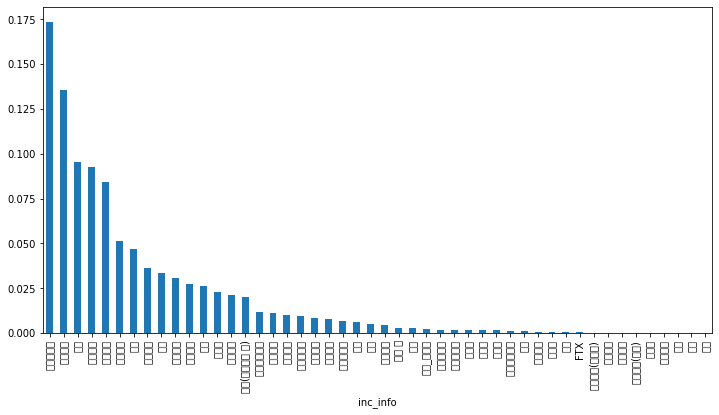

In [55]:
import matplotlib.pyplot as plt
a = call_songpa_18[call_songpa_18.report_sx == '남성'].value_counts('inc_info')
b = a/sum(a.values)

plt.figure(figsize=(12,6))
b.plot(kind='bar')

In [56]:
q1.to_csv('C:/hnooee/pythonwork/finalproject/112신고 Q1.csv',encoding='UTF-8')
q2.to_csv('C:/hnooee/pythonwork/finalproject/112신고 Q2.csv',encoding='UTF-8')
q3.to_csv('C:/hnooee/pythonwork/finalproject/112신고 Q3.csv',encoding='UTF-8')
q4.to_csv('C:/hnooee/pythonwork/finalproject/112신고 Q4.csv',encoding='UTF-8')
q5.to_csv('C:/hnooee/pythonwork/finalproject/112신고 Q5.csv',encoding='UTF-8')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/hnooee/pythonwork/finalproject/112신고 Q1.csv'